# Analisis exploratorio de los Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

Después de aplicar oversampling, es fundamental verificar que las distribuciones de las variables se mantengan consistentes con los datos originales. Dado que los datos sintéticos fueron generados para balancear el dataset, aumentando principalmente las filas con target = 1 (clientes satisfechos), es esperable observar un aumento en los valores relacionados a una mejor experiencia de servicio. Por ejemplo, variables como overall y ground_service podrían mostrar resultados más positivos en comparación con los datos originales, reflejando este incremento en la proporción de clientes satisfechos.

El análisis comparativo de las distribuciones nos permitirá evaluar si los datos sintéticos mantienen patrones realistas y si no introducen sesgos significativos que puedan afectar el rendimiento y la interpretabilidad del modelo

In [2]:
df_old = pd.read_csv('/content/airline_reviews_clean.csv')
df_old.shape

(12150, 34)

In [3]:
df_balanced= pd.read_csv('/content/balanced_airline_reviews.csv')
df_balanced.shape

(17150, 34)

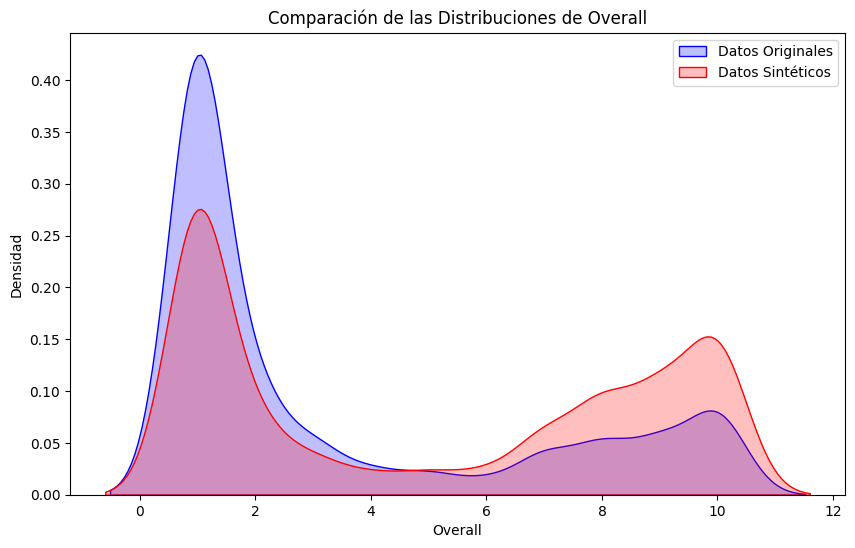

In [4]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_old['overall'], label='Datos Originales', color='blue', fill=True)
sns.kdeplot(df_balanced['overall'], label='Datos Sintéticos', color='red', fill=True)
plt.title('Comparación de las Distribuciones de Overall')
plt.xlabel('Overall')
plt.ylabel('Densidad')
plt.legend()
plt.show()

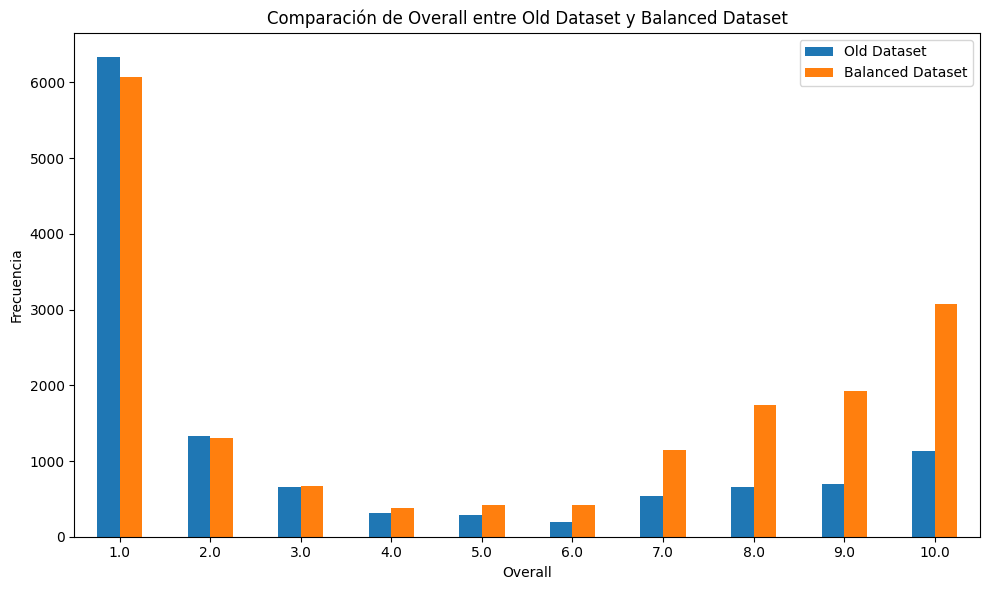

In [5]:
# Calcular los conteos de cada categoría en ambos DataFrames
old_counts = df_old["overall"].value_counts()
balanced_counts = df_balanced["overall"].value_counts()

# Crear un DataFrame combinado para facilitar el gráfico
comparison_df = pd.DataFrame({
    "Old Dataset": old_counts,
    "Balanced Dataset": balanced_counts
}).fillna(0)

# Crear gráfico de barras lado a lado
comparison_df.plot(kind="bar", figsize=(10, 6))
plt.title("Comparación de Overall entre Old Dataset y Balanced Dataset")
plt.xlabel("Overall")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilos de gráficos
sns.set(style='whitegrid', palette='muted')

## Target: recommended


In [7]:
df_balanced['recommended'].value_counts()

recommended
0    8575
1    8575
Name: count, dtype: int64

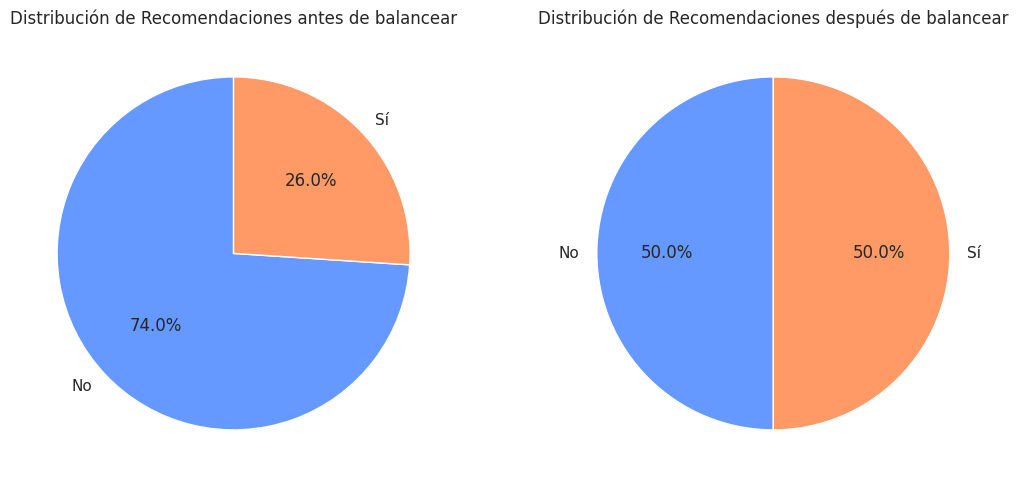

In [ ]:
plt.figure(figsize=(11, 5))

# Mapeo de los valores 0 y 1 a "No" y "Sí"
labels = {0: 'No', 1: 'Sí'}

# Distribución original de recomendaciones
plt.subplot(1, 2, 1)
df_old['recommended'].map(labels).value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#6699FF', '#FF9966'])
plt.title('Distribución de Recomendaciones antes de balancear')
plt.ylabel('')

# Distribución después de balancear
plt.subplot(1, 2, 2)
df_balanced['recommended'].map(labels).value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#6699FF', '#FF9966'])
plt.title('Distribución de Recomendaciones después de balancear')
plt.ylabel('')

plt.tight_layout()
plt.show()

Se observa que las clases están ahora equilibradas, con un 50% de reseñas no recomendando el servicio (`0`) y un 50% de reseñas recomendándolo (`1`). Este balance es necesario para evitar sesgos en el modelo y mejorar su capacidad de generalización, ya que el dataset original estaba desbalanceado y tenía una mayoría de ejemplos con `target = 0`.

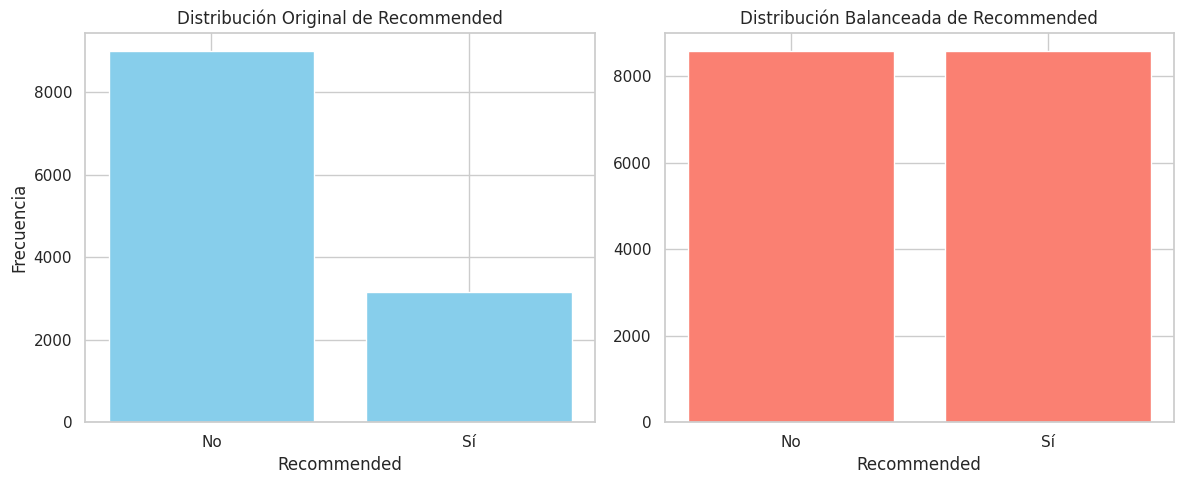

In [ ]:
import matplotlib.pyplot as plt

# Dataset original
original_target_counts = df_old['recommended'].value_counts()

# Dataset balanceado
balanced_target_counts = df_balanced['recommended'].value_counts()

# Etiquetas para el eje x
labels = ['No', 'Sí']

# Gráfica
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico para el dataset original
ax[0].bar(labels, original_target_counts.values, color='skyblue')
ax[0].set_title('Distribución Original de Recommended')
ax[0].set_xlabel('Recommended')
ax[0].set_ylabel('Frecuencia')

# Gráfico para el dataset balanceado
ax[1].bar(labels, balanced_target_counts.values, color='salmon')
ax[1].set_title('Distribución Balanceada de Recommended')
ax[1].set_xlabel('Recommended')

# Ajustar el espacio entre gráficos
plt.tight_layout()
plt.show()


El dataset original mostraba un claro desbalance hacia reseñas negativas (`0`). Tras aplicar oversampling, logramos un balance adecuado entre reseñas positivas y negativas, lo que permitirá al modelo aprender de ambas clases por igual y mejorar su capacidad predictiva.

In [ ]:
original_stats = df_old.describe().round(2)
balanced_stats = df_balanced.describe().round(2)

In [ ]:
from IPython.display import display

print("Estadísticas del Dataset Original:\n")
display(original_stats)
print("-----------------------------------")

print("\nEstadísticas del Dataset Balanceado:\n")
display(balanced_stats)

Estadísticas del Dataset Original:



overall  review_dayofweek  review_month  review_year  \
count  12150.00          12150.00      12150.00     12150.00   
mean       3.41              2.77          6.46      2016.54   
std        3.31              2.02          3.38         1.71   
min        1.00              0.00          1.00      2011.00   
25%        1.00              1.00          4.00      2015.00   
50%        1.00              3.00          6.00      2017.00   
75%        6.00              4.00          9.00      2018.00   
max       10.00              6.00         12.00      2019.00   

       flight_dayofweek  flight_month  flight_year  days_since_flight  \
count          12150.00      12150.00     12150.00           12150.00   
mean               2.87          6.51      2016.53               6.00   
std                2.02          3.37         1.72              57.93   
min                0.00          1.00      2011.00            -355.00   
25%                1.00          4.00      2015.00               7.00   
50%                3.00          6.00      2017.00               7.00   
75%                5.00          9.00      2018.00               7.00   
max                6.00         12.00      2019.00             407.00   

       seat_comfort  cabin_service  food_service  food_bev  ground_service  \
count      12150.00       12150.00      12150.00  12150.00        12150.00   
mean           2.28           2.32          0.75      1.64            2.00   
std            1.38           1.58          0.43      1.54            1.44   
min            1.00           1.00          0.00      0.00            1.00   
25%            1.00           1.00          1.00      1.00            1.00   
50%            2.00           1.00          1.00      1.00            1.00   
75%            3.00           4.00          1.00      3.00            3.00   
max            5.00           5.00          1.00      5.00            5.00   

       value_for_money  recommended  route_distance  route_time_minutes  
count         12150.00     12150.00        12150.00            12150.00  
mean              2.16         0.26         2967.07              222.55  
std               1.53         0.44         2724.62              204.33  
min               1.00         0.00          106.00                8.00  
25%               1.00         0.00         1279.41               96.00  
50%               1.00         0.00         1991.13              149.00  
75%               3.00         1.00         3693.38              277.00  
max               5.00         1.00        18795.17             1410.00

-----------------------------------

Estadísticas del Dataset Balanceado:



overall  review_dayofweek  review_month  review_year  \
count  17150.00          17150.00      17150.00     17150.00   
mean       5.06              3.00          6.48      2016.22   
std        3.74              2.01          3.39         1.66   
min        1.00              0.00          1.00      2011.00   
25%        1.00              1.00          4.00      2015.00   
50%        5.00              3.00          7.00      2016.00   
75%        9.00              5.00          9.00      2018.00   
max       10.00              6.00         12.00      2018.00   

       flight_dayofweek  flight_month  flight_year  days_since_flight  \
count          17150.00      17124.00     17124.00           17150.00   
mean               2.86          6.50      2016.21               7.97   
std                2.00          3.39         1.66               2.05   
min                0.00          1.00      2011.00               0.00   
25%                1.00          4.00      2015.00               6.00   
50%                3.00          7.00      2016.00               8.00   
75%                5.00          9.00      2018.00              10.00   
max                6.00         12.00      2018.00              11.00   

       seat_comfort  cabin_service  food_service  food_bev  ground_service  \
count      17150.00       17150.00      17150.00  17150.00        17150.00   
mean           2.81           2.97          0.78      2.13            2.55   
std            1.49           1.71          0.41      1.75            1.63   
min            1.00           1.00          0.00      0.00            1.00   
25%            1.00           1.00          1.00      1.00            1.00   
50%            3.00           3.00          1.00      2.00            2.00   
75%            4.00           5.00          1.00      4.00            4.00   
max            5.00           5.00          1.00      5.00            5.00   

       value_for_money  recommended  route_distance  route_time_minutes  
count         17150.00      17150.0        17150.00            17150.00  
mean              2.89          0.5         3134.29              235.10  
std               1.70          0.5         2877.12              215.77  
min               1.00          0.0          106.00                8.00  
25%               1.00          0.0         1291.47               97.00  
50%               3.00          0.5         2086.02              156.00  
75%               5.00          1.0         3892.73              292.00  
max               5.00          1.0        18795.17             1410.00

Mejora en el Puntaje General (overall):

- En el dataset original, la media de overall es de 3.41, mientras que en el dataset balanceado sube a 4.98.
- Esto es consistente con el proceso de oversampling, ya que se aumentó la proporción de datos con reseñas positivas (recommended = 1).


Cambios en la Calidad del Servicio (seat_comfort, cabin_service, ground_service:

- Los puntajes medios de seat_comfort, cabin_service y ground_service aumentaron en el dataset balanceado:
  - seat_comfort: de 2.28 a 2.79
  - cabin_service: de 2.32 a 2.93
  - ground_service: de 2.00 a 2.52

- Estos aumentos reflejan el mayor número de reseñas positivas en los datos sintéticos, lo que era esperado.

Distribución del Target (recommended):
- En el dataset original, el valor medio de recommended es 0.26, mientras que en el dataset balanceado es 0.49.
- Esto indica que el dataset ahora tiene una proporción casi igual de ejemplos recomendando (1) y no recomendando (0), confirmando el balance logrado con el oversampling.

Impacto en las Variables de Distancia (route_distance, route_time_minutes):
- La media de route_distance y route_time_minutes aumentó ligeramente en el dataset balanceado:
  - route_distance: de 2966.60 a 3126.72
  - route_time_minutes: de 222.51 a 234.53

- Esto podría sugerir que los datos sintéticos incluyen más ejemplos de vuelos largos, posiblemente asociados con reseñas más positivas.

Cambio en days_since_flight:
- La media de days_since_flight subió de 6.00 a 7.97, lo que podría reflejar un sesgo en los datos sintéticos hacia reseñas de vuelos más recientes.


Conclusión

Los datos sintéticos ayudaron a balancear el dataset, lo que mejoró las métricas de servicio y aumentó el puntaje general (overall). Esto es coherente con la expectativa de oversampling, donde se buscaba aumentar las filas con reseñas positivas. Sin embargo, es importante tener en cuenta estos cambios para evitar sesgos en el modelo y asegurar una correcta interpretación de los resultados.

## variables numericas

In [ ]:
df_balanced.select_dtypes(include=np.number).columns

Index(['overall', 'review_dayofweek', 'review_month', 'review_year',
       'flight_dayofweek', 'flight_month', 'flight_year', 'days_since_flight',
       'seat_comfort', 'cabin_service', 'food_service', 'food_bev',
       'ground_service', 'value_for_money', 'recommended', 'route_distance',
       'route_time_minutes'],
      dtype='object')

### Variable "overall"

In [ ]:
df_balanced['overall'].value_counts()

overall
1.0     6076
10.0    3076
9.0     1925
8.0     1735
2.0     1305
7.0     1149
3.0      670
5.0      422
6.0      413
4.0      379
Name: count, dtype: int64

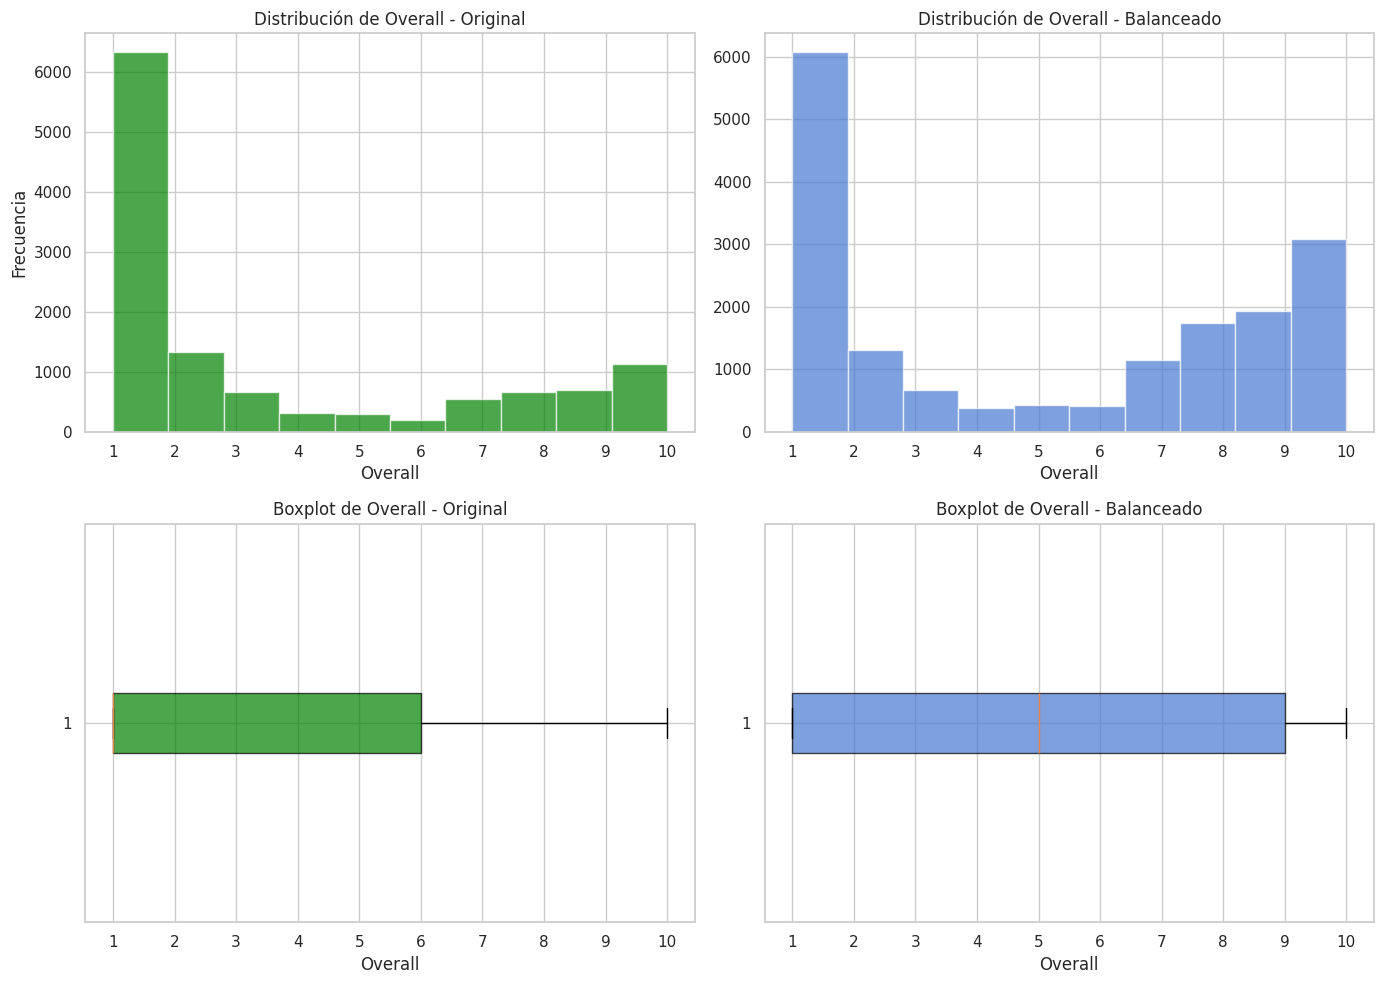

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Histograma para el dataset original
ax[0, 0].hist(df_old['overall'].dropna(), bins=10, color='green', alpha=0.7, range=(1, 10))
ax[0, 0].set_title('Distribución de Overall - Original')
ax[0, 0].set_xlabel('Overall')
ax[0, 0].set_ylabel('Frecuencia')
ax[0, 0].set_xticks(range(1, 11))

# Histograma para el dataset balanceado
ax[0, 1].hist(df_balanced['overall'].dropna(), bins=10, alpha=0.7, range=(1, 10))
ax[0, 1].set_title('Distribución de Overall - Balanceado')
ax[0, 1].set_xlabel('Overall')
ax[0, 1].set_xticks(range(1, 11))

# Boxplot para el dataset original
ax[1, 0].boxplot(df_old['overall'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='green', alpha=0.7))
ax[1, 0].set_title('Boxplot de Overall - Original')
ax[1, 0].set_xlabel('Overall')
ax[1, 0].set_xticks(range(1, 11))

# Boxplot para el dataset balanceado
ax[1, 1].boxplot(df_balanced['overall'].dropna(), vert=False, patch_artist=True, boxprops=dict(alpha=0.7))
ax[1, 1].set_title('Boxplot de Overall - Balanceado')
ax[1, 1].set_xlabel('Overall')
ax[1, 1].set_xticks(range(1, 11))

plt.tight_layout()
plt.show()

Como se puede observar en los gráficos, al crear datos sintéticos para los valores con recommended = 1, se incrementaron lógicamente los valores más altos de overall. Sin embargo, a pesar de este aumento, se mantiene el orden de frecuencia en los valores de overall.

Por ejemplo, overall = 6 tiene más valores que overall = 5, overall = 7 tiene más que overall = 8, y overall = 9 tiene más que overall = 10. Además, el valor que más se repite en ambos conjuntos de datos sigue siendo overall = 1. Esto indica que, aunque el balanceo ha incrementado la frecuencia de los valores altos, se ha conservado la estructura original de la distribución de overall.

Es importante notar que, con el balanceo, la mediana de overall ha cambiado. En el dataset original, la mediana estaba en el valor 1, mientras que en el dataset balanceado la mediana se desplazó hacia valores más altos, lo que refleja el incremento en las puntuaciones positivas.

### Variables "review_dayofweek"  y "flight_dayofweek"

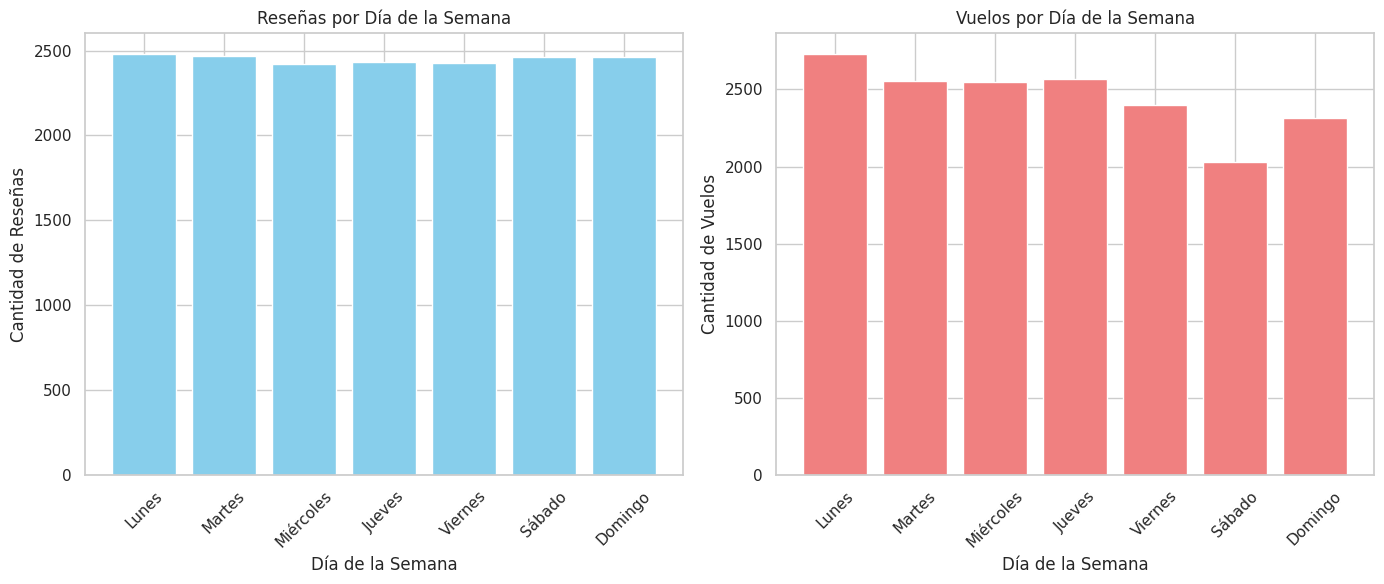

In [ ]:
import matplotlib.pyplot as plt

# Definir los nombres de los días de la semana
days_of_week_renamed = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]

# Contar las reseñas por día de la semana y ordenar
review_day_counts = df_balanced['review_dayofweek'].value_counts().sort_index()
flight_day_counts = df_balanced['flight_dayofweek'].value_counts().sort_index()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Gráfico 1: Reseñas por día de la semana
axes[0].bar(review_day_counts.index, review_day_counts, color='skyblue')
axes[0].set_title("Reseñas por Día de la Semana")
axes[0].set_xlabel("Día de la Semana")
axes[0].set_ylabel("Cantidad de Reseñas")
axes[0].set_xticks(review_day_counts.index)
axes[0].set_xticklabels(days_of_week_renamed, rotation=45)

# Gráfico 2: Vuelos por día de la semana
axes[1].bar(flight_day_counts.index, flight_day_counts, color='lightcoral')
axes[1].set_title("Vuelos por Día de la Semana")
axes[1].set_xlabel("Día de la Semana")
axes[1].set_ylabel("Cantidad de Vuelos")
axes[1].set_xticks(flight_day_counts.index)
axes[1].set_xticklabels(days_of_week_renamed, rotation=45)

# Ajustar el diseño para evitar superposición
plt.tight_layout()
plt.show()


### Variables "review_month" y "flight_month"

In [ ]:
df_balanced["review_month"].value_counts()

review_month
8     1687
6     1598
7     1549
3     1482
1     1476
10    1423
12    1407
5     1401
4     1393
9     1289
11    1233
2     1212
Name: count, dtype: int64

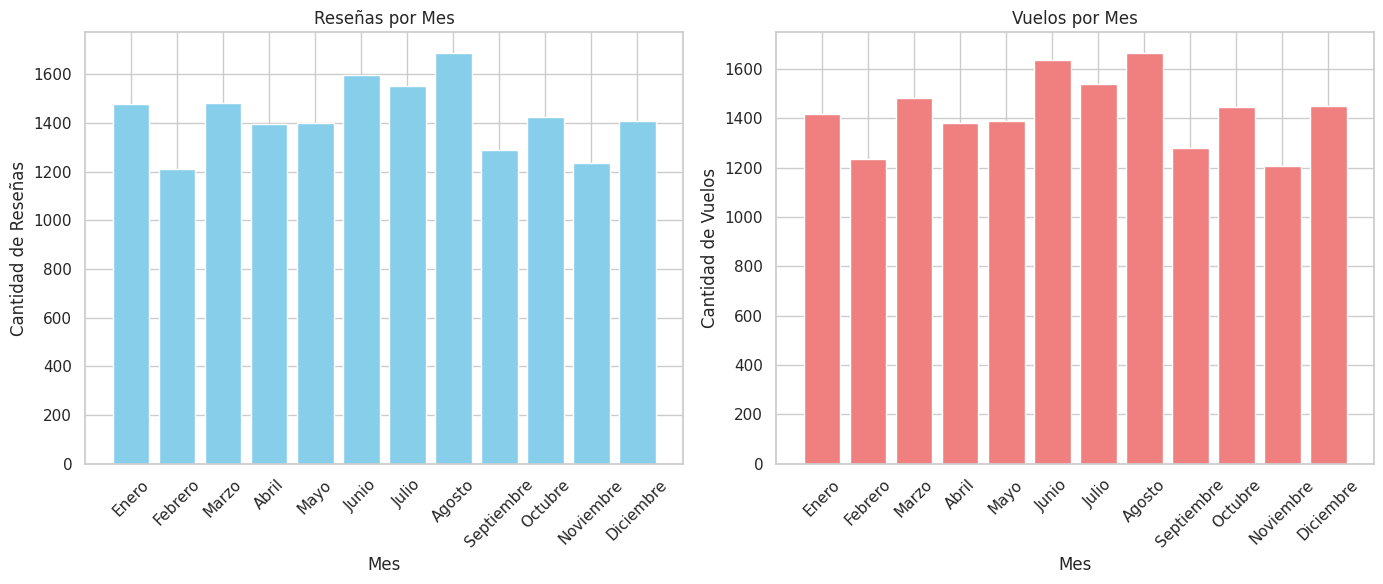

In [ ]:
# Definir los nombres de los meses
months_renamed = [
    "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
    "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"
]

# Contar las reseñas y vuelos por mes y ordenar
review_month_counts = df_balanced['review_month'].value_counts().sort_index()
flight_month_counts = df_balanced['flight_month'].value_counts().sort_index()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Gráfico 1: Reseñas por mes
axes[0].bar(review_month_counts.index, review_month_counts, color='skyblue')
axes[0].set_title("Reseñas por Mes")
axes[0].set_xlabel("Mes")
axes[0].set_ylabel("Cantidad de Reseñas")
axes[0].set_xticks(review_month_counts.index)
axes[0].set_xticklabels(months_renamed, rotation=45)

# Gráfico 2: Vuelos por mes
axes[1].bar(flight_month_counts.index, flight_month_counts, color='lightcoral')
axes[1].set_title("Vuelos por Mes")
axes[1].set_xlabel("Mes")
axes[1].set_ylabel("Cantidad de Vuelos")
axes[1].set_xticks(flight_month_counts.index)
axes[1].set_xticklabels(months_renamed, rotation=45)

# Ajustar el diseño para evitar superposición
plt.tight_layout()
plt.show()

### Variables "review_year" y "flight_year"

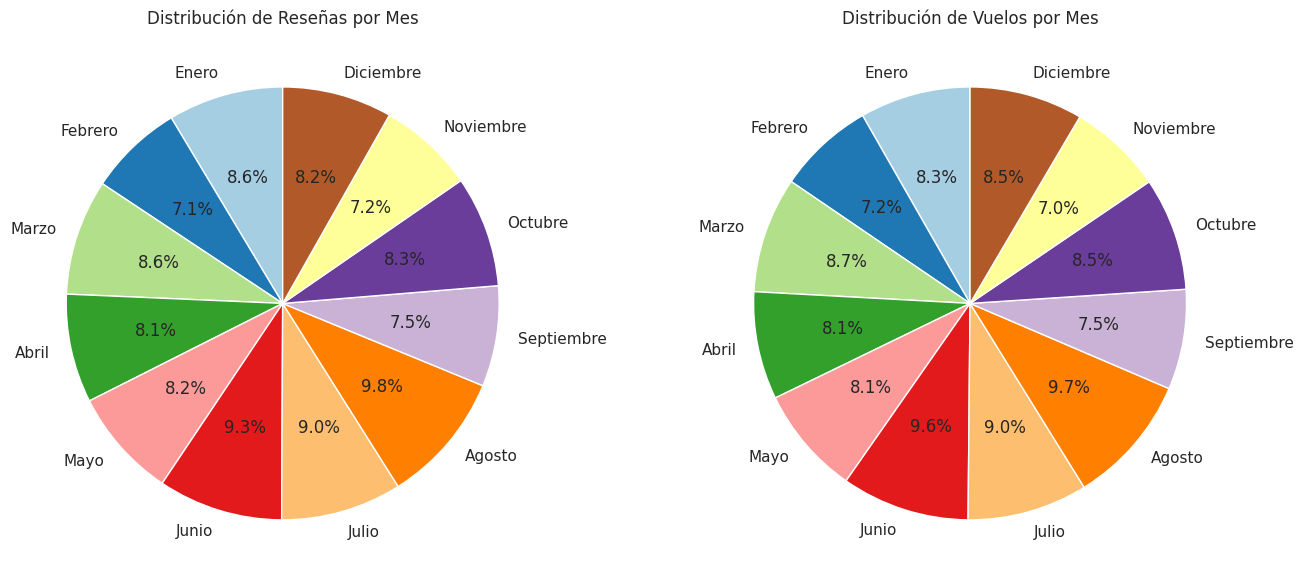

In [ ]:
# Asegurarse de que los índices son enteros
flight_month_counts.index = flight_month_counts.index.astype(int)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Gráfico 1: Reseñas por mes
axes[0].pie(
    review_month_counts,
    labels=[months_renamed[int(i) - 1] for i in review_month_counts.index],
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)
axes[0].set_title("Distribución de Reseñas por Mes")

# Gráfico 2: Vuelos por mes
axes[1].pie(
    flight_month_counts,
    labels=[months_renamed[int(i) - 1] for i in flight_month_counts.index],
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)
axes[1].set_title("Distribución de Vuelos por Mes")

# Ajustar el diseño
plt.tight_layout()
plt.show()



In [ ]:
df_balanced['review_year'].value_counts()

review_year
2018    5689
2015    2995
2016    2767
2017    2715
2014    2026
2013     597
2012     322
2011      39
Name: count, dtype: int64

In [ ]:
df_balanced['flight_year'].value_counts()

flight_year
2018.0    5647
2015.0    3022
2016.0    2739
2017.0    2720
2014.0    2014
2013.0     618
2012.0     324
2011.0      40
Name: count, dtype: int64

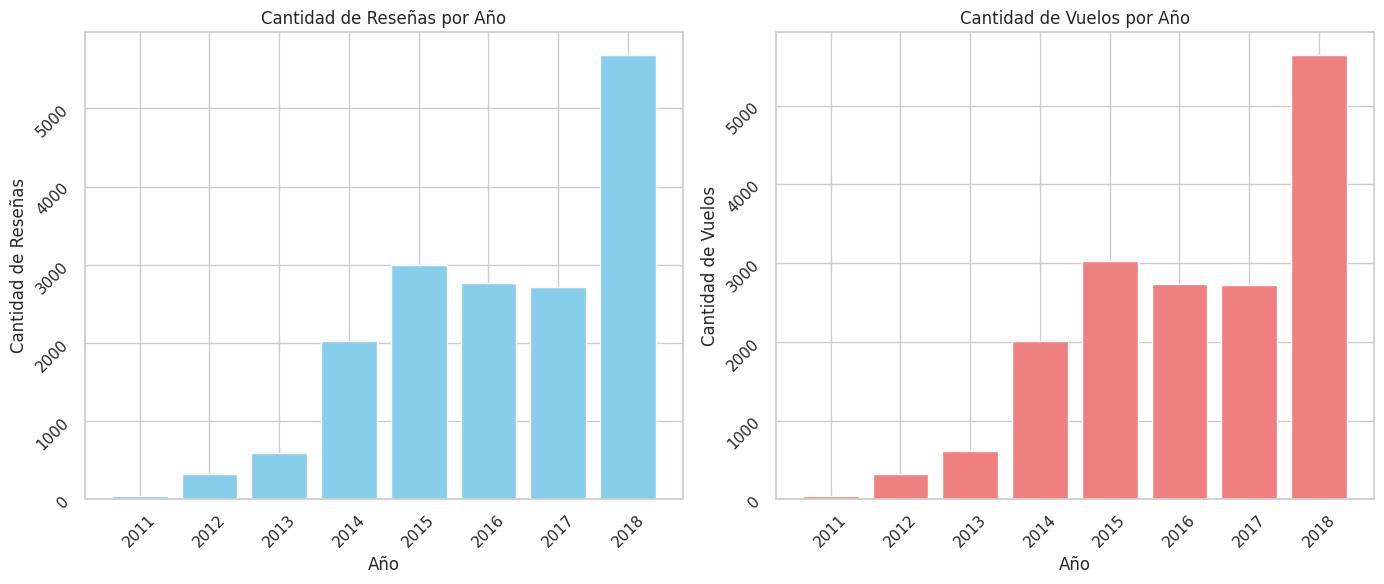

In [ ]:
import matplotlib.pyplot as plt

# Contar la cantidad de reseñas por año en el dataset df_balanced
review_year_counts = df_balanced['review_year'].value_counts().sort_index()
flight_year_counts = df_balanced['flight_year'].value_counts().sort_index()

# Crear los subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Gráfico 1: Cantidad de Reseñas por Año
axes[0].bar(review_year_counts.index, review_year_counts.values, color='skyblue')
axes[0].set_title("Cantidad de Reseñas por Año")
axes[0].set_xlabel("Año")
axes[0].set_ylabel("Cantidad de Reseñas")
axes[0].set_xticks(review_year_counts.index)
axes[0].tick_params(rotation=45)

# Gráfico 2: Cantidad de Vuelos por Año
axes[1].bar(flight_year_counts.index, flight_year_counts.values, color='lightcoral')
axes[1].set_title("Cantidad de Vuelos por Año")
axes[1].set_xlabel("Año")
axes[1].set_ylabel("Cantidad de Vuelos")
axes[1].set_xticks(flight_year_counts.index)
axes[1].tick_params(rotation=45)

# Ajustar el diseño para evitar superposición
plt.tight_layout()
plt.show()


### days_since_flight

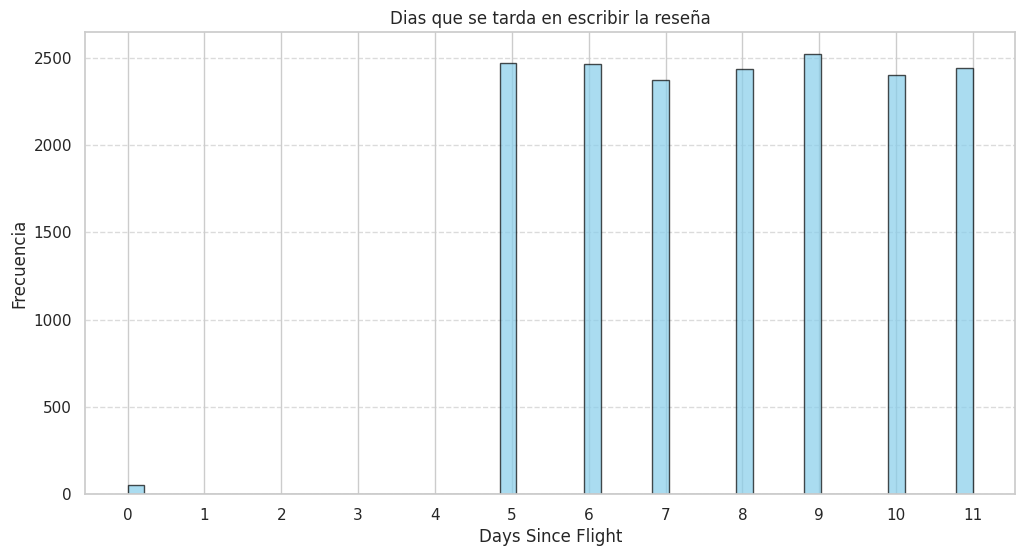

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(df_balanced['days_since_flight'].dropna(), bins=50, edgecolor='black', color='skyblue', alpha=0.7)
plt.title('Dias que se tarda en escribir la reseña')
plt.xlabel('Days Since Flight')
plt.ylabel('Frecuencia')
plt.xticks(range(0, int(df_balanced['days_since_flight'].max()) + 1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

In [ ]:
df_balanced['days_since_flight'].max()

11

In [ ]:
df_balanced['days_since_flight'].min()

0

Cantidad de outliers: 0
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: days_since_flight, dtype: float64


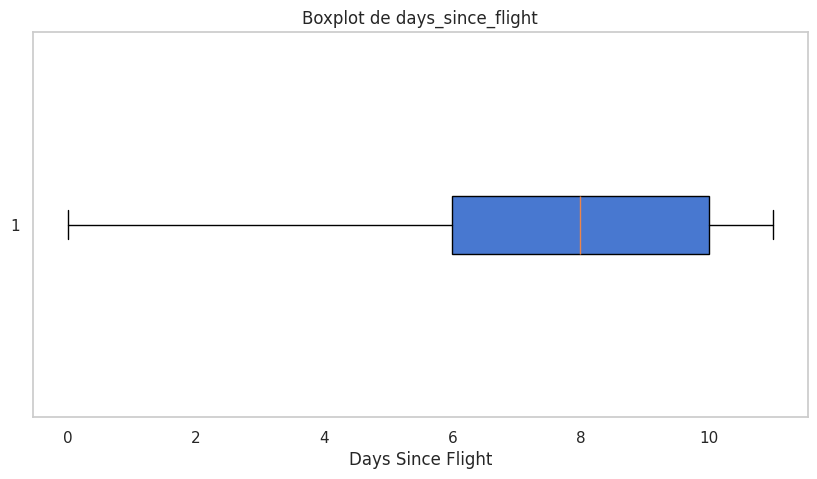

In [ ]:
import matplotlib.pyplot as plt

# Calcular el rango intercuartílico (IQR)
Q1 = df_balanced['days_since_flight'].quantile(0.25)
Q3 = df_balanced['days_since_flight'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = df_balanced[(df_balanced['days_since_flight'] < lower_bound) | (df_balanced['days_since_flight'] > upper_bound)]
print(f"Cantidad de outliers: {len(outliers)}")
print(outliers['days_since_flight'].describe())

# Visualización con boxplot
plt.figure(figsize=(10, 5))
plt.boxplot(df_balanced['days_since_flight'].dropna(), vert=False, patch_artist=True)
plt.title('Boxplot de days_since_flight')
plt.xlabel('Days Since Flight')
plt.grid()
plt.show()

### Variable "seat_comfort"




In [ ]:
df_balanced['seat_comfort'].value_counts()

seat_comfort
1.0    5205
4.0    3664
3.0    2960
5.0    2945
2.0    2376
Name: count, dtype: int64

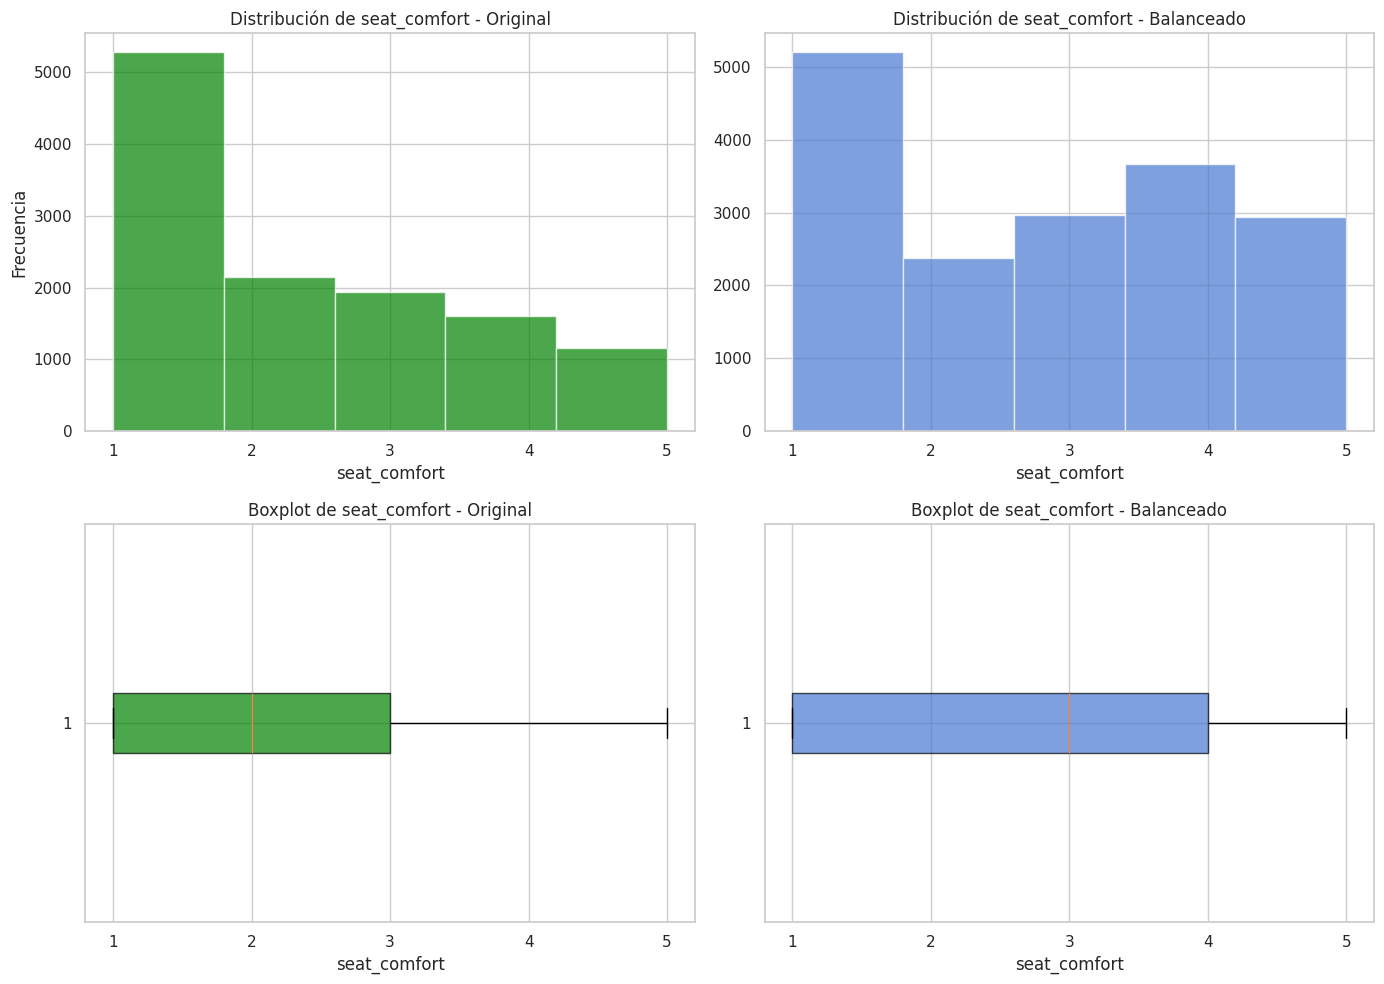

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Histograma para el dataset original
ax[0, 0].hist(df_old['seat_comfort'].dropna(), bins=5, color='green', alpha=0.7, range=(1, 5))
ax[0, 0].set_title('Distribución de seat_comfort - Original')
ax[0, 0].set_xlabel('seat_comfort')
ax[0, 0].set_ylabel('Frecuencia')
ax[0, 0].set_xticks(range(1, 6))

# Histograma para el dataset balanceado
ax[0, 1].hist(df_balanced['seat_comfort'].dropna(), bins=5, alpha=0.7, range=(1, 5))
ax[0, 1].set_title('Distribución de seat_comfort - Balanceado')
ax[0, 1].set_xlabel('seat_comfort')
ax[0, 1].set_xticks(range(1, 6))

# Boxplot para el dataset original
ax[1, 0].boxplot(df_old['seat_comfort'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='green', alpha=0.7))
ax[1, 0].set_title('Boxplot de seat_comfort - Original')
ax[1, 0].set_xlabel('seat_comfort')
ax[1, 0].set_xticks(range(1, 6))

# Boxplot para el dataset balanceado
ax[1, 1].boxplot(df_balanced['seat_comfort'].dropna(), vert=False, patch_artist=True, boxprops=dict(alpha=0.7))
ax[1, 1].set_title('Boxplot de seat_comfort - Balanceado')
ax[1, 1].set_xlabel('seat_comfort')
ax[1, 1].set_xticks(range(1, 6))

plt.tight_layout()
plt.show()

La distribución de la variable seat_comfort muestra que en ambos conjuntos de datos, el valor más frecuente es 1, indicando una tendencia hacia baja satisfacción en la comodidad de los asientos. A pesar de esto, el dataset balanceado presenta una variación en las frecuencias de los valores más altos (4 y 5), reflejando un aumento en las evaluaciones positivas, que es coherente con el enfoque de balanceo hacia recomendaciones positivas (recommended = 1).

En cuanto a los boxplots, el original muestra una mediana en el valor más bajo, subrayando la percepción general de incomodidad. Contrariamente, en el dataset balanceado, la mediana se ubica en 3, y se observa una mayor dispersión hacia valores más altos, evidenciando un cambio hacia opiniones más favorables sobre la comodidad, influenciado por la inclusión de datos sintéticos que mejoran las evaluaciones de seat_comfort. Esto sugiere que el proceso de balanceo y la generación de datos sintéticos han modificado efectivamente la percepción de comodidad de los asientos en las reseñas, alineándolas más con experiencias positivas.

### cabin_service

In [ ]:
df_balanced['cabin_service'].value_counts()

cabin_service
1.0    6359
5.0    5276
4.0    2738
3.0    1617
2.0    1160
Name: count, dtype: int64

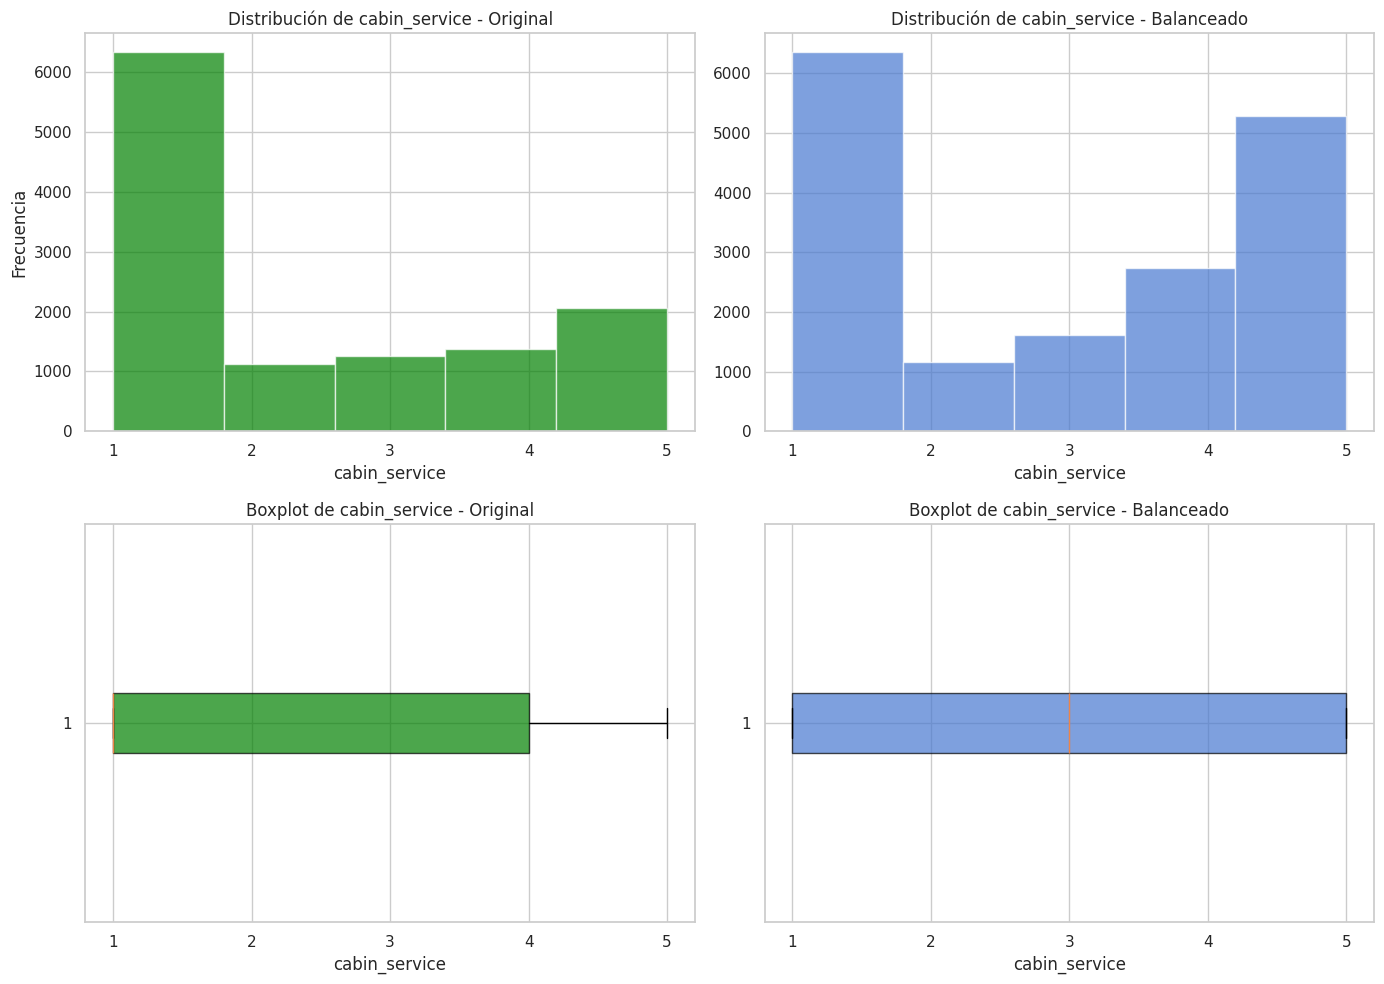

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Histograma para el dataset original
ax[0, 0].hist(df_old['cabin_service'].dropna(), bins=5, color='green', alpha=0.7, range=(1, 5))
ax[0, 0].set_title('Distribución de cabin_service - Original')
ax[0, 0].set_xlabel('cabin_service')
ax[0, 0].set_ylabel('Frecuencia')
ax[0, 0].set_xticks(range(1, 6))

# Histograma para el dataset balanceado
ax[0, 1].hist(df_balanced['cabin_service'].dropna(), bins=5, alpha=0.7, range=(1, 5))
ax[0, 1].set_title('Distribución de cabin_service - Balanceado')
ax[0, 1].set_xlabel('cabin_service')
ax[0, 1].set_xticks(range(1, 6))

# Boxplot para el dataset original
ax[1, 0].boxplot(df_old['cabin_service'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='green', alpha=0.7))
ax[1, 0].set_title('Boxplot de cabin_service - Original')
ax[1, 0].set_xlabel('cabin_service')
ax[1, 0].set_xticks(range(1, 6))

# Boxplot para el dataset balanceado
ax[1, 1].boxplot(df_balanced['cabin_service'].dropna(), vert=False, patch_artist=True, boxprops=dict(alpha=0.7))
ax[1, 1].set_title('Boxplot de cabin_service - Balanceado')
ax[1, 1].set_xlabel('cabin_service')
ax[1, 1].set_xticks(range(1, 6))

plt.tight_layout()
plt.show()

Los gráficos de cabin_service muestran una predominancia de bajas calificaciones en el dataset original, con el valor 1 siendo el más común. Esto sugiere una general insatisfacción con el servicio de cabina. En el dataset balanceado, observamos un aumento en calificaciones más altas, particularmente en los valores 4 y 5, reflejando una percepción mejorada del servicio debido a la inclusión de datos sintéticos.

En términos de los boxplots, el original concentra los datos en el valor más bajo, mientras que el balanceado muestra una dispersión hacia calificaciones superiores, elevando la mediana. Esto indica un ajuste positivo en la percepción del servicio de cabina en el dataset balanceado, adecuado para el entrenamiento de modelos predictivos.

### Variable 'food_service'

In [ ]:
df_balanced['food_service'].value_counts()

food_service
1    13462
0     3688
Name: count, dtype: int64

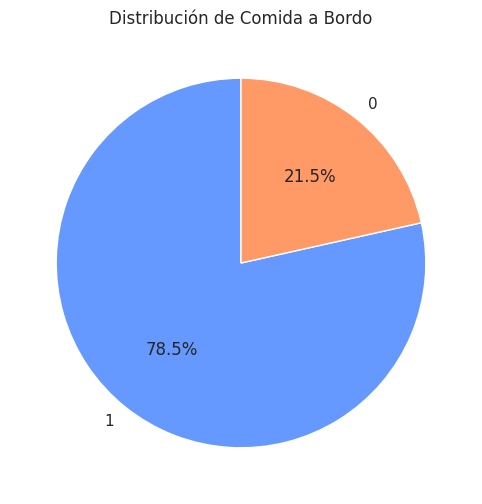

In [ ]:
plt.figure(figsize=(8, 6))

# Crear el gráfico de torta
df_balanced['food_service'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#6699FF', '#FF9966'])
plt.title('Distribución de Comida a Bordo')
plt.ylabel('')
plt.show()


In [ ]:
from IPython.display import display, HTML

# Añadir un título usando HTML para mostrarlo más destacadamente
display(HTML("<h3>Promedio de Servicio de Comida por Aerolínea</h3>"))
df_balanced.groupby('airline')['food_service'].mean().reset_index()

airline  food_service
0     Alaska Airlines      0.886308
1   American Airlines      0.866999
2     Delta Air Lines      0.920615
3   Frontier Airlines      0.495630
4     Jetblue Airways      0.902552
5  Southwest Airlines      0.798817
6     Spirit Airlines      0.510519
7     United Airlines      0.913146
8      Virgin America      0.914894

- Delta, Virgin America y United lideran en ofrecer comida a bordo, con más del 90% de sus vuelos con este servicio. Esto refuerza su posición como aerolíneas de servicio completo, buscando diferenciarse en experiencia al cliente.

- Frontier y Spirit muestran un claro enfoque low-cost, con servicio de comida en solo la mitad de sus vuelos. Esto indica que sacrifican amenities a cambio de precios más bajos.

- Posicionamiento mixto: Alaska, American y Southwest ofrecen comida en alrededor del 80-87% de sus vuelos, balanceando costos y servicio para capturar tanto el mercado de bajo costo como el tradicional.


### 'food_bev'

Los valores del puntaje varian entre 1 - 5

Los valores "0" significan que en ese vuelo no hubo servicio.

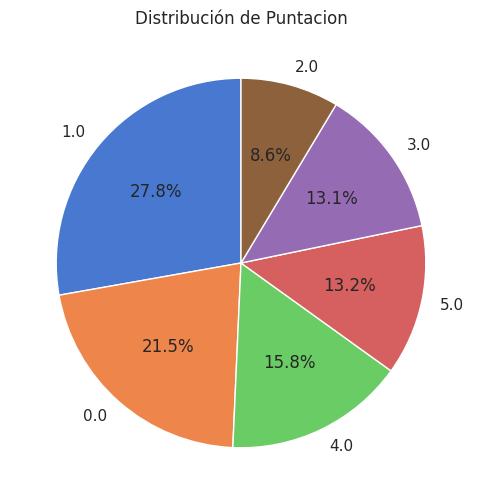

In [ ]:
plt.figure(figsize=(8, 6))
df_balanced['food_bev'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Puntacion')
plt.ylabel('')
plt.show()

In [ ]:
df_balanced['food_bev'].value_counts()

food_bev
1.0    4766
0.0    3688
4.0    2707
5.0    2258
3.0    2255
2.0    1476
Name: count, dtype: int64

Se va a calcular el promedio de puntaje de la comida abaordo. es por ello que silftrara por los registros que contengan servicio abordo (food_service = 1)

In [ ]:
df_with_food_service = df_balanced[df_balanced['food_service'] == 1]

food_bev_by_airline_filtered = df_with_food_service.groupby('airline')['food_bev'].mean().reset_index()

In [ ]:
print("Media del Puntaje de Comida a Bordo por Aerolínea \n(Solo para vuelos con servicio de comida)\n")
food_bev_by_airline_filtered.round(3)

Media del Puntaje de Comida a Bordo por Aerolínea 
(Solo para vuelos con servicio de comida)



airline  food_bev
0     Alaska Airlines     3.386
1   American Airlines     2.414
2     Delta Air Lines     3.283
3   Frontier Airlines     1.887
4     Jetblue Airways     3.545
5  Southwest Airlines     3.512
6     Spirit Airlines     1.883
7     United Airlines     2.515
8      Virgin America     3.669

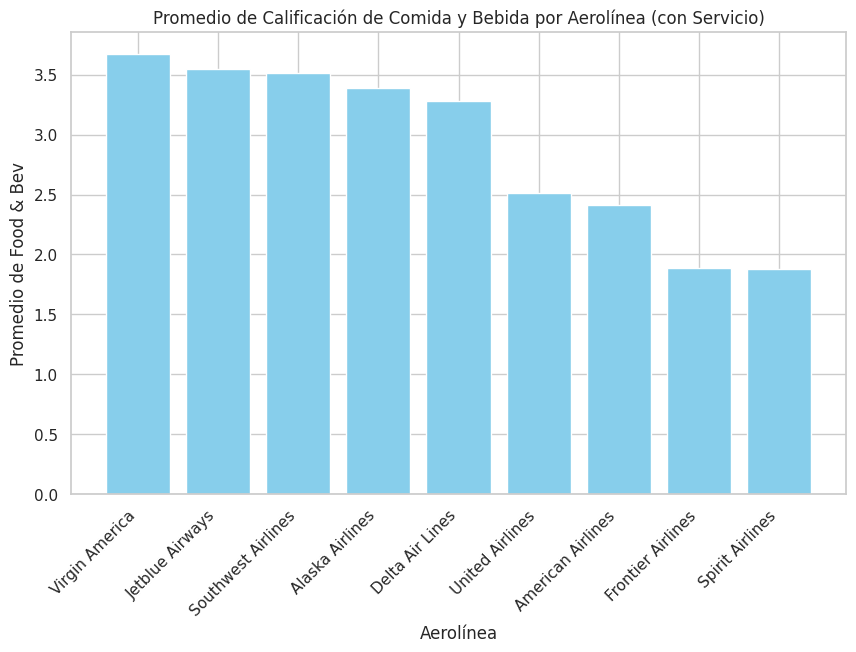

In [ ]:
# Ordenar las aerolíneas por promedio de food_bev para una presentación más clara
food_bev_by_airline_filtered = food_bev_by_airline_filtered.sort_values(by='food_bev', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(food_bev_by_airline_filtered['airline'], food_bev_by_airline_filtered['food_bev'], color='skyblue')
plt.xlabel('Aerolínea')
plt.ylabel('Promedio de Food & Bev')
plt.title('Promedio de Calificación de Comida y Bebida por Aerolínea (con Servicio)')
plt.xticks(rotation=45, ha='right')
plt.show()

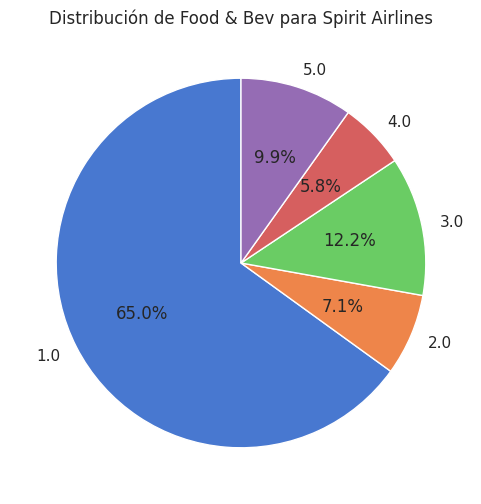

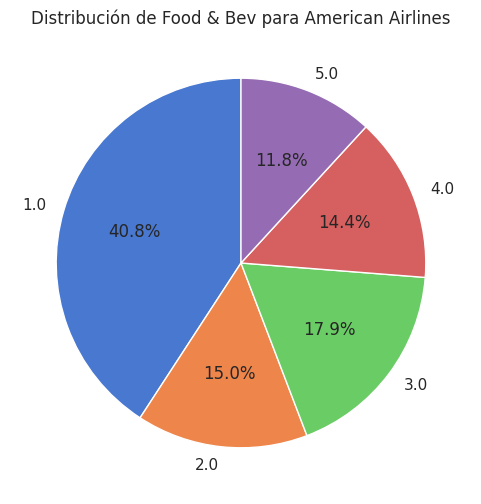

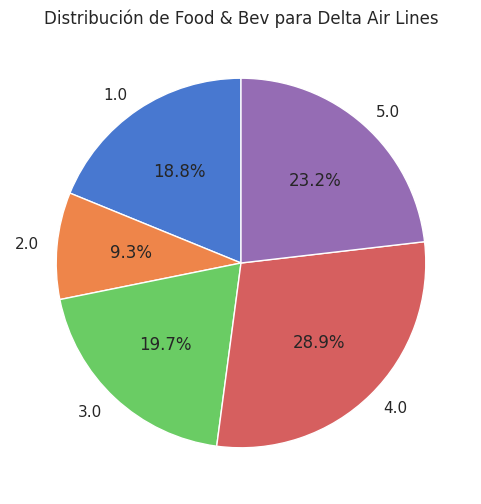

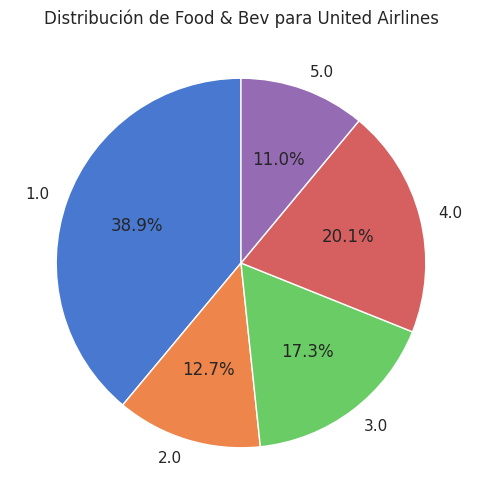

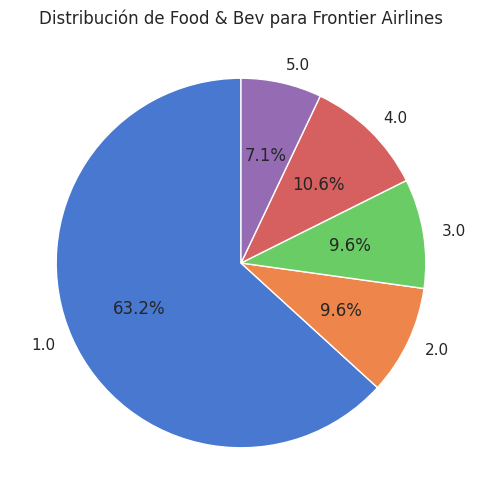

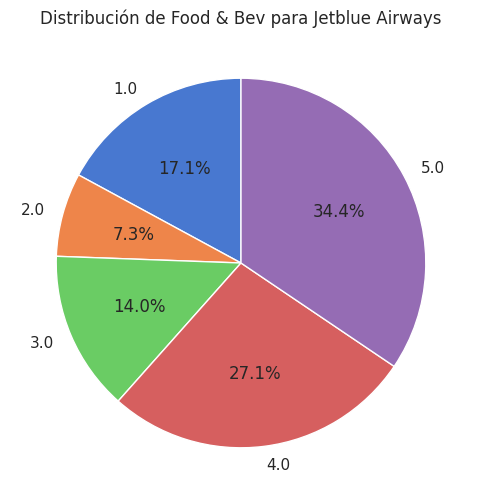

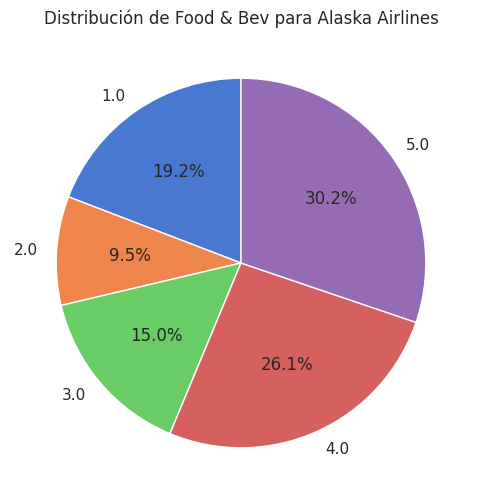

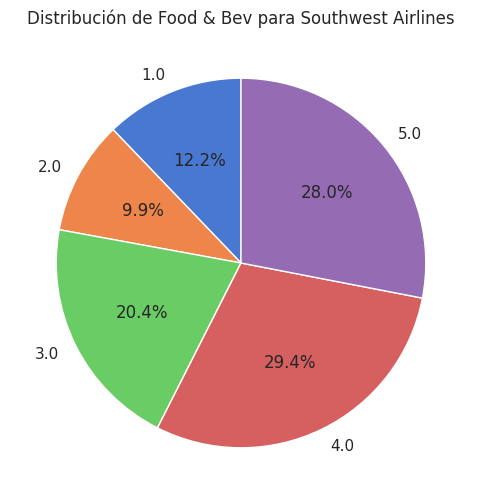

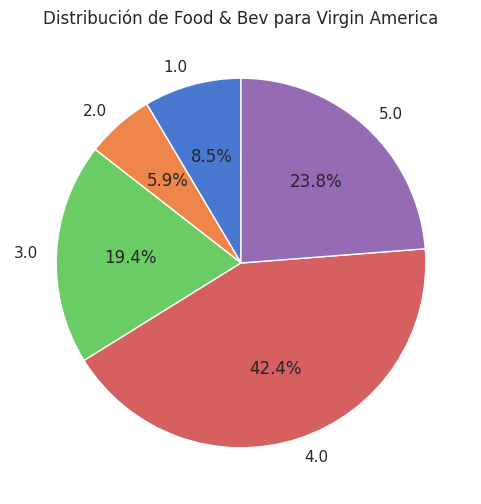

In [ ]:
df_with_food_service = df_balanced[df_balanced['food_service'] == 1]

# Obtener la lista de aerolíneas únicas
airlines = df_with_food_service['airline'].unique()

# Crear un gráfico de torta por cada aerolínea
for airline in airlines:
    # Filtrar el DataFrame para la aerolínea actual
    airline_data = df_with_food_service[df_with_food_service['airline'] == airline]

    # Contar las calificaciones de `food_bev`
    food_bev_counts = airline_data['food_bev'].value_counts().sort_index()

    # Crear el gráfico de torta
    plt.figure(figsize=(6, 6))
    plt.pie(food_bev_counts, labels=food_bev_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribución de Food & Bev para {airline}')
    plt.show()



### ground_service

In [ ]:
df_balanced['ground_service'].value_counts()

ground_service
1.0    7700
5.0    3504
4.0    2446
2.0    1759
3.0    1741
Name: count, dtype: int64

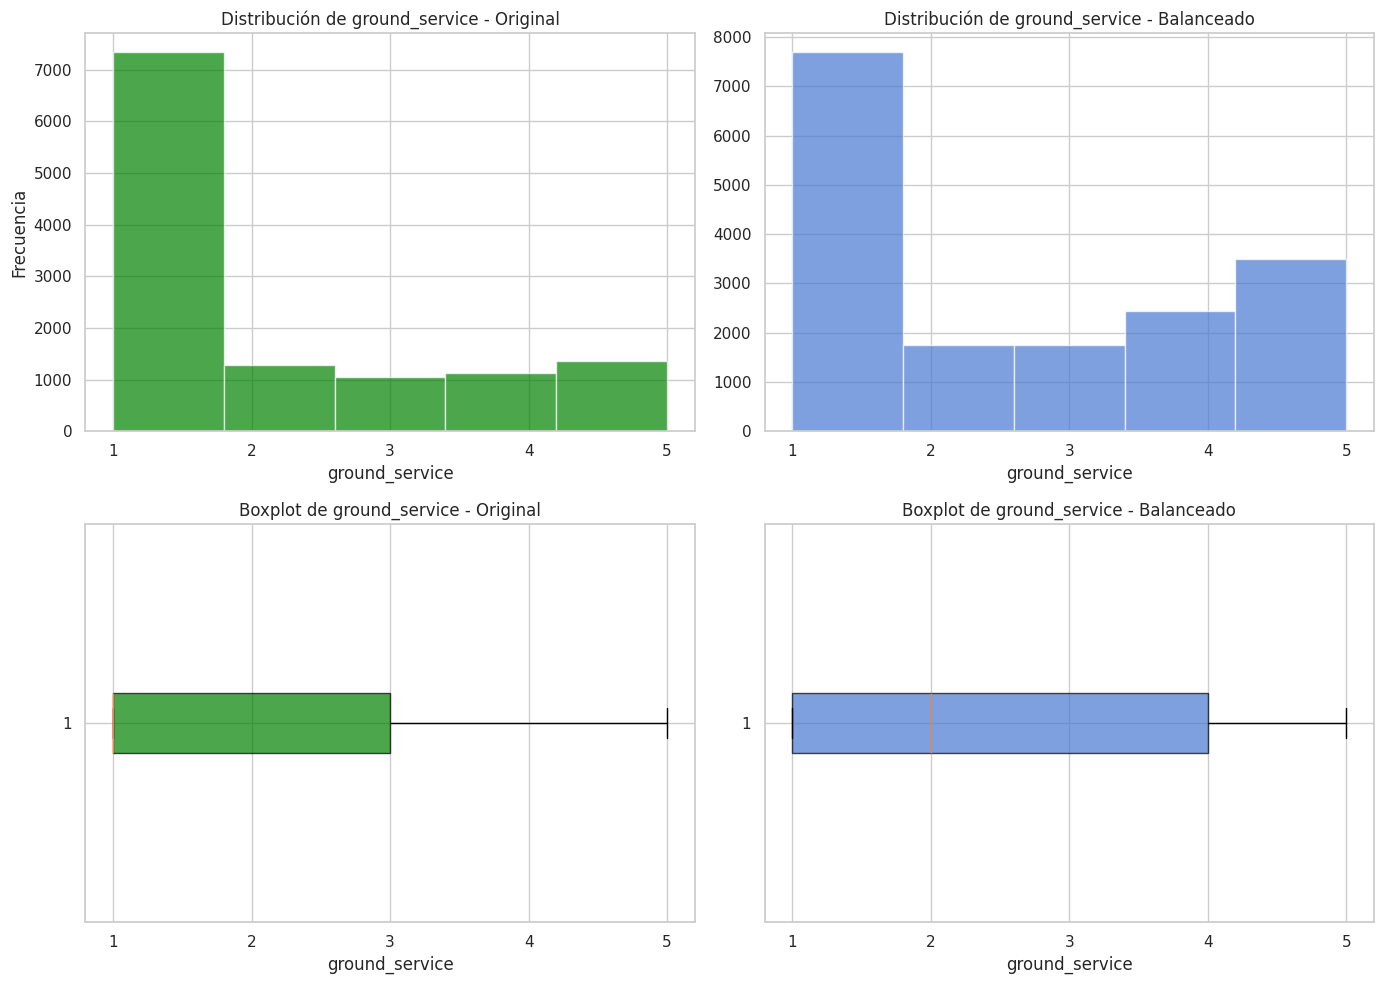

In [ ]:
# Crear una figura con cuatro subgráficos (dos para histogramas y dos para boxplots)
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Histograma para el dataset original
ax[0, 0].hist(df_old['ground_service'].dropna(), bins=5, color='green', alpha=0.7, range=(1, 5))
ax[0, 0].set_title('Distribución de ground_service - Original')
ax[0, 0].set_xlabel('ground_service')
ax[0, 0].set_ylabel('Frecuencia')
ax[0, 0].set_xticks(range(1, 6))

# Histograma para el dataset balanceado
ax[0, 1].hist(df_balanced['ground_service'].dropna(), bins=5, alpha=0.7, range=(1, 5))
ax[0, 1].set_title('Distribución de ground_service - Balanceado')
ax[0, 1].set_xlabel('ground_service')
ax[0, 1].set_xticks(range(1, 6))

# Boxplot para el dataset original
ax[1, 0].boxplot(df_old['ground_service'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='green', alpha=0.7))
ax[1, 0].set_title('Boxplot de ground_service - Original')
ax[1, 0].set_xlabel('ground_service')
ax[1, 0].set_xticks(range(1, 6))

# Boxplot para el dataset balanceado
ax[1, 1].boxplot(df_balanced['ground_service'].dropna(), vert=False, patch_artist=True, boxprops=dict(alpha=0.7))
ax[1, 1].set_title('Boxplot de ground_service - Balanceado')
ax[1, 1].set_xlabel('ground_service')
ax[1, 1].set_xticks(range(1, 6))

plt.tight_layout()
plt.show()

Los gráficos indican que el valor más frecuente para ground_service en ambos datasets es 1, reflejando una percepción baja del servicio en tierra. En el dataset balanceado, se observa un incremento en las valoraciones más altas (4 y 5), lo que eleva la mediana a 2. A pesar de este cambio, la distribución general sigue siendo similar a la del dataset original, con una tendencia predominante hacia valoraciones bajas.

### value_for_money

In [ ]:
df_balanced['value_for_money'].value_counts()

value_for_money
1.0    6485
5.0    4905
4.0    2719
3.0    1586
2.0    1455
Name: count, dtype: int64

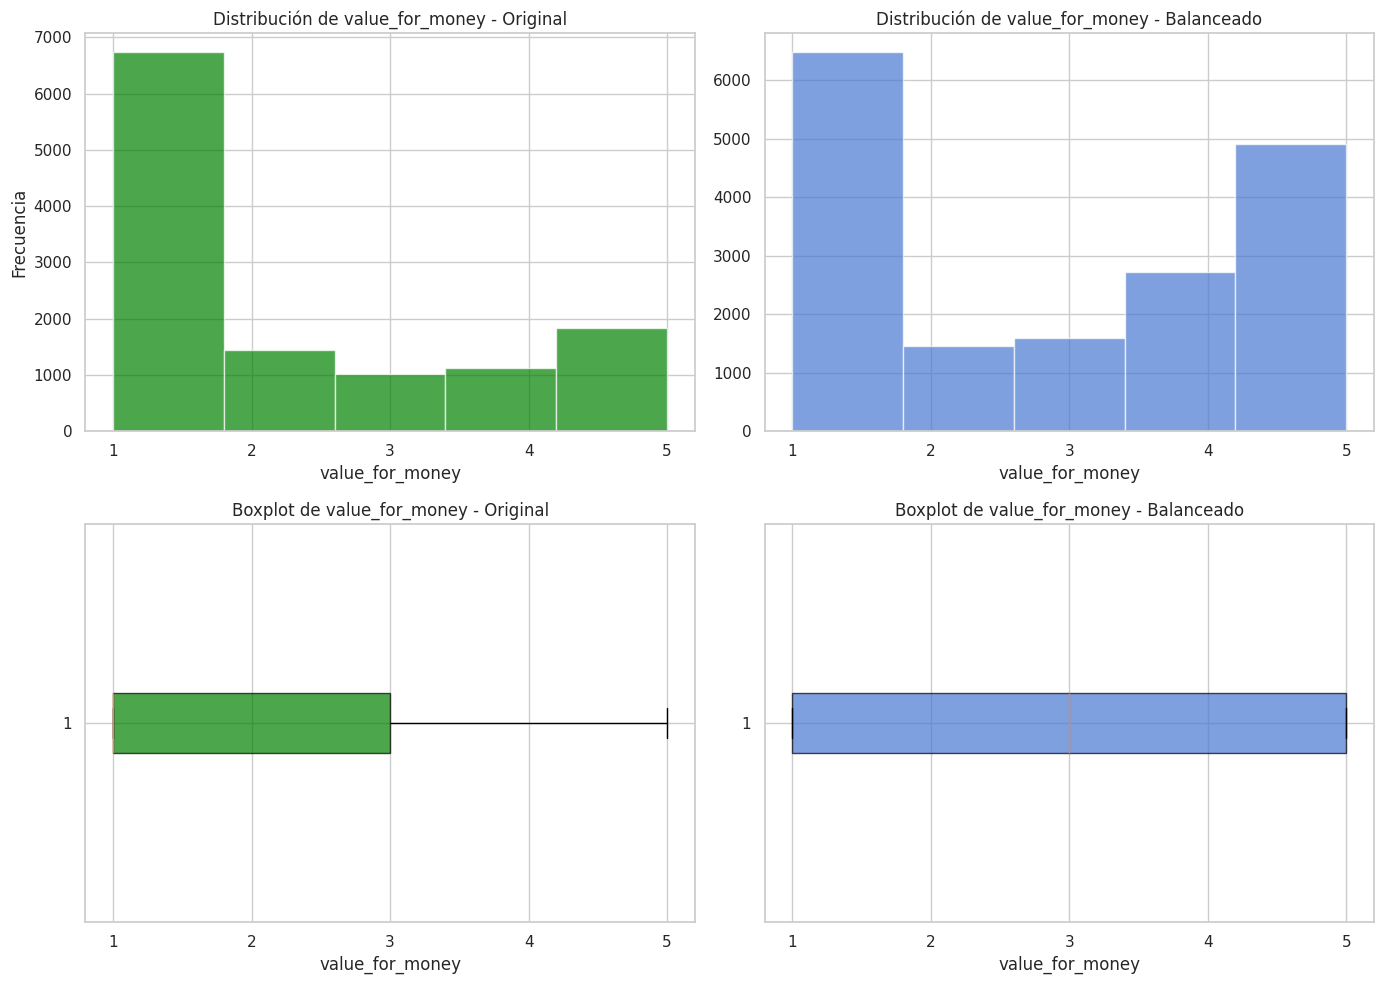

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Histograma para el dataset original
ax[0, 0].hist(df_old['value_for_money'].dropna(), bins=5, color='green', alpha=0.7, range=(1, 5))
ax[0, 0].set_title('Distribución de value_for_money - Original')
ax[0, 0].set_xlabel('value_for_money')
ax[0, 0].set_ylabel('Frecuencia')
ax[0, 0].set_xticks(range(1, 6))

# Histograma para el dataset balanceado
ax[0, 1].hist(df_balanced['value_for_money'].dropna(), bins=5, alpha=0.7, range=(1, 5))
ax[0, 1].set_title('Distribución de value_for_money - Balanceado')
ax[0, 1].set_xlabel('value_for_money')
ax[0, 1].set_xticks(range(1, 6))

# Boxplot para el dataset original
ax[1, 0].boxplot(df_old['value_for_money'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='green', alpha=0.7))
ax[1, 0].set_title('Boxplot de value_for_money - Original')
ax[1, 0].set_xlabel('value_for_money')
ax[1, 0].set_xticks(range(1, 6))

# Boxplot para el dataset balanceado
ax[1, 1].boxplot(df_balanced['value_for_money'].dropna(), vert=False, patch_artist=True, boxprops=dict(alpha=0.7))
ax[1, 1].set_title('Boxplot de value_for_money - Balanceado')
ax[1, 1].set_xlabel('value_for_money')
ax[1, 1].set_xticks(range(1, 6))

plt.tight_layout()
plt.show()

Los gráficos muestran que en ambos datasets el valor más frecuente para value_for_money es 1, lo que indica una percepción baja en la relación calidad-precio. En el dataset balanceado, se observa un incremento en las valoraciones más altas (4 y 5), lo que eleva la mediana a 2. Sin embargo, la distribución general conserva la tendencia hacia valoraciones bajas, similar a la estructura del dataset original.

### route_distance

In [ ]:
df_balanced.select_dtypes(include=np.number).columns

Index(['overall', 'review_dayofweek', 'review_month', 'review_year',
       'flight_dayofweek', 'flight_month', 'flight_year', 'days_since_flight',
       'seat_comfort', 'cabin_service', 'food_service', 'food_bev',
       'ground_service', 'value_for_money', 'recommended', 'route_distance',
       'route_time_minutes'],
      dtype='object')

In [ ]:
df_balanced["route_distance"].nunique()

4130

La variable route_distance en el dataset balanceado tiene 4,130 valores únicos. Esto indica una amplia variedad de distancias entre rutas cubiertas por los vuelos en el dataset.

In [ ]:
print(df_balanced['route_distance'].describe())

count    17150.000000
mean      3134.293589
std       2877.121655
min        106.001872
25%       1291.474610
50%       2086.021590
75%       3892.726473
max      18795.167534
Name: route_distance, dtype: float64


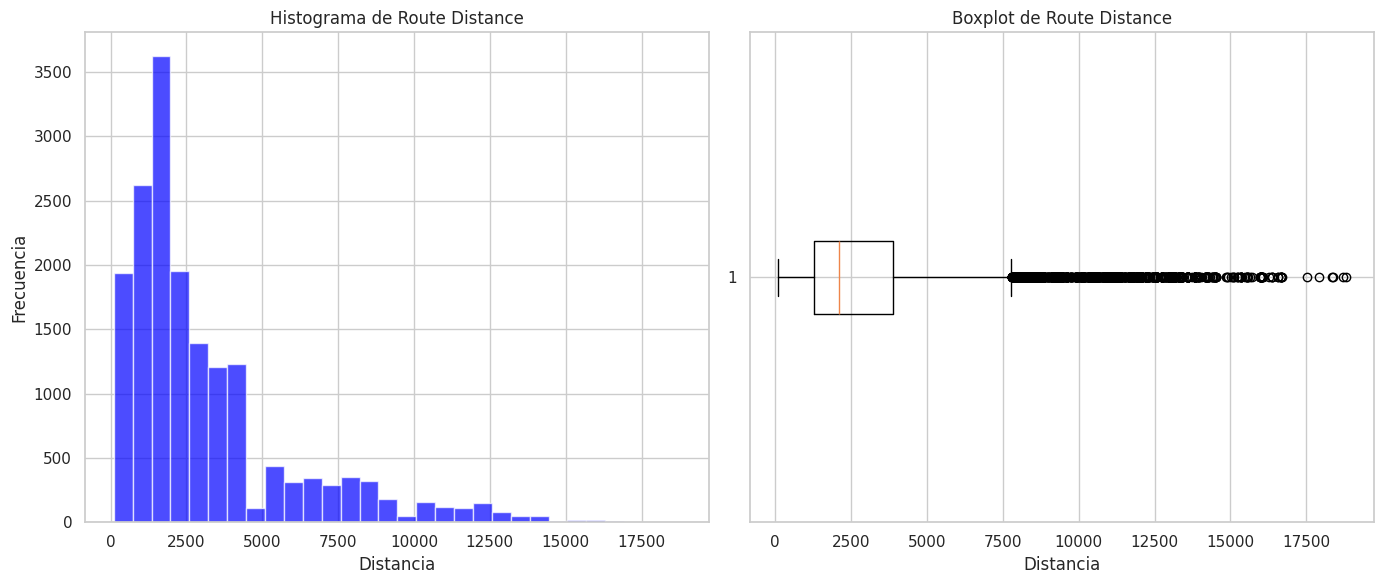

In [ ]:
plt.figure(figsize=(14, 6))

# Histograma
plt.subplot(1, 2, 1)
plt.hist(df_balanced['route_distance'], bins=30, color='blue', alpha=0.7)
plt.title('Histograma de Route Distance')
plt.xlabel('Distancia')
plt.ylabel('Frecuencia')

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(df_balanced['route_distance'], vert=False)
plt.title('Boxplot de Route Distance')
plt.xlabel('Distancia')

plt.tight_layout()
plt.show()

In [ ]:
# Calcular los límites de outliers usando IQR
q1 = df_balanced['route_distance'].quantile(0.25)  # Primer cuartil
q3 = df_balanced['route_distance'].quantile(0.75)  # Tercer cuartil
iqr = q3 - q1  # Rango intercuartil

# Límites inferiores y superiores
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

# Filtrar los outliers
outliers = df_balanced[(df_balanced['route_distance'] < lower_limit) | (df_balanced['route_distance'] > upper_limit)]

outliers

Límites inferiores y superiores:
Lower: -2610.4031864155886, Upper: 7794.604269381804

Outliers encontrados:


airline  overall                 author  review_dayofweek  \
12     Frontier Airlines      1.0            Author 8841                 1   
19       United Airlines      1.0            Author 5095                 2   
28       United Airlines      6.0            Author 5628                 6   
29       United Airlines      4.0            Author 5909                 3   
34     American Airlines      3.0             Author 892                 5   
...                  ...      ...                    ...               ...   
17116    United Airlines      7.0   Synthetic_Author_393                 1   
17120    United Airlines     10.0            Author 5492                 5   
17121    United Airlines      7.0  Synthetic_Author_1495                 6   
17138    Delta Air Lines      9.0            Author 2853                 1   
17139    United Airlines      4.0            Author 5019                 0   

       review_month  review_year  flight_dayofweek  flight_month  flight_year  \
12               11         2018                 0          11.0       2018.0   
19                3         2017                 2           3.0       2017.0   
28                5         2014                 3           5.0       2014.0   
29                3         2015                 1           3.0       2015.0   
34                6         2018                 3           5.0       2018.0   
...             ...          ...               ...           ...          ...   
17116             2         2016                 2           2.0       2016.0   
17120            10         2015                 1          10.0       2015.0   
17121            10         2015                 1          10.0       2015.0   
17138            11         2017                 3          11.0       2017.0   
17139            10         2017                 3          10.0       2017.0   

       days_since_flight  ... continent_origin  \
12                     8  ...    North America   
19                     7  ...    North America   
28                    10  ...    North America   
29                     9  ...             Asia   
34                     9  ...           Europe   
...                  ...  ...              ...   
17116                  6  ...           Europe   
17120                 11  ...    North America   
17121                  5  ...           Europe   
17138                  5  ...           Europe   
17139                 11  ...    North America   

                             coordinates_origin airport_classification_origin  \
12                          (41.9786, -87.9048)                      National   
19                  (33.94250107, -118.4079971)                      National   
28                          (41.9786, -87.9048)                      National   
29     (31.143400192260742, 121.80500030517578)                 International   
34                            (49.012798, 2.55)                 International   
...                                         ...                           ...   
17116      (52.453899383499994, -1.74802994728)                 International   
17120             (37.61899948120117, -122.375)                      National   
17121                     (53.421299, -6.27007)                 International   
17138                      (51.4706, -0.461941)                 International   
17139                       (41.9786, -87.9048)                      National   

       municipality_destin                    country_destin  \
12                  Sydney                         Australia   
19                Shanghai                             China   
28                 Beijing                             China   
29                 Chicago                     United States   
34            Palm Springs                     United States   
...                    ...                               ...   
17116            Las Vegas                     United States   
17120            Sao 

Los gráficos muestran la distribución y dispersión de la variable route_distance. En el boxplot, observamos una alta concentración de valores en el rango de 0 a 5000, mientras que existen varios outliers hacia distancias mayores, que representan vuelos más largos. El histograma confirma esta concentración, con la mayoría de los vuelos en distancias cortas y una disminución progresiva hacia los valores más altos. Estos outliers, aunque menos frecuentes, son relevantes para capturar rutas de larga distancia en el análisis

In [ ]:
outliers[["municipality_origin", "municipality_destin"]]

municipality_origin municipality_destin
12                Chicago              Sydney
19            Los Angeles            Shanghai
28                Chicago             Beijing
29               Shanghai             Chicago
34                  Paris        Palm Springs
...                   ...                 ...
17116          Birmingham           Las Vegas
17120       San Francisco           Sao Paulo
17121              Dublin          KailuaKona
17138              London       Santo Domingo
17139             Chicago               Tokyo

[1540 rows x 2 columns]

In [ ]:
outliers2 = df_balanced[(df_balanced['route_distance'] > 16000)]

In [ ]:
outliers2[["municipality_origin", "municipality_destin"]]

municipality_origin municipality_destin
688                London            Auckland
1521            Geraldton             Chicago
1561            Hong Kong            Santiago
1620                Perth              Sydney
3349          Tegucigalpa           Singapore
3739              Tocumen           Singapore
5347               Sydney            New York
6637            Hong Kong            Santiago
6756              Bangkok               Cancn
8056            Melbourne            New York
8709              Atlanta           Singapore
9053               Sydney            New York
10911          Washington           Melbourne
11087            New York              Sydney
11096             Atlanta           Singapore
11691            New York              Sydney
11826              Sydney            New York
11913           Melbourne        Philadelphia
11920           Melbourne          Washington
11936              Sydney            New York
12025              Newark           Melbourne
12371            New York              Sydney
12996              Sydney            New York
13039              Newark           Melbourne
13387              Newark           Melbourne
13438           Melbourne        Philadelphia
13668            New York              Sydney
13671             Atlanta           Singapore
14703             Atlanta           Singapore
15022           Singapore             Orlando
16395              Newark           Melbourne
16583          Washington           Melbourne
16958              Sydney            New York
17055            New York              Sydney

Son posibles destinos, es por ello que no se los eliminara.

### route_time_minutes

In [ ]:
df_balanced['route_time_minutes'].describe()

count    17150.000000
mean       235.095394
std        215.766007
min          8.000000
25%         97.000000
50%        156.000000
75%        292.000000
max       1410.000000
Name: route_time_minutes, dtype: float64

Hay vuelos cortos de 8 min. esto se tomaria si fuera el tiempo solo de vuelo sin tener en cuenta, en tierra.

In [ ]:
outliers3 = df_balanced[(df_balanced['route_time_minutes'] == 8)]
outliers3

airline  overall       author  review_dayofweek  review_month  \
1060    United Airlines      1.0  Author 5209                 5             3   
4429    United Airlines      1.0  Author 4763                 0             5   
4805    United Airlines      1.0  Author 5074                 2             8   
6127    United Airlines      2.0  Author 3107                 3             5   
7067  American Airlines      1.0  Author 1394                 1             3   
7272    United Airlines      1.0  Author 4347                 3             2   
8347    United Airlines      1.0  Author 5697                 5             9   

      review_year  flight_dayofweek  flight_month  flight_year  \
1060         2017                 2           3.0       2017.0   
4429         2018                 2           5.0       2018.0   
4805         2017                 3           8.0       2017.0   
6127         2014                 5           5.0       2014.0   
7067         2017                 3           3.0       2017.0   
7272         2018                 4           2.0       2018.0   
8347         2015                 1           9.0       2015.0   

      days_since_flight  ... continent_origin  \
1060                 10  ...    North America   
4429                  5  ...    North America   
4805                  6  ...    North America   
6127                  5  ...    North America   
7067                  5  ...    North America   
7272                  6  ...    North America   
8347                 11  ...    North America   

                            coordinates_origin airport_classification_origin  \
1060  (42.947200775146484, -87.89659881591797)                      National   
4429                       (41.9786, -87.9048)                      National   
4805             (37.61899948120117, -122.375)                      National   
6127  (42.947200775146484, -87.89659881591797)                      National   
7067  (42.947200775146484, -87.89659881591797)                      National   
7272  (42.947200775146484, -87.89659881591797)                      National   
8347  (42.947200775146484, -87.89659881591797)                      National   

      municipality_destin  country_destin  continent_destin  \
1060              Chicago   United States     North America   
4429            Milwaukee   United States     North America   
4805           Santa Rosa   United States     North America   
6127              Chicago   United States     North America   
7067              Chicago   United States     North America   
7272              Chicago   United States     North America   
8347              Chicago   United States     North America   

                            coordinates_destin  airport_classification_destin  \
1060                       (41.9786, -87.9048)                       National   
4429  (42.947200775146484, -87.89659881591797)                       National   
4805               (38.50899887, -122.8130035)                       National   
6127                       (41.9786, -87.9048)                       National   
7067                       (41.9786, -87.9048)                       National   
7272                       (41.9786, -87.9048)                       National   
8347                       (41.9786, -87.9048)                       National   

      route_distance  route_time_minutes  
1060      107.596499                 8.0  
4429      107.596499                 8.0  
4805      106.001872                 8.0  
6127      107.596499                 8.0  
7067      107.596499                 8.0  
7272      107.596499                 8.0  
8347      107.596499                 8.0  

[7 rows x 34 columns]

## variables categoricas

In [ ]:
df_balanced.select_dtypes(include=['object', 'category']).columns

Index(['airline', 'author', 'customer_review', 'traveller_type', 'cabin',
       'iata_code_origin', 'iata_code_destination', 'municipality_origin',
       'country_origin', 'continent_origin', 'coordinates_origin',
       'airport_classification_origin', 'municipality_destin',
       'country_destin', 'continent_destin', 'coordinates_destin',
       'airport_classification_destin'],
      dtype='object')

### Variable airline

In [ ]:
print("Frecuencia de cada aerolínea:\n", df_balanced['airline'].value_counts())

Frecuencia de cada aerolínea:
 airline
United Airlines       3408
American Airlines     3406
Spirit Airlines       3042
Delta Air Lines       2406
Frontier Airlines     1602
Southwest Airlines    1183
Jetblue Airways        862
Alaska Airlines        818
Virgin America         423
Name: count, dtype: int64


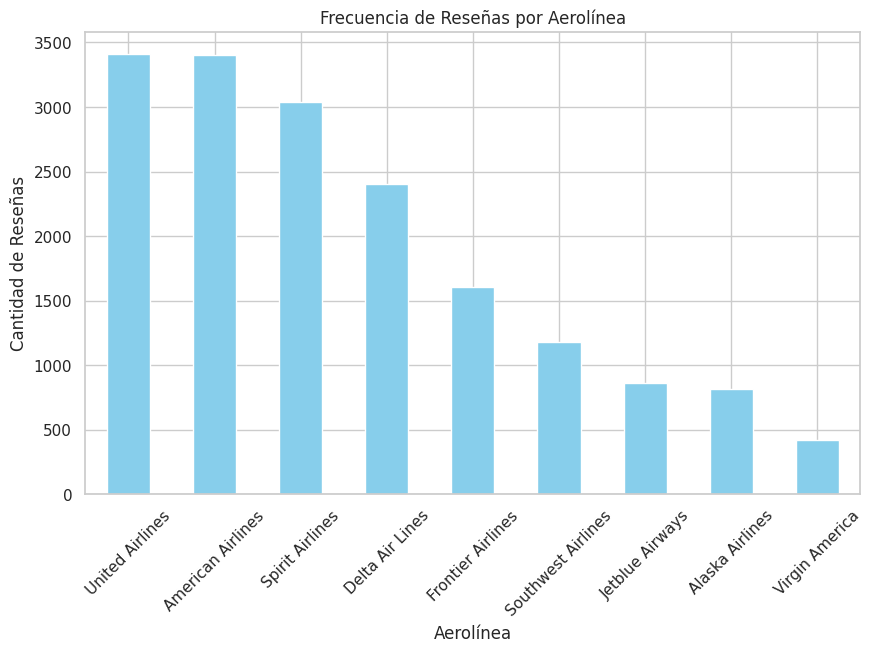

In [ ]:
import matplotlib.pyplot as plt

# Crear el histograma para la frecuencia de cada aerolínea
plt.figure(figsize=(10, 6))
df_balanced['airline'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frecuencia de Reseñas por Aerolínea')
plt.xlabel('Aerolínea')
plt.ylabel('Cantidad de Reseñas')
plt.xticks(rotation=45)
plt.show()


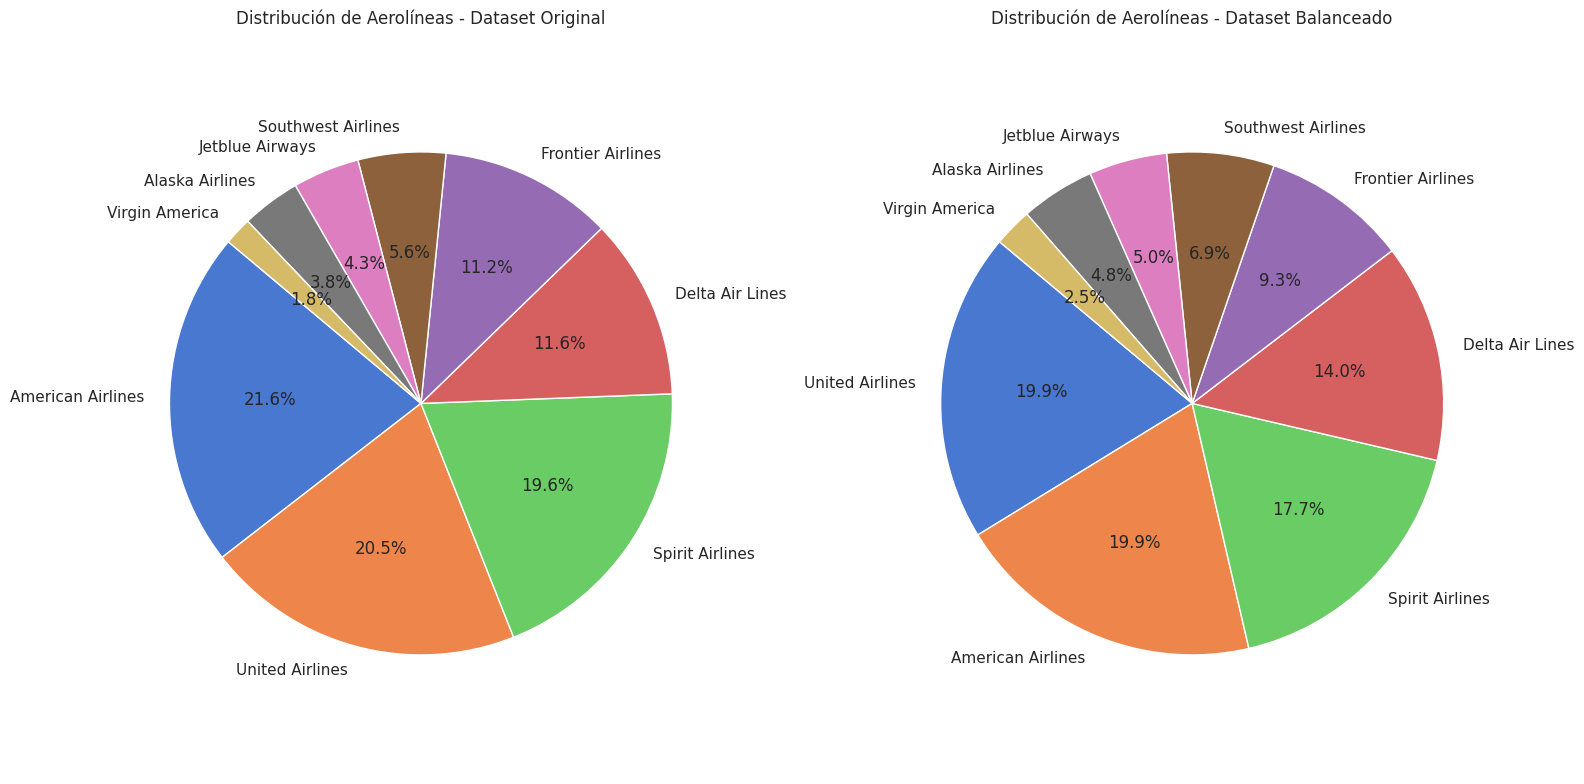

In [ ]:
airline_counts_df = df_old['airline'].value_counts()
airline_counts_df_balanced = df_balanced['airline'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico de torta para el dataset original
ax[0].pie(airline_counts_df, labels=airline_counts_df.index, autopct='%1.1f%%', startangle=140)
ax[0].set_title("Distribución de Aerolíneas - Dataset Original")
ax[0].axis('equal')  # Asegura que el gráfico sea circular

# Gráfico de torta para el dataset balanceado
ax[1].pie(airline_counts_df_balanced, labels=airline_counts_df_balanced.index, autopct='%1.1f%%', startangle=140)
ax[1].set_title("Distribución de Aerolíneas - Dataset Balanceado")
ax[1].axis('equal')  # Asegura que el gráfico sea circular

plt.tight_layout()
plt.show()

En los gráficos, se puede observar cómo la representación de las aerolíneas no varía entre el dataset original y el balanceado.

In [ ]:
airline_metrics = df_balanced.groupby('airline')[['overall', 'recommended']].mean()

print("Promedio de Overall y Tasa de \nRecomendación por Aerolínea:\n")
airline_metrics

Promedio de Overall y Tasa de 
Recomendación por Aerolínea:



overall  recommended
airline                                  
Alaska Airlines     7.034230     0.733496
American Airlines   4.270112     0.411920
Delta Air Lines     6.354946     0.672070
Frontier Airlines   3.592385     0.297129
Jetblue Airways     6.719258     0.663573
Southwest Airlines  6.681319     0.693153
Spirit Airlines     4.217949     0.394149
United Airlines     4.656984     0.458333
Virgin America      7.250591     0.770686

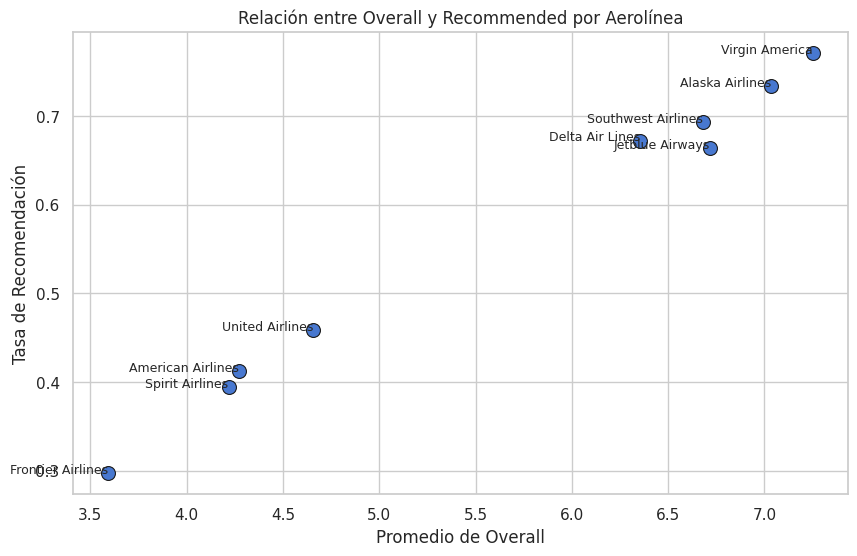

In [ ]:
# Crear un gráfico de dispersión para visualizar la relación entre 'overall' y 'recommended'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=airline_metrics, x='overall', y='recommended', s=100, color='b', edgecolor='k')

# Agregar etiquetas a cada punto para identificar la aerolínea
for i in range(len(airline_metrics)):
    plt.text(airline_metrics['overall'].iloc[i],
             airline_metrics['recommended'].iloc[i],
             airline_metrics.index[i],
             fontsize=9,
             ha='right')

plt.title("Relación entre Overall y Recommended por Aerolínea")
plt.xlabel("Promedio de Overall")
plt.ylabel("Tasa de Recomendación")
plt.show()


El gráfico muestra la relación entre el promedio de satisfacción general (overall) y la tasa de recomendación (recommended) por aerolínea, revelando varias tendencias importantes:

Aerolíneas con Alta Satisfacción y Tasa de Recomendación:

1. Virgin America y Alaska Airlines destacan con los promedios más altos en ambas métricas, lo que sugiere que los pasajeros no solo tienen una percepción positiva de estas aerolíneas en términos de satisfacción general, sino que también tienen una alta probabilidad de recomendarlas.
2. Southwest Airlines, Delta Air Lines y Jetblue Airways presentan niveles intermedios de satisfacción y tasa de recomendación, indicando que estas aerolíneas son valoradas favorablemente, aunque no al nivel de las aerolíneas más destacadas.
3. Frontier Airlines, Spirit Airlines, American Airlines y United Airlines muestran los valores más bajos en ambas métricas, lo cual sugiere una percepción menos favorable de estas aerolíneas entre los pasajeros.


United Airlines tiene un puntaje de overall y una tasa de recomendación relativamente bajos en comparación con sus principales competidores, lo cual indica que hay un margen de mejora en la experiencia y satisfacción del cliente para incrementar la probabilidad de recomendación.
Los resultados muestran que las aerolíneas con promedios más altos en overall tienden también a tener mayores tasas de recomendación, lo cual es consistente con que una mejor experiencia de vuelo lleva a una mayor probabilidad de recomendación.

Es importante considerar que los niveles de satisfacción y las tasas de recomendación podrían no estar directamente relacionados con si una aerolínea es de bajo costo o no. Una hipótesis es que cuando los clientes compran pasajes en aerolíneas como Southwest, son conscientes de las limitaciones en ciertos servicios en comparación con aerolíneas de servicio completo. En estos casos, es probable que las expectativas tengan un papel más relevante que el servicio en sí: los pasajeros ajustan sus expectativas según el tipo de aerolínea que eligen. Por lo tanto, el nivel de satisfacción y la probabilidad de recomendación podrían depender más de cómo la experiencia real se alinea con las expectativas de los clientes que del tipo de servicio ofrecido.

In [ ]:
# Calcular el promedio de 'overall', 'recommended', 'seat_comfort', 'cabin_service', 'ground_service', y 'value_for_money' por aerolínea
airline_metrics = df_balanced.groupby('airline')[['overall', 'recommended', 'seat_comfort', 'cabin_service', 'ground_service', 'value_for_money']].mean()

print("Promedio de Overall, Tasa de Recomendación y Métricas de Satisfacción por Aerolínea:\n")
airline_metrics

Promedio de Overall, Tasa de Recomendación y Métricas de Satisfacción por Aerolínea:



overall  recommended  seat_comfort  cabin_service  \
airline                                                                  
Alaska Airlines     7.034230     0.733496      3.566015       3.852078   
American Airlines   4.270112     0.411920      2.709630       2.652672   
Delta Air Lines     6.354946     0.672070      3.347465       3.545719   
Frontier Airlines   3.592385     0.297129      2.075531       2.306492   
Jetblue Airways     6.719258     0.663573      3.720418       3.613689   
Southwest Airlines  6.681319     0.693153      3.408284       3.699070   
Spirit Airlines     4.217949     0.394149      2.140039       2.549310   
United Airlines     4.656984     0.458333      2.742077       2.825411   
Virgin America      7.250591     0.770686      3.780142       3.723404   

                    ground_service  value_for_money  
airline                                              
Alaska Airlines           3.530562         3.596577  
American Airlines         2.316500         2.571638  
Delta Air Lines           3.058603         3.354946  
Frontier Airlines         1.857054         2.253433  
Jetblue Airways           2.786543         3.606729  
Southwest Airlines        2.992392         3.683009  
Spirit Airlines           2.135108         2.578895  
United Airlines           2.590082         2.710387  
Virgin America            3.236407         3.836879

Las aerolineas Virgin America y Alaska Airlines obtienen los promedios más altos tanto en satisfacción general (overall) como en tasa de recomendación (recommended). Además, sus puntajes en comodidad de asientos, servicio en cabina, atención en tierra y relación calidad-precio (value_for_money) están cerca de 4 en una escala de 1 a 5, lo cual indica una experiencia positiva para los pasajeros en varios aspectos. Esto sugiere que Virgin America y Alaska Airlines están cumpliendo con las expectativas de los clientes y ofreciendo un servicio integralmente satisfactorio.

Aunque Delta Air Lines y Southwest Airlines no alcanzan los niveles de satisfacción general de Virgin y Alaska, estas aerolineas tienen puntajes altos en cabin_service, lo que sugiere que el servicio abordo es bien valorado. Southwest, en particular, muestra un buen puntaje en value_for_money (3.6), lo que indica que los pasajeros sienten que obtienen un buen valor por lo que pagan, a pesar de las limitaciones de ser una aerolínea de bajo costo.


United junto Frontier y Spirit muestran los puntajes más bajos en satisfacción general y tasa de recomendación. Frontier, en particular, tiene puntajes bajos en comodidad de asientos y servicio en tierra (por debajo de 2.5), lo que indica insatisfacción en estos aspectos. Estos resultados sugieren áreas específicas de mejora, ya que la experiencia del pasajero en estas aerolíneas parece no cumplir con sus expectativas.


United y American Airlines tienen una satisfacción general y una tasa de recomendación en el rango medio-bajo. Sus puntajes en comodidad de asientos y servicio en cabina están entre 2.5 y 3.0, lo que indica un nivel de servicio aceptable, pero no excepcional. Ambas aerolíneas podrían beneficiarse de mejoras en estos aspectos para aumentar la satisfacción y las recomendaciones de sus pasajeros.

### author

In [ ]:
df_balanced['author'].value_counts()

author
Author 5392              27
Author 865               20
Author 932               17
Author 97                16
Author 1503              16
                         ..
Author 9145               1
Author 8168               1
Author 2024               1
Author 1142               1
Synthetic_Author_4107     1
Name: count, Length: 15270, dtype: int64

### traveller_type

In [ ]:
df_balanced['traveller_type'].value_counts()

traveller_type
Solo Leisure      7786
Family Leisure    3557
Couple Leisure    3483
Business          2324
Name: count, dtype: int64

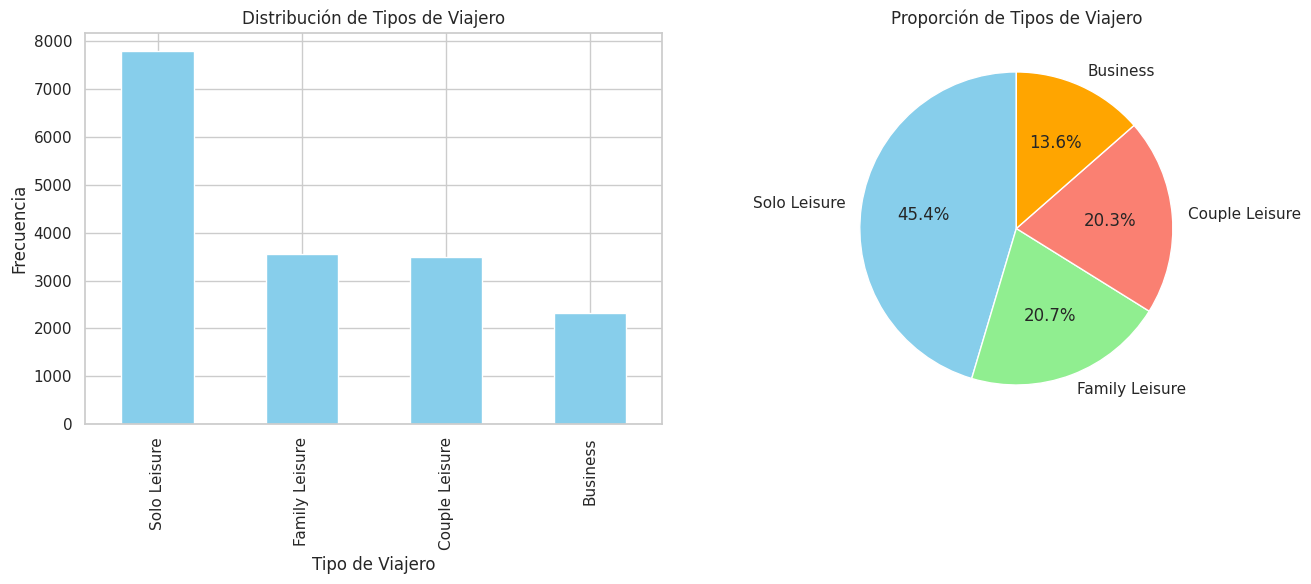

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de barras para la distribución de tipos de viajeros
df_balanced['traveller_type'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_xlabel('Tipo de Viajero')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Tipos de Viajero')

df_balanced['traveller_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'salmon', 'orange'], ax=axes[1])
axes[1].set_ylabel('')
axes[1].set_title('Proporción de Tipos de Viajero')

plt.tight_layout()
plt.show()

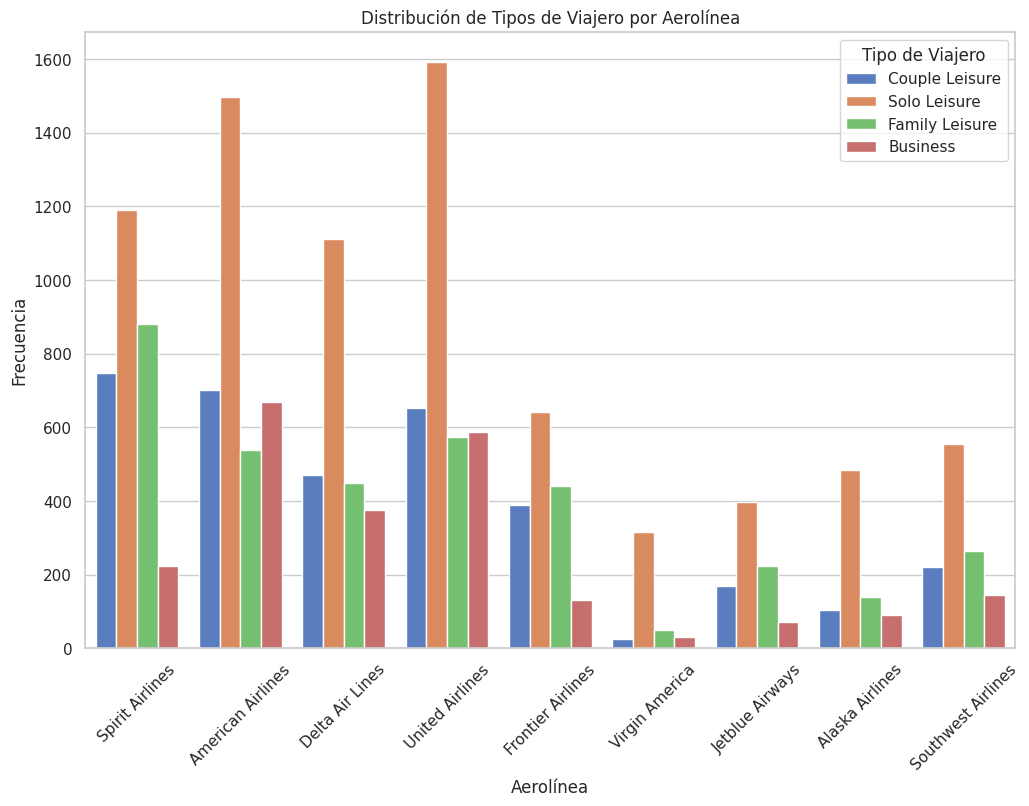

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df_balanced, x='airline', hue='traveller_type')
plt.xlabel('Aerolínea')
plt.ylabel('Frecuencia')
plt.title('Distribución de Tipos de Viajero por Aerolínea')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Viajero')
plt.show()

Análisis de Distribución de Tipos de Viajero por Aerolínea

- Solo Leisure: Predomina en American Airlines, Delta Air Lines, United Airlines, y Spirit Airlines, sugiriendo que estas aerolíneas son populares entre viajeros individuales que buscan opciones de ocio.
- Family Leisure: Destacado en Spirit Airlines y Frontier Airlines, ambas aerolíneas de bajo costo. Esto sugiere que las familias prefieren opciones más económicas.
- Couple Leisure: Común en Delta Air Lines, Southwest Airlines, y Jetblue Airways, que ofrecen una buena combinación de costo y comodidad, atractiva para parejas.
- Business: Principalmente en Delta Air Lines, American Airlines, y United Airlines, reflejando su enfoque en rutas frecuentes y servicios para el viajero de negocios.

Conclusión
- Low-cost: Aerolíneas como Spirit y Frontier son preferidas por familias de ocio.
- Tradicionales: Delta, American, y United son populares entre viajeros de negocios y ocio individual.

### cabin

In [ ]:
df_balanced['cabin'].value_counts()

cabin
Economy Class      14042
First Class         1219
Business Class      1126
Premium Economy      763
Name: count, dtype: int64

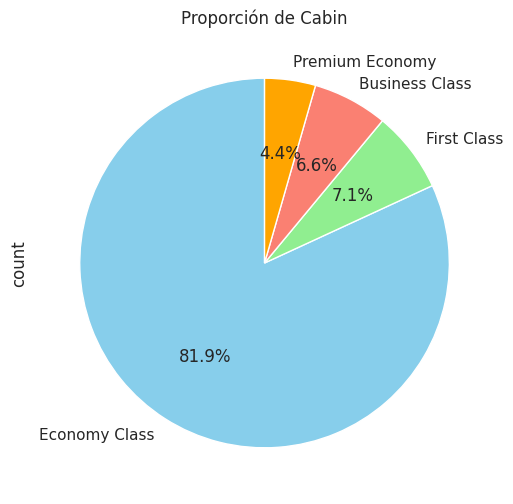

In [ ]:
plt.figure(figsize=(8, 6))
df_balanced['cabin'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'salmon', 'orange'])
plt.title('Proporción de Cabin')
plt.show()


- Economy Class es la más utilizada, representando el 82% de los viajes.
- First Class y Business Class están casi empatadas, con 6.5% y 7%, respectivamente.
- Premium Economy es la menos frecuente, con un 4.4%.


Es logico que sea mayor la proporcion de economy class porque las aerolíneas suelen dedicar la mayor parte del espacio de la cabina a la clase económica, permitiendo transportar a más pasajeros por vuelo en esta clase

In [ ]:
cabin_airline_table = pd.crosstab(df_balanced['airline'], df_balanced['cabin'])
cabin_airline_table

cabin               Business Class  Economy Class  First Class  \
airline                                                          
Alaska Airlines                 22            586          190   
American Airlines              416           2489          373   
Delta Air Lines                272           1730          243   
Frontier Airlines                0           1562            0   
Jetblue Airways                 47            711           73   
Southwest Airlines               0           1183            0   
Spirit Airlines                  0           3042            0   
United Airlines                369           2405          269   
Virgin America                   0            334           71   

cabin               Premium Economy  
airline                              
Alaska Airlines                  20  
American Airlines               128  
Delta Air Lines                 161  
Frontier Airlines                40  
Jetblue Airways                  31  
Southwest Airlines                0  
Spirit Airlines                   0  
United Airlines                 365  
Virgin America                   18

En Virgin America, la First Class es la más cercana a lo que tradicionalmente se conoce como Business Class en otras aerolíneas. Esta clase ofrecía asientos más amplios y cómodos, con servicios adicionales como comidas y bebidas de cortesía, y mayor espacio para las piernas. Aunque Virgin America no tenía una Business Class per se, su First Class cumplía con las expectativas de los pasajeros que buscan una experiencia de vuelo superior.



Hablo en pasado porque Virgin America dejó de operar bajo su marca original en 2018, tras su fusión con Alaska Airlines en 2016. Después de la integración, las operaciones y servicios de Virgin America se unificaron bajo la marca Alaska Airlines, y la marca Virgin America dejó de existir.

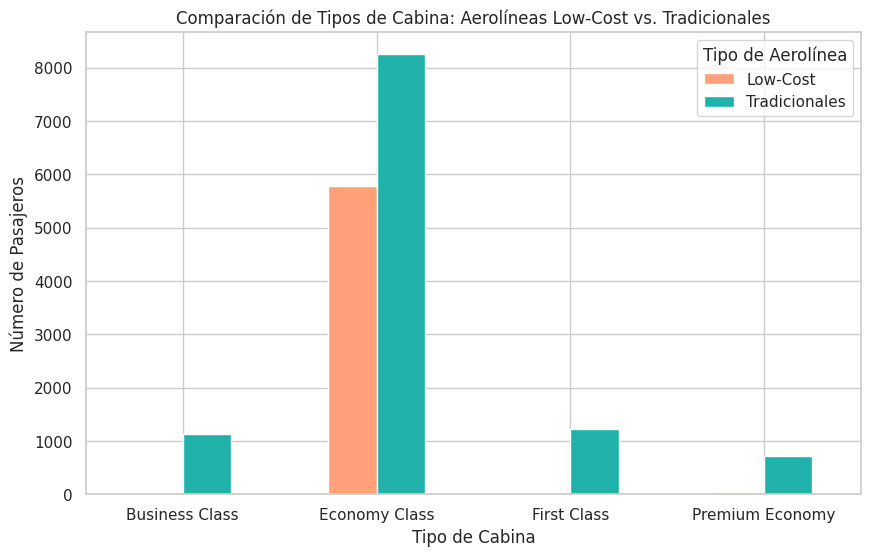

In [ ]:
low_cost = ['Spirit Airlines', 'Frontier Airlines', 'Southwest Airlines']
tradicionales = ['American Airlines', 'Delta Air Lines', 'United Airlines', 'Alaska Airlines', 'Jetblue Airways', 'Virgin America']

low_cost_data = cabin_airline_table.loc[low_cost].sum()
tradicional_data = cabin_airline_table.loc[tradicionales].sum()

comparative_data = pd.DataFrame({'Low-Cost': low_cost_data, 'Tradicionales': tradicional_data})

comparative_data.plot(kind='bar', figsize=(10, 6), color=['#FFA07A', '#20B2AA'])
plt.xlabel('Tipo de Cabina')
plt.ylabel('Número de Pasajeros')
plt.title('Comparación de Tipos de Cabina: Aerolíneas Low-Cost vs. Tradicionales')
plt.xticks(rotation=0)
plt.legend(title='Tipo de Aerolínea')
plt.show()

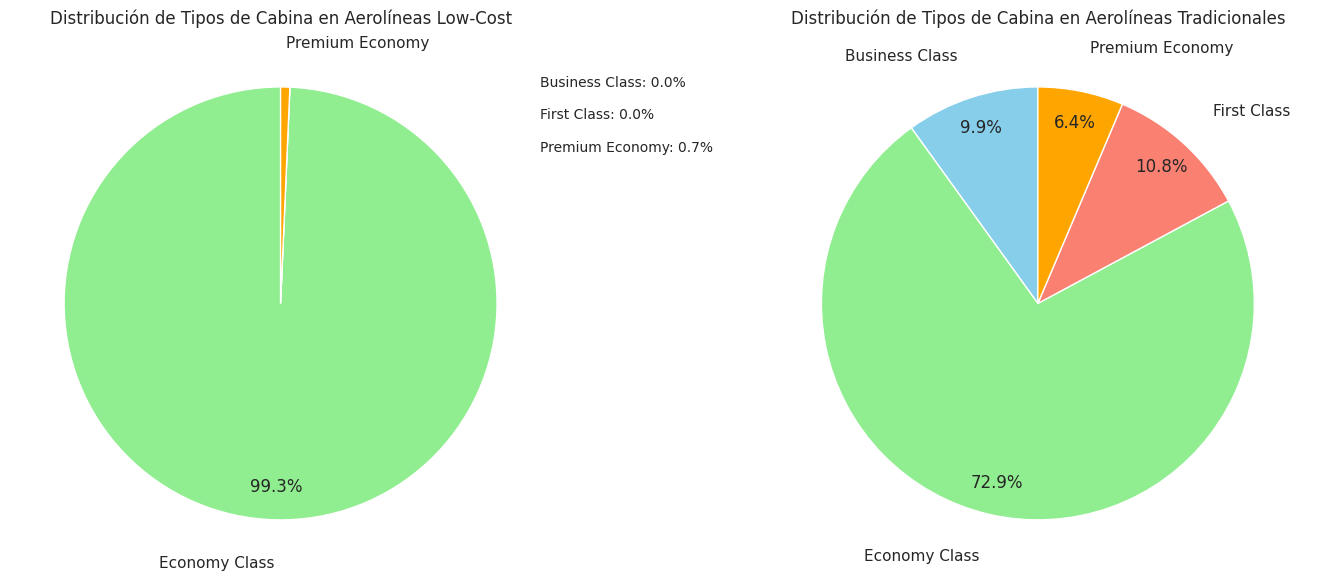

In [ ]:
# Crear una figura con dos gráficos de torta
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de torta para aerolíneas low-cost
low_cost_data.plot(kind='pie', autopct=lambda p: f'{p:.1f}%' if p > 2 else '',
                   startangle=90, colors=['skyblue', 'lightgreen', 'salmon', 'orange'],
                   pctdistance=0.85, labeldistance=1.2, ax=ax1)
ax1.set_ylabel('')
ax1.set_title('Distribución de Tipos de Cabina en Aerolíneas Low-Cost')

# Anotar porcentajes pequeños manualmente para Low-Cost
small_categories_low_cost = low_cost_data[low_cost_data / low_cost_data.sum() * 100 < 2]
for i, (label, value) in enumerate(small_categories_low_cost.items()):
    ax1.text(1.2, 1 - i*0.15, f'{label}: {value / low_cost_data.sum() * 100:.1f}%', ha='left', fontsize=10)

# Gráfico de torta para aerolíneas tradicionales
tradicional_data.plot(kind='pie', autopct=lambda p: f'{p:.1f}%' if p > 2 else '',
                      startangle=90, colors=['skyblue', 'lightgreen', 'salmon', 'orange'],
                      pctdistance=0.85, labeldistance=1.2, ax=ax2)
ax2.set_ylabel('')
ax2.set_title('Distribución de Tipos de Cabina en Aerolíneas Tradicionales')

# Anotar porcentajes pequeños manualmente para Tradicionales
small_categories_traditional = tradicional_data[tradicional_data / tradicional_data.sum() * 100 < 2]
for i, (label, value) in enumerate(small_categories_traditional.items()):
    ax2.text(1.2, 1 - i*0.15, f'{label}: {value / tradicional_data.sum() * 100:.1f}%', ha='left', fontsize=10)

# Ajustar la disposición de los gráficos
plt.tight_layout()
plt.show()

In [ ]:
df_balanced.columns

Index(['airline', 'overall', 'author', 'review_dayofweek', 'review_month',
       'review_year', 'flight_dayofweek', 'flight_month', 'flight_year',
       'days_since_flight', 'customer_review', 'traveller_type', 'cabin',
       'seat_comfort', 'cabin_service', 'food_service', 'food_bev',
       'ground_service', 'value_for_money', 'recommended', 'iata_code_origin',
       'iata_code_destination', 'municipality_origin', 'country_origin',
       'continent_origin', 'coordinates_origin',
       'airport_classification_origin', 'municipality_destin',
       'country_destin', 'continent_destin', 'coordinates_destin',
       'airport_classification_destin', 'route_distance',
       'route_time_minutes'],
      dtype='object')

### iata_code_origin

In [ ]:
import numpy as np
np.random.choice(df_balanced['iata_code_origin'].unique(), 5, replace=False)


array(['NCL', 'YUM', 'GVA', 'ROC', 'KCI'], dtype=object)

In [ ]:
print(f"En el dataset, hay un total de {df_balanced['iata_code_origin'].nunique()} aeropuertos\nde origen unicas de donde provienen los pasajeros.")

En el dataset, hay un total de 431 aeropuertos
de origen unicas de donde provienen los pasajeros.


### iata_code_destination

In [ ]:
df_balanced['iata_code_destination'].value_counts()

iata_code_destination
LAX    921
LAS    874
ORD    647
DEN    627
MCO    617
      ... 
VER      1
DIA      1
QRA      1
ESR      1
ACV      1
Name: count, Length: 486, dtype: int64

In [ ]:
print(f"En el dataset, hay un total de {df_balanced['iata_code_destination'].nunique()} aeropuertos\nde origen unicas de donde provienen los pasajeros.")

En el dataset, hay un total de 486 aeropuertos
de origen unicas de donde provienen los pasajeros.


### country_origin

In [ ]:
df_balanced['country_origin'].value_counts()

country_origin
United States                      14935
United Kingdom                       546
Canada                               307
Mexico                               144
Japan                                110
                                   ...  
Uruguay                                1
Cayman Islands                         1
Russian Federation                     1
Denmark                                1
Sint Eustatius and Saba Bonaire        1
Name: count, Length: 76, dtype: int64

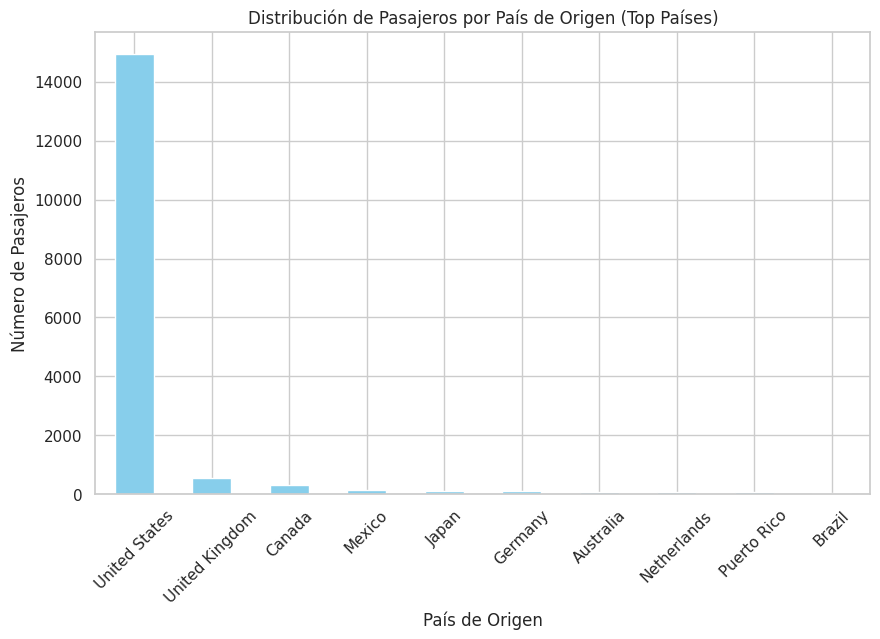

In [ ]:

import matplotlib.pyplot as plt

# Filtrar los países con más de un cierto número de pasajeros (por ejemplo, 50)
df_country_origin = df_balanced['country_origin'].value_counts()
top_countries = df_country_origin[df_country_origin > 50]

# Gráfico de barras para los países de origen
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.xlabel('País de Origen')
plt.ylabel('Número de Pasajeros')
plt.title('Distribución de Pasajeros por País de Origen (Top Países)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_country_origin

country_origin
United States                      14935
United Kingdom                       546
Canada                               307
Mexico                               144
Japan                                110
                                   ...  
Uruguay                                1
Cayman Islands                         1
Russian Federation                     1
Denmark                                1
Sint Eustatius and Saba Bonaire        1
Name: count, Length: 76, dtype: int64

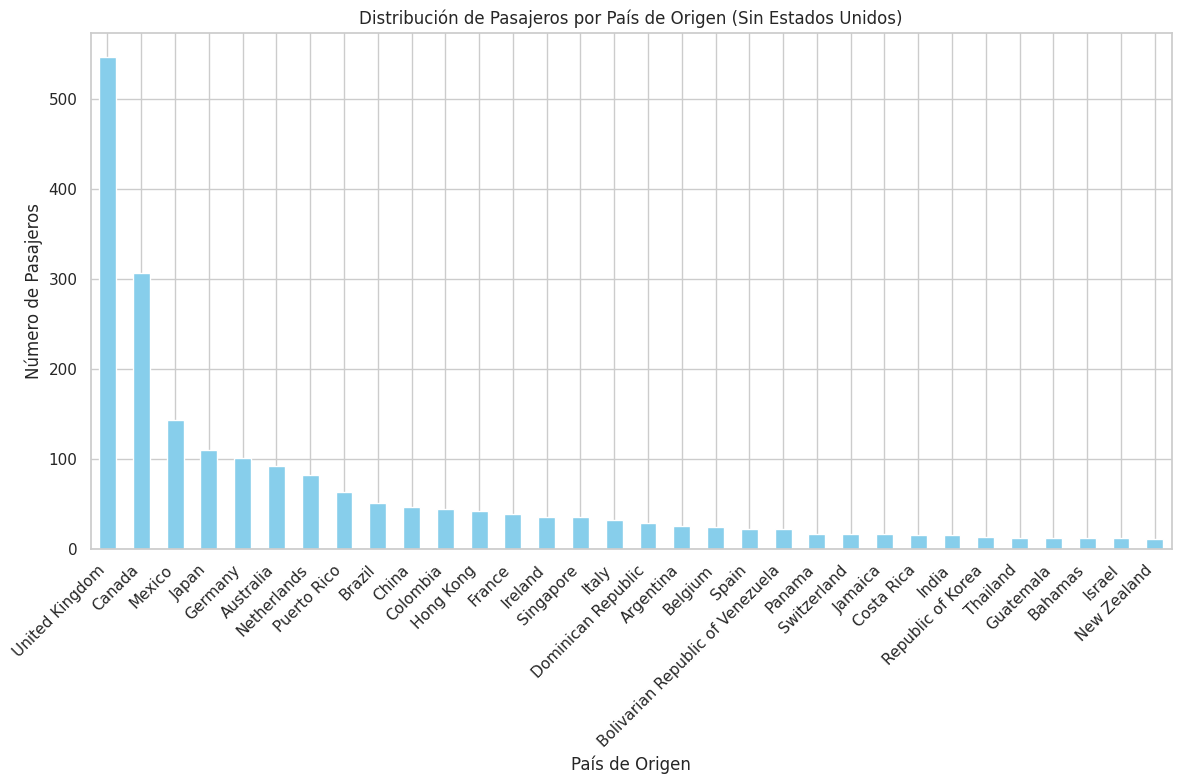

In [ ]:
# Filtrar los países con un número significativo de pasajeros (por ejemplo, > 10)
df_country_origin_no_us = df_balanced[df_balanced['country_origin'] != 'United States']

df_country_origin_no_us = df_country_origin_no_us['country_origin'].value_counts()
top_countries = df_country_origin_no_us[df_country_origin_no_us > 10]

# Gráfico de barras para los países de origen sin Estados Unidos
plt.figure(figsize=(12, 8))
top_countries.plot(kind='bar', color='skyblue')
plt.xlabel('País de Origen')
plt.ylabel('Número de Pasajeros')
plt.title('Distribución de Pasajeros por País de Origen (Sin Estados Unidos)')
plt.xticks(rotation=45, ha='right')  # Rotación de 45 grados y alineación a la derecha
plt.tight_layout()  # Ajusta el espaciado para que las etiquetas no se corten
plt.show()


 'iata_code_origin', 'iata_code_destination',
       'country_origin', 'municipality_origin', 'coordinates_origin',
       'airport_classification_origin', 'country_destin',
       'municipality_destin', 'coordinates_destin',
       'airport_classification_destin', 'review_date', 'flight_date'],

### 'municipality_origin'

In [ ]:
print(f"En el dataset, hay un total de {df_balanced['municipality_origin'].nunique()} ciudades \nde origen unicas de donde provienen los pasajeros.")

En el dataset, hay un total de 362 ciudades 
de origen unicas de donde provienen los pasajeros.


Esto indica una gran diversidad en los puntos de partida de los viajeros, lo cual puede ser útil para analizar patrones de viaje y preferencias regionales en términos de rutas y aerolíneas.

In [ ]:
# Agrupar por ciudad y contar la cantidad de aeropuertos únicos
airport_counts = df_balanced.groupby('municipality_origin')['iata_code_origin'].nunique()

# Filtrar ciudades con más de un aeropuerto
cities_with_multiple_airports = airport_counts[airport_counts > 1].index.tolist()

# Mostrar las ciudades
print("Ciudades con más de un aeropuerto:", cities_with_multiple_airports)

# Crear un DataFrame con los detalles de estas ciudades
df_multiple_airports = df_balanced[df_balanced['municipality_origin'].isin(cities_with_multiple_airports)]
df_multiple_airports_summary = df_multiple_airports[['municipality_origin', 'iata_code_origin']].drop_duplicates()

# Mostrar el resumen
print("Resumen de ciudades con múltiples aeropuertos:")
print(df_multiple_airports_summary)



Ciudades con más de un aeropuerto: ['Albany', 'Barcelona', 'Beijing', 'Belfast', 'Birmingham', 'Brussels', 'Burlington', 'Charleston', 'Chicago', 'Cincinnati', 'Dayton', 'Doha', 'Dublin', 'Fayetteville', 'Fort Lauderdale', 'Fort Myers', 'Fort Wayne', 'Georgetown', 'Glasgow', 'Harrisburg', 'Houston', 'Jackson', 'Las Vegas', 'Lima', 'Los Angeles', 'Manchester', 'Manila', 'Medelln', 'Melbourne', 'Milan', 'Milwaukee', 'Montevideo', 'Montral', 'Mrida', 'New York', 'Newcastle', 'Oklahoma City', 'Palm Springs', 'Paris', 'Philadelphia', 'Pittsburgh', 'Portland', 'Rome', 'Sacramento', 'San Diego', 'San Jose', 'Santo Domingo', 'Sao Paulo', 'Seoul', 'St Louis', 'Tokyo', 'Venice', 'Washington', 'West Palm Beach', 'Williston', 'Wilmington']
Resumen de ciudades con múltiples aeropuertos:
      municipality_origin iata_code_origin
0                San Jose              SJO
4              Harrisburg              MDT
5               Barcelona              BLA
8              Washington              DCA


In [ ]:
# Agrupar por ciudad y contar la cantidad de aeropuertos únicos
airport_counts = df_balanced.groupby('municipality_origin')['iata_code_origin'].nunique()

# Filtrar ciudades con más de un aeropuerto
num_cities_with_multiple_airports = (airport_counts > 1).sum()

# Mostrar el resultado
print(f"Hay {num_cities_with_multiple_airports} ciudades con más de un aeropuerto en el dataset.")


Hay 56 ciudades con más de un aeropuerto en el dataset.


In [ ]:
df_balanced[['municipality_origin', "country_origin"]].value_counts().head(20)

municipality_origin  country_origin
New York             United States     958
Los Angeles          United States     865
Chicago              United States     748
San Francisco        United States     642
Las Vegas            United States     559
Fort Lauderdale      United States     535
Denver               United States     517
Atlanta              United States     514
Orlando              United States     496
London               United Kingdom    457
Houston              United States     455
Seattle              United States     447
Boston               United States     432
Washington           United States     425
Newark               United States     368
Detroit              United States     305
Miami                United States     298
Minneapolis          United States     293
DallasFort Worth     United States     293
Baltimore            United States     281
Name: count, dtype: int64

De las veinte ciudades más frecuentes en el dataset, diecinueve son de Estados Unidos, lo cual es esperable dado que el dataset se centra específicamente en aerolíneas estadounidenses. Solo una ciudad, **Londres** en el Reino Unido, aparece en esta lista de alta frecuencia. Esto refleja que la mayoría de los pasajeros tienen como origen ciudades dentro de Estados Unidos, alineándose con el enfoque del análisis en rutas y servicios de aerolíneas de este país.

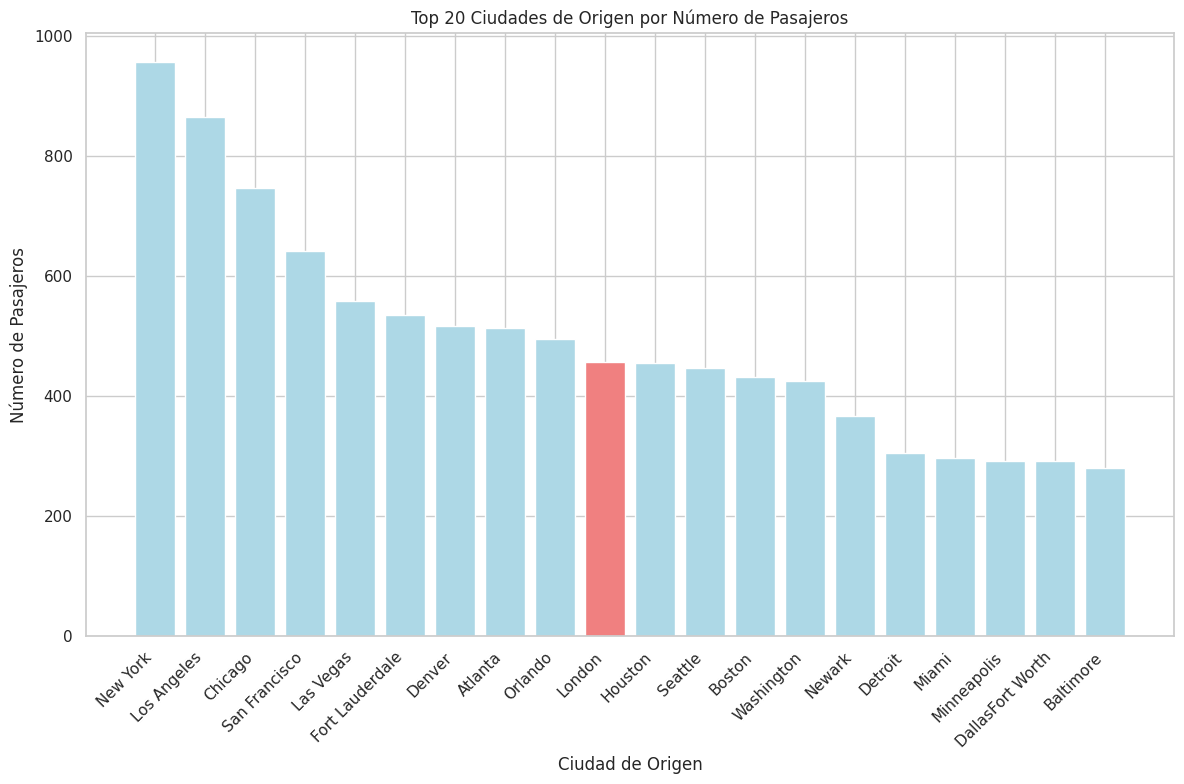

In [ ]:
import matplotlib.pyplot as plt

# Obtener los 20 municipios más frecuentes junto con el país de origen
top_20_municipalities = df_balanced[['municipality_origin', 'country_origin']].value_counts().head(20).reset_index()
top_20_municipalities.columns = ['municipality_origin', 'country_origin', 'count']

# Asignar colores: rojo para los municipios de United Kingdom, azul para los demás
colors = ['lightcoral' if country == 'United Kingdom' else 'lightblue' for country in top_20_municipalities['country_origin']]

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(top_20_municipalities['municipality_origin'], top_20_municipalities['count'], color=colors)
plt.xlabel('Ciudad de Origen')
plt.ylabel('Número de Pasajeros')
plt.title('Top 20 Ciudades de Origen por Número de Pasajeros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


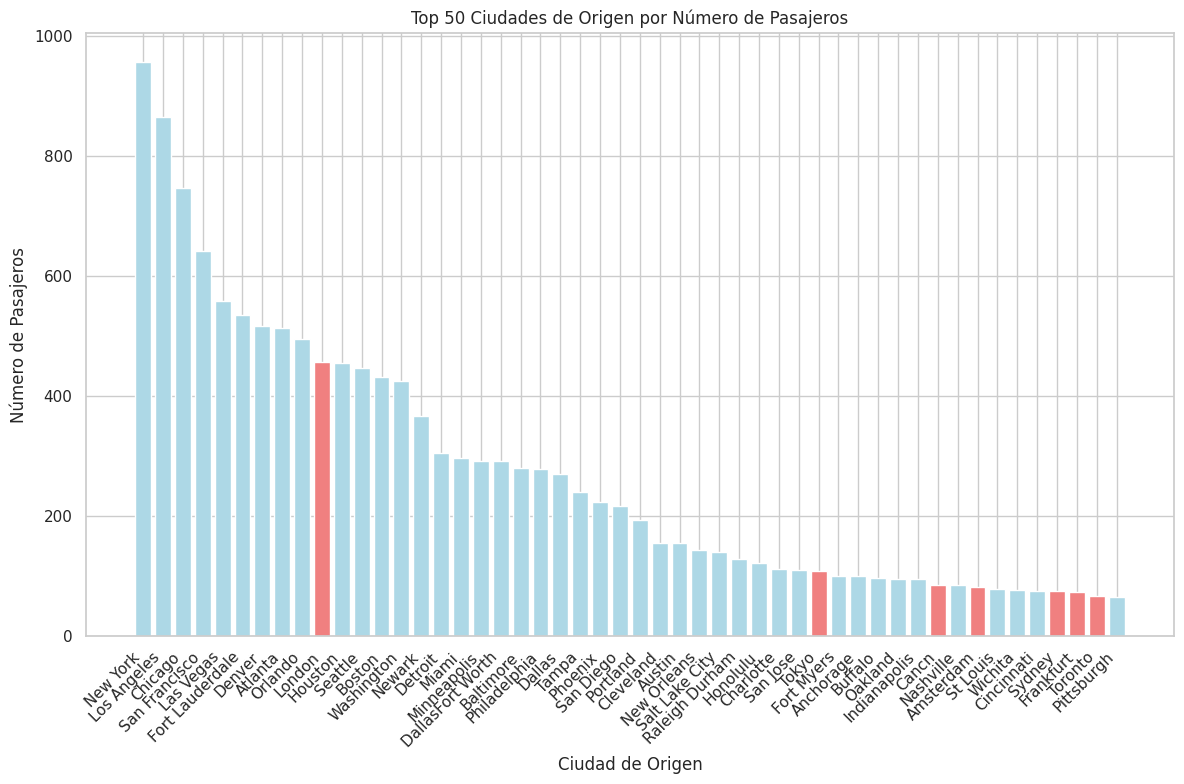

In [ ]:
import matplotlib.pyplot as plt

# Obtener los 20 municipios más frecuentes junto con el país de origen
top_20_municipalities = df_balanced[['municipality_origin', 'country_origin']].value_counts().head(50).reset_index()
top_20_municipalities.columns = ['municipality_origin', 'country_origin', 'count']

# Asignar colores: rojo para los municipios de United Kingdom, azul para los demás
colors = ['lightblue' if country == 'United States' else 'lightcoral' for country in top_20_municipalities['country_origin']]

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(top_20_municipalities['municipality_origin'], top_20_municipalities['count'], color=colors)
plt.xlabel('Ciudad de Origen')
plt.ylabel('Número de Pasajeros')
plt.title('Top 50 Ciudades de Origen por Número de Pasajeros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 'coordinates_origin'

In [ ]:
df_balanced["coordinates_origin"]

0         (9.993860244750977, -84.20880126953125)
1                         (32.847099, -96.851799)
2          (43.13990020751953, -89.3375015258789)
3        (42.212398529052734, -83.35340118408203)
4                 (40.1935005188, -76.7633972168)
                           ...                   
17145      (40.692501068115234, -74.168701171875)
17146                     (37.649899, -97.433098)
17147    (28.429399490356445, -81.30899810791016)
17148               (37.61899948120117, -122.375)
17149                 (33.94250107, -118.4079971)
Name: coordinates_origin, Length: 17150, dtype: object

In [ ]:
import pandas as pd

# Filtrar solo las ciudades de Estados Unidos
us_municipalities = df_balanced[df_balanced['country_origin'] == 'United States']

# Contar la frecuencia de cada municipio
municipality_counts = us_municipalities['municipality_origin'].value_counts().reset_index()
municipality_counts.columns = ['municipality_origin', 'count']

# Unir el conteo con el DataFrame original para obtener las coordenadas
us_municipalities_with_coords = municipality_counts.merge(
    us_municipalities[['municipality_origin', 'coordinates_origin']].drop_duplicates(),
    on='municipality_origin', how='left'
)

# Separar las coordenadas en latitud y longitud
us_municipalities_with_coords[['latitude', 'longitude']] = us_municipalities_with_coords['coordinates_origin'].apply(
    lambda x: pd.Series(eval(x)) if pd.notnull(x) else pd.Series([None, None])
)

In [ ]:
import plotly.express as px

# Filtrar las ciudades con coordenadas válidas
us_municipalities_with_coords = us_municipalities_with_coords.dropna(subset=['latitude', 'longitude'])

# Crear el mapa con círculos de tamaño variable según la frecuencia
fig = px.scatter_mapbox(us_municipalities_with_coords, lat="latitude", lon="longitude",
                        size="count", color_discrete_sequence=["lightblue"],
                        size_max=50, zoom=3,
                        hover_name="municipality_origin",
                        hover_data={"count": True, "latitude": False, "longitude": False})

# Configurar el estilo del mapa
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_center={"lat": 37.0902, "lon": -95.7129}, # Centro de EE.UU.
                  title="Ciudades de Origen en Estados Unidos por Número de Pasajeros")

fig.show()

In [ ]:
no_us_municipalities = df_balanced[df_balanced['country_origin'] != 'United States']

# Contar la frecuencia de cada municipio
municipality_countss = no_us_municipalities['municipality_origin'].value_counts().reset_index()
municipality_countss.columns = ['municipality_origin', 'count']

# Unir el conteo con el DataFrame original para obtener las coordenadas
no_us_municipalities_with_coords = municipality_countss.merge(
   no_us_municipalities[['municipality_origin', 'coordinates_origin']].drop_duplicates(),
    on='municipality_origin', how='left'
)

# Separar las coordenadas en latitud y longitud
no_us_municipalities_with_coords[['latitude', 'longitude']] = no_us_municipalities_with_coords['coordinates_origin'].apply(
    lambda x: pd.Series(eval(x)) if pd.notnull(x) else pd.Series([None, None])
)

In [ ]:
import plotly.express as px

# Filtrar las ciudades con coordenadas válidas
no_us_municipalities_with_coords = no_us_municipalities_with_coords.dropna(subset=['latitude', 'longitude'])

# Crear el mapa con círculos de tamaño variable según la frecuencia
fig = px.scatter_mapbox(no_us_municipalities_with_coords, lat="latitude", lon="longitude",
                        size="count", color_discrete_sequence=["lightblue"],
                        size_max=50, zoom=3,
                        hover_name="municipality_origin",
                        hover_data={"count": True, "latitude": False, "longitude": False})

# Configurar el estilo del mapa
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_center={"lat": 37.0902, "lon": -95.7129}, # Centro de EE.UU.
                  title="Ciudades de Origen en Estados Unidos por Número de Pasajeros")

fig.show()

In [ ]:
# Contar la frecuencia de cada municipio

no_us_municipalities = df_balanced[df_balanced['country_origin'] != 'United States']

municipality_countss = no_us_municipalities['municipality_origin'].value_counts().reset_index()
municipality_countss.columns = ['municipality_origin', 'count']

# Unir el conteo con el DataFrame original para obtener las coordenadas
municipalities_with_coords = municipality_countss.merge(
   df_balanced[['municipality_origin', 'coordinates_origin']].drop_duplicates(),
    on='municipality_origin', how='left'
)

# Separar las coordenadas en latitud y longitud
municipalities_with_coords[['latitude', 'longitude']] = municipalities_with_coords['coordinates_origin'].apply(
    lambda x: pd.Series(eval(x)) if pd.notnull(x) else pd.Series([None, None])
)

In [ ]:
import plotly.express as px

# Filtrar las ciudades con coordenadas válidas
municipalities_with_coords = municipalities_with_coords.dropna(subset=['latitude', 'longitude'])

# Crear el mapa con círculos de tamaño variable según la frecuencia
fig = px.scatter_mapbox(municipalities_with_coords, lat="latitude", lon="longitude",
                        size="count", color_discrete_sequence=["lightblue"],
                        size_max=50, zoom=1,  # Cambiar el zoom para ver el mundo
                        hover_name="municipality_origin",
                        hover_data={"count": True, "latitude": False, "longitude": False})

# Configurar el estilo del mapa y centrar en el mundo
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_center={"lat": 0, "lon": 0},  # Centrar el mapa en el mundo
                  title="Ciudades de Origen por Número de Pasajeros")

fig.show()

In [ ]:

import plotly.graph_objects as go

df_lines = df_balanced.copy()
# Separar las coordenadas de origen en latitud y longitud
# Separar las coordenadas de origen en latitud y longitud
df_lines[['latitude_origin', 'longitude_origin']] = df_lines['coordinates_origin'].apply(
    lambda x: pd.Series(eval(x)) if pd.notnull(x) else pd.Series([None, None])
)

# Separar las coordenadas de destino en latitud y longitud
df_lines[['latitude_destin', 'longitude_destin']] = df_lines['coordinates_destin'].apply(
    lambda x: pd.Series(eval(x)) if pd.notnull(x) else pd.Series([None, None])
)

import plotly.graph_objects as go

# Crear un mapa base
fig = go.Figure()

# Añadir líneas entre origen y destino
for _, row in df_lines.iterrows():
    fig.add_trace(go.Scattergeo(
        locationmode='ISO-3',
        lon=[row['longitude_origin'], row['longitude_destin']],
        lat=[row['latitude_origin'], row['latitude_destin']],
        mode='lines',
        line=dict(width=2, color='blue'),
        name=f"{row['municipality_origin']} → {row['municipality_destin']}"
    ))

# Añadir puntos de origen
fig.add_trace(go.Scattergeo(
    locationmode='ISO-3',
    lon=df_lines['longitude_origin'],
    lat=df_lines['latitude_origin'],
    mode='markers',
    marker=dict(size=5, color='red'),
    name='Orígenes'
))

# Añadir puntos de destino
fig.add_trace(go.Scattergeo(
    locationmode='ISO-3',
    lon=df_lines['longitude_destin'],
    lat=df_lines['latitude_destin'],
    mode='markers',
    marker=dict(size=5, color='green'),
    name='Destinos'
))

# Configurar diseño del mapa
fig.update_layout(
    title="Conexiones entre Origen y Destino",
    geo=dict(
        showland=True,
        landcolor='rgb(243, 243, 243)',
        projection_type='natural earth',
    ),
)

# Mostrar el mapa
fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import plotly.graph_objects as go

# Filtrar solo las rutas más frecuentes o aleatorias para reducir el ruido
df_filtered = df_lines.sample(5000)  # Seleccionar aleatoriamente 100 rutas

# Crear el gráfico
fig = go.Figure()

# Añadir líneas entre origen y destino
for _, row in df_filtered.iterrows():
    fig.add_trace(go.Scattergeo(
        locationmode='ISO-3',
        lon=[row['longitude_origin'], row['longitude_destin']],
        lat=[row['latitude_origin'], row['latitude_destin']],
        mode='lines',
        line=dict(width=1, color='rgba(0, 0, 255, 0.3)'),  # Líneas azules transparentes
        name=f"{row['municipality_origin']} → {row['municipality_destin']}"
    ))

# Añadir puntos de origen con nombres de las ciudades
fig.add_trace(go.Scattergeo(
    locationmode='ISO-3',
    lon=df_filtered['longitude_origin'],
    lat=df_filtered['latitude_origin'],
    mode='markers',
    marker=dict(size=5, color='red'),
    text=df_filtered['municipality_origin'],  # Agregar nombres de ciudades de origen
    hoverinfo='text',
    name='Orígenes'
))

# Añadir puntos de destino con nombres de las ciudades
fig.add_trace(go.Scattergeo(
    locationmode='ISO-3',
    lon=df_filtered['longitude_destin'],
    lat=df_filtered['latitude_destin'],
    mode='markers',
    marker=dict(size=5, color='green'),
    text=df_filtered['municipality_destin'],  # Agregar nombres de ciudades de destino
    hoverinfo='text',
    name='Destinos'
))

# Ajustar proyección y vista del mapa
fig.update_layout(
    title="Conexiones entre Origen y Destino (Filtrado)",
    geo=dict(
        showland=True,
        landcolor='rgb(243, 243, 243)',
        projection_type='orthographic',  # Proyección más centrada
    ),
)

fig.show()


Rutas mas transitadas

In [ ]:
df_ruta = df_balanced.copy()

In [ ]:
# Crear la columna "ruta"
df_ruta['ruta'] = df_ruta['municipality_origin'] + " → " + df_ruta['municipality_destin']

# Calcular la cantidad de vuelos por ruta
rutas_concurridas = df_ruta.groupby('ruta').size().reset_index(name='cantidad_vuelos')

# Ordenar las rutas por cantidad de vuelos en orden descendente
rutas_concurridas = rutas_concurridas.sort_values(by='cantidad_vuelos', ascending=False)

# Mostrar las rutas más concurridas
print("Rutas más concurridas:")
print(rutas_concurridas.head(10).to_string(index=False))


Rutas más concurridas:
                       ruta  cantidad_vuelos
San Francisco → Los Angeles              131
     Los Angeles → New York               94
          London → New York               89
     New York → Los Angeles               80
       Los Angeles → Sydney               59
 New York → Fort Lauderdale               57
      Los Angeles → Seattle               56
         New York → Chicago               52
             London → Miami               51
 Fort Lauderdale → New York               49


In [ ]:
# Crear la columna "ruta"
df_ruta['ruta'] = df_ruta['municipality_origin'] + " → " + df_ruta['municipality_destin']

# Calcular la cantidad de vuelos por ruta
rutas_concurridas = df_ruta.groupby('ruta').size().reset_index(name='cantidad_vuelos')

# Ordenar las rutas por cantidad de vuelos en orden descendente
rutas_concurridas = rutas_concurridas.sort_values(by='cantidad_vuelos', ascending=False)

# Ver las rutas que United Airlines ya realiza
rutas_united = df_ruta[df_ruta['airline'] == 'United Airlines']['ruta'].unique()

# Filtrar las rutas concurridas que United Airlines no opera
rutas_oportunidad = rutas_concurridas[~rutas_concurridas['ruta'].isin(rutas_united)]

# Mostrar las principales rutas que podrían ser una oportunidad
print("Oportunidades de nuevas rutas para United Airlines:")
print(rutas_oportunidad.head(10).to_string(index=False))

Oportunidades de nuevas rutas para United Airlines:
                       ruta  cantidad_vuelos
 New York → Fort Lauderdale               57
             London → Miami               51
 Fort Lauderdale → New York               49
          New York → London               47
        Detroit → Las Vegas               45
        Atlanta → Las Vegas               38
   Fort Lauderdale → Moscow               37
           Miami → New York               37
        Las Vegas → Seattle               36
Baltimore → Fort Lauderdale               34


Podria ser interesante, ver si desde la parte operativa es posible a realizar vuelos New york a Fort Lauderdale, porque parece ser una ruta muy concurrida.

### 'airport_classification_origin' y 'airport_classification_destin'

In [ ]:
df_balanced['airport_classification_origin'].value_counts()

airport_classification_origin
National         14935
International     2215
Name: count, dtype: int64

In [ ]:
df_balanced['airport_classification_destin'].value_counts()

airport_classification_destin
National         14533
International     2617
Name: count, dtype: int64

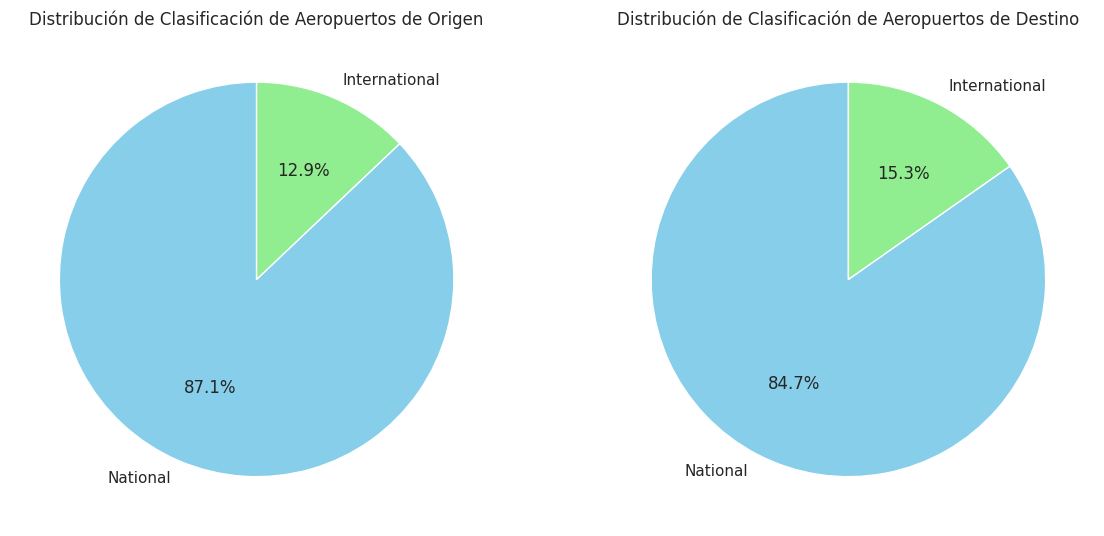

In [ ]:
# Obtener los datos de clasificación de aeropuertos de origen y destino
origin_counts = df_balanced['airport_classification_origin'].value_counts()
destin_counts = df_balanced['airport_classification_destin'].value_counts()

# Crear gráficos de torta juntos
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Gráfico de torta para aeropuertos de origen
axs[0].pie(origin_counts, labels=origin_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'salmon', 'orange'])
axs[0].set_title('Distribución de Clasificación de Aeropuertos de Origen')

# Gráfico de torta para aeropuertos de destino
axs[1].pie(destin_counts, labels=destin_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'salmon', 'orange'])
axs[1].set_title('Distribución de Clasificación de Aeropuertos de Destino')

plt.show()

### Continentes (continent_origin y continent_destin)



In [ ]:

print(f"{df_balanced['continent_origin'].value_counts()}")
print(f"________________________")
print(f"{df_balanced['continent_destin'].value_counts()}")

continent_origin
North America    15608
Europe             933
Asia               330
South America      161
Oceania            114
Africa               4
Name: count, dtype: int64
________________________
continent_destin
North America    15496
Europe             823
Asia               452
South America      232
Oceania            117
Africa              30
Name: count, dtype: int64


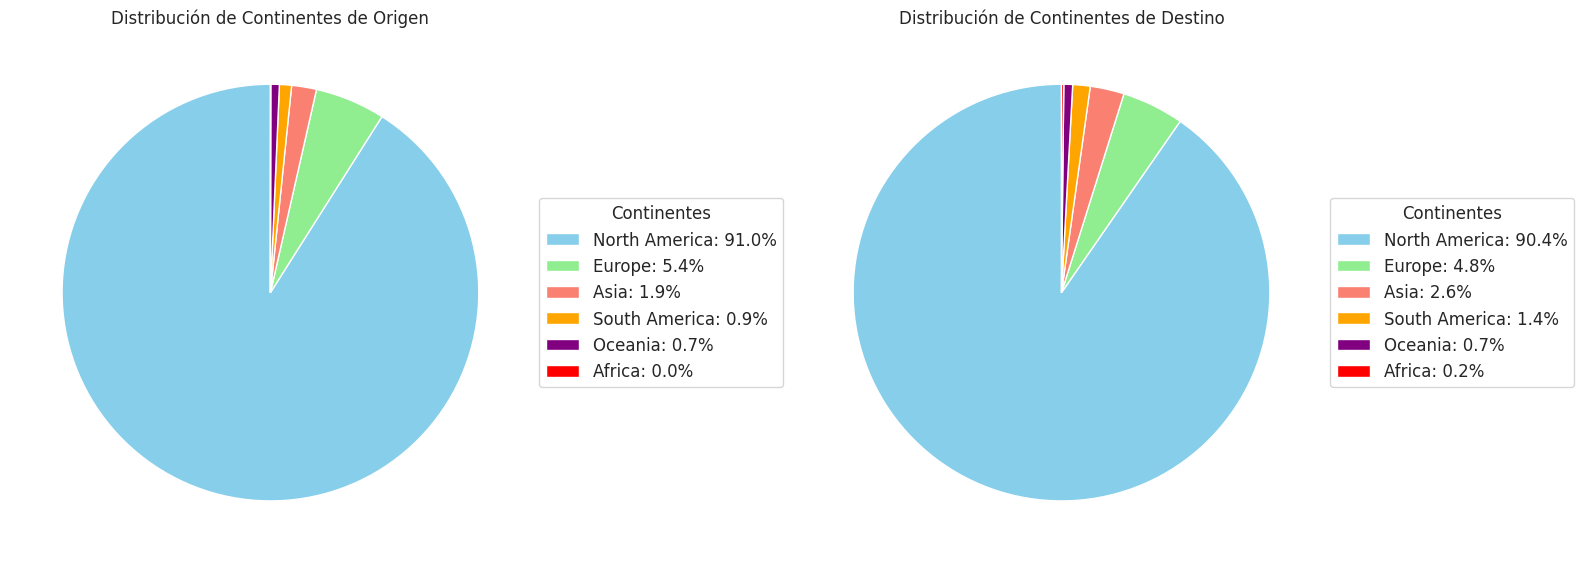

In [ ]:
# Obtener los datos de continentes de origen y destino
continent_origin_counts = df_balanced['continent_origin'].value_counts()
continent_destin_counts = df_balanced['continent_destin'].value_counts()

# Definir los colores
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'purple', 'red', 'darkblue']

# Calcular porcentajes para origen y destino
origin_percentages = [f"{label}: {count / continent_origin_counts.sum() * 100:.1f}%"
                      for label, count in zip(continent_origin_counts.index, continent_origin_counts)]
destin_percentages = [f"{label}: {count / continent_destin_counts.sum() * 100:.1f}%"
                      for label, count in zip(continent_destin_counts.index, continent_destin_counts)]

# Crear gráficos de torta juntos
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico de torta para continentes de origen
axs[0].pie(continent_origin_counts, labels=None, startangle=90, colors=colors,
           wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
axs[0].set_title('Distribución de Continentes de Origen')
axs[0].legend(origin_percentages, title="Continentes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)

# Gráfico de torta para continentes de destino
axs[1].pie(continent_destin_counts, labels=None, startangle=90, colors=colors,
           wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
axs[1].set_title('Distribución de Continentes de Destino')
axs[1].legend(destin_percentages, title="Continentes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()
plt.show()


### 'country_destin'

In [ ]:
df_balanced['country_destin'].value_counts()

country_destin
United States               14533
United Kingdom                377
Canada                        365
Mexico                        198
Japan                         172
                            ...  
Guadeloupe                      1
Finland                         1
Turks and Caicos Islands        1
Curaçao                         1
Bermuda                         1
Name: count, Length: 82, dtype: int64

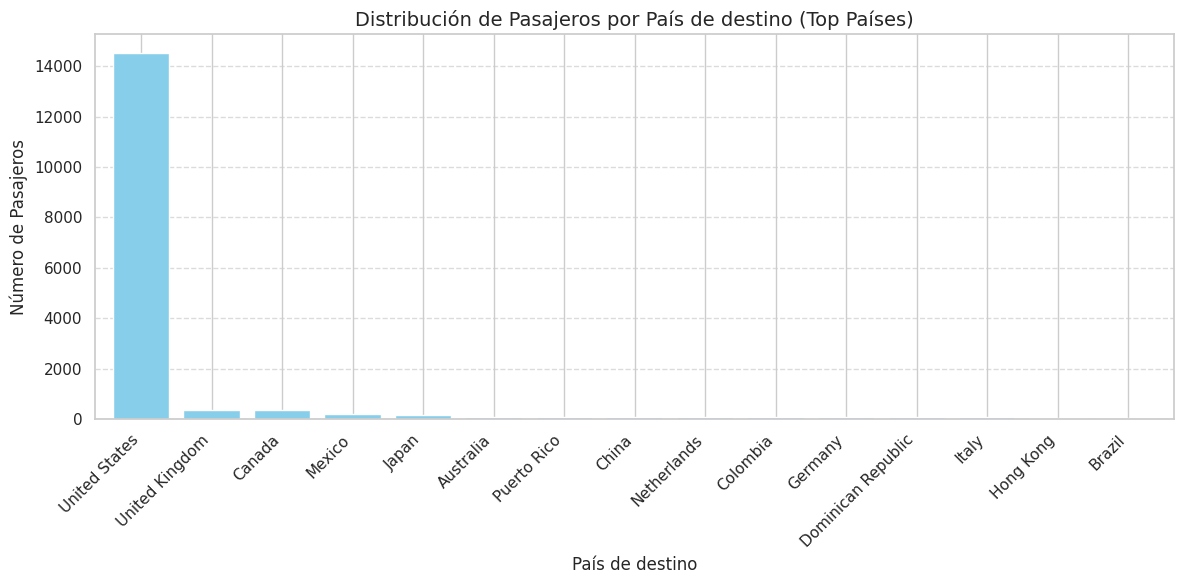

In [ ]:
import matplotlib.pyplot as plt

# Filtrar los países con más de un cierto número de pasajeros (por ejemplo, 50)
df_country_origin = df_balanced['country_destin'].value_counts()
top_countries = df_country_origin[df_country_origin > 50]

# Gráfico de barras para los países de origen
plt.figure(figsize=(12, 6))  # Tamaño más grande para mejorar la visibilidad
top_countries.plot(kind='bar', color='skyblue', width=0.8)  # Ajuste de ancho de barras para mejor separación
plt.xlabel('País de destino', fontsize=12)
plt.ylabel('Número de Pasajeros', fontsize=12)
plt.title('Distribución de Pasajeros por País de destino (Top Países)', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas para evitar solapamientos y mejorar la legibilidad
plt.tight_layout()  # Ajustar para evitar que las etiquetas se corten
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir una grilla ligera para mayor claridad
plt.show()

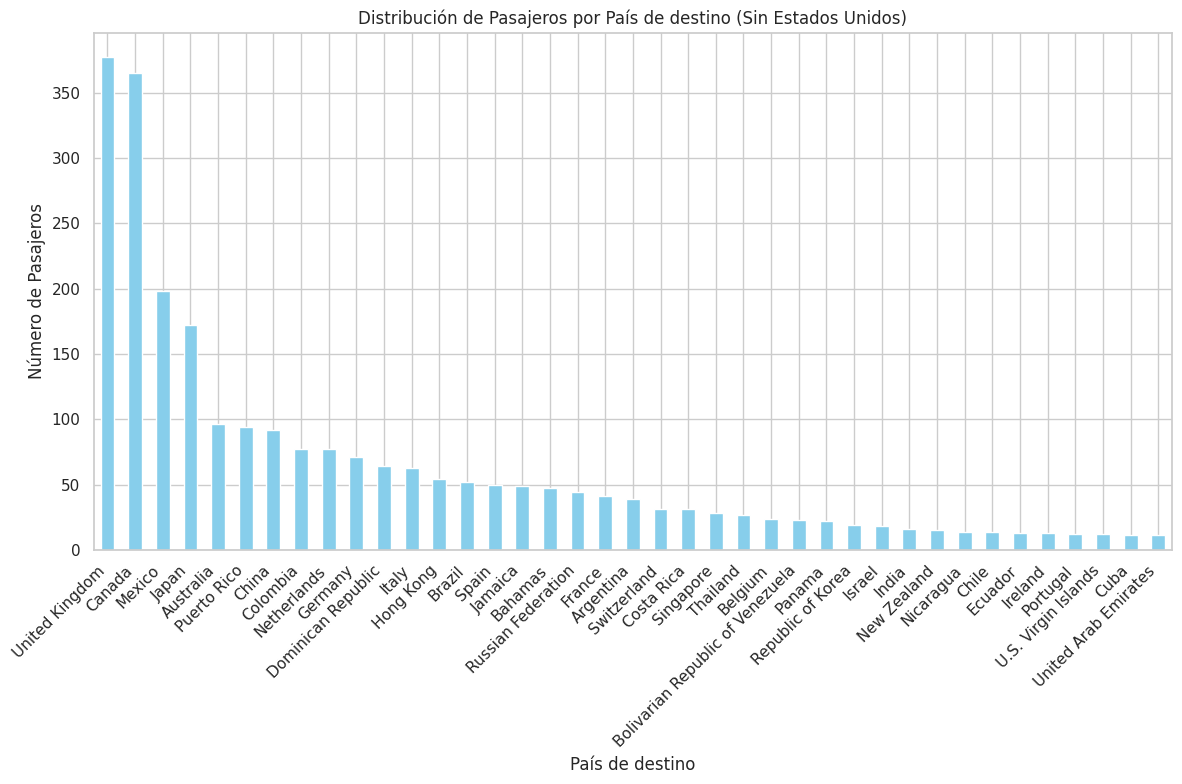

In [ ]:
# Filtrar los países con un número significativo de pasajeros (por ejemplo, > 10)
df_country_origin_no_us = df_balanced[df_balanced['country_destin'] != 'United States']

df_country_origin_no_us = df_country_origin_no_us['country_destin'].value_counts()
top_countries = df_country_origin_no_us[df_country_origin_no_us > 10]

# Gráfico de barras para los países de origen sin Estados Unidos
plt.figure(figsize=(12, 8))
top_countries.plot(kind='bar', color='skyblue')
plt.xlabel('País de destino')
plt.ylabel('Número de Pasajeros')
plt.title('Distribución de Pasajeros por País de destino (Sin Estados Unidos)')
plt.xticks(rotation=45, ha='right')  # Rotación de 45 grados y alineación a la derecha
plt.tight_layout()  # Ajusta el espaciado para que las etiquetas no se corten
plt.show()

Los países más frecuentes en ambos gráficos incluyen Reino Unido, Canadá, México y Japón. Esto sugiere que, fuera de Estados Unidos, los destinos y orígenes de pasajeros están concentrados en países cercanos o con fuertes vínculos comerciales y turísticos con Estados Unidos.

Canadá y México, por su proximidad geográfica, muestran altas frecuencias, lo cual es lógico debido a los numerosos vuelos transfronterizos entre estos países.

Destinos como Bahamas, República Dominicana y Jamaica, que son conocidos por su turismo, están presentes en ambos gráficos, lo cual sugiere una demanda significativa de vuelos entre Estados Unidos y destinos de ocio.

### 'municipality_destin'

In [ ]:
print(f"En el dataset, hay un total de {df_balanced['municipality_destin'].nunique()} ciudades \nde destino unicas de donde provienen los pasajeros.")

En el dataset, hay un total de 404 ciudades 
de destino unicas de donde provienen los pasajeros.


In [ ]:
df_balanced[['municipality_destin', "country_destin"]].value_counts().head(20)


municipality_destin  country_destin
New York             United States     944
Los Angeles          United States     921
Las Vegas            United States     874
Chicago              United States     682
Denver               United States     627
Orlando              United States     617
San Francisco        United States     535
Seattle              United States     475
Fort Lauderdale      United States     457
Atlanta              United States     443
Newark               United States     441
Boston               United States     399
Houston              United States     359
DallasFort Worth     United States     348
Miami                United States     317
London               United Kingdom    304
Washington           United States     292
Detroit              United States     267
Tampa                United States     260
Philadelphia         United States     249
Name: count, dtype: int64

Los datos de las ciudades de destino muestran una alta similitud con las ciudades de origen, destacando principalmente grandes centros urbanos de Estados Unidos como Los Ángeles, Nueva York, Las Vegas y Chicago. Esto sugiere que los vuelos en el dataset están concentrados en rutas populares que conectan los principales "hubs" nacionales.

También es notable la presencia de Londres, la única ciudad fuera de Estados Unidos que aparece con alta frecuencia como destino. Esto refleja la importancia de esta ruta internacional, probablemente debido a los fuertes vínculos comerciales y turísticos entre Estados Unidos y el Reino Unido.

En general, el patrón de destinos es coherente con el modelo de operación de las aerolíneas, donde los "hubs" y las rutas principales están focalizados en las ciudades más grandes y con mayor demanda tanto a nivel nacional como internacional.

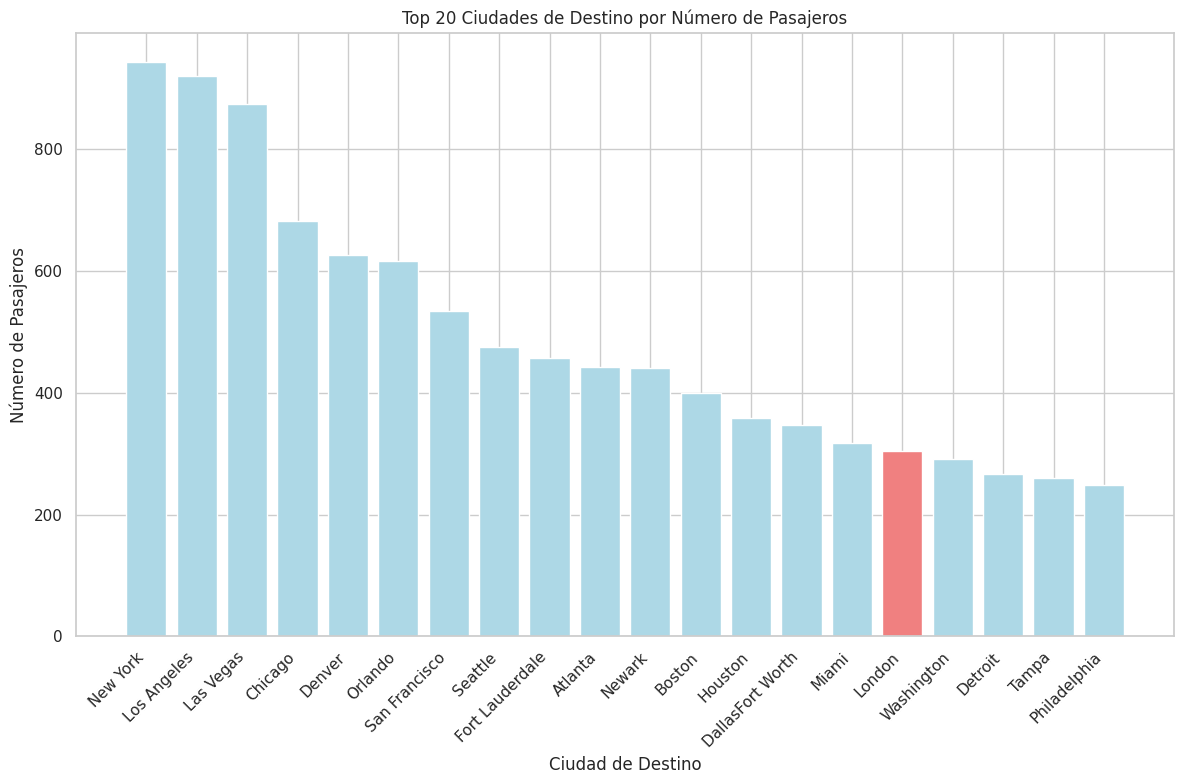

In [ ]:
import matplotlib.pyplot as plt

# Obtener los 20 municipios más frecuentes junto con el país de origen
top_20_municipalities = df_balanced[['municipality_destin', 'country_destin']].value_counts().head(20).reset_index()
top_20_municipalities.columns = ['municipality_destin', 'country_destin', 'count']

# Asignar colores: rojo para los municipios de United Kingdom, azul para los demás
colors = ['lightcoral' if country == 'United Kingdom' else 'lightblue' for country in top_20_municipalities['country_destin']]

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(top_20_municipalities['municipality_destin'], top_20_municipalities['count'], color=colors)
plt.xlabel('Ciudad de Destino')
plt.ylabel('Número de Pasajeros')
plt.title('Top 20 Ciudades de Destino por Número de Pasajeros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

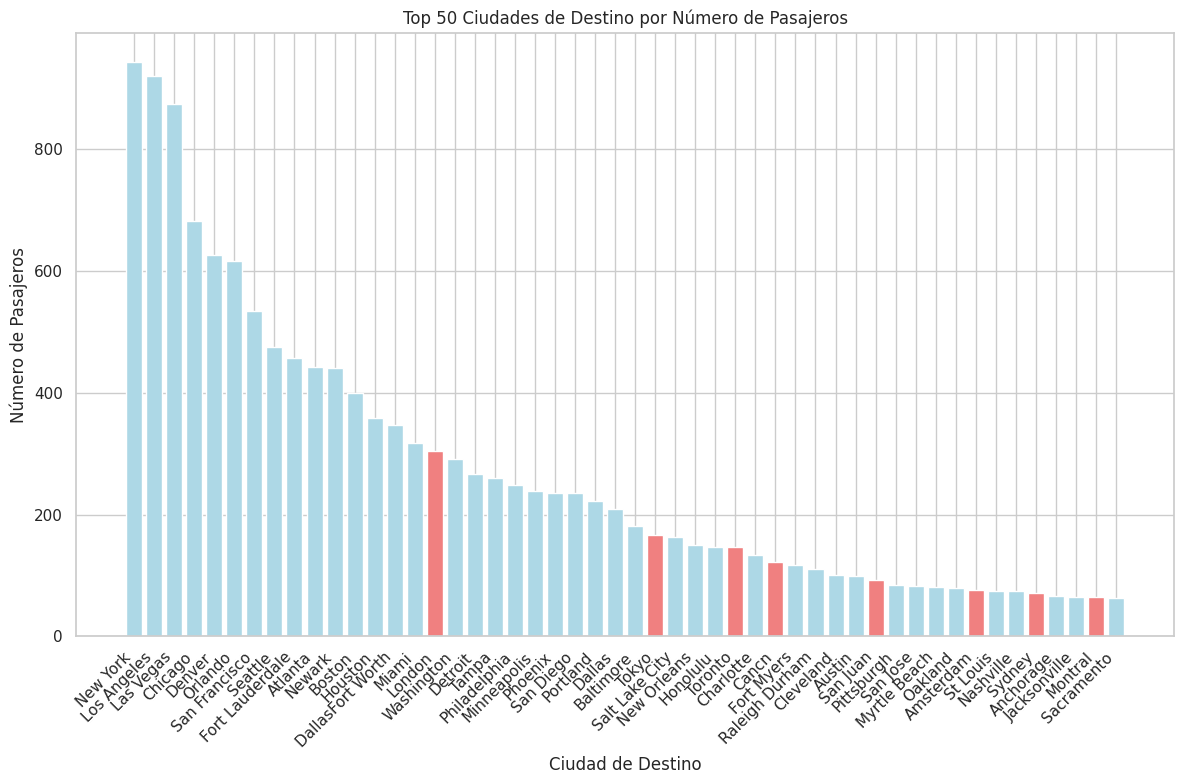

In [ ]:
# Obtener los 20 municipios más frecuentes junto con el país de origen
top_20_municipalities = df_balanced[['municipality_destin', 'country_destin']].value_counts().head(50).reset_index()
top_20_municipalities.columns = ['municipality_destin', 'country_destin', 'count']

# Asignar colores: rojo para los municipios de United Kingdom, azul para los demás
colors = ['lightblue' if country == 'United States' else 'lightcoral' for country in top_20_municipalities['country_destin']]

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(top_20_municipalities['municipality_destin'], top_20_municipalities['count'], color=colors)
plt.xlabel('Ciudad de Destino')
plt.ylabel('Número de Pasajeros')
plt.title('Top 50 Ciudades de Destino por Número de Pasajeros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 'coordinates_destin',

In [ ]:
# Filtrar solo las ciudades de Estados Unidos
us_municipalities = df_balanced[df_balanced['country_destin'] == 'United States']

# Contar la frecuencia de cada municipio
municipality_counts = us_municipalities['municipality_destin'].value_counts().reset_index()
municipality_counts.columns = ['municipality_destin', 'count']

# Unir el conteo con el DataFrame original para obtener las coordenadas
us_municipalities_with_coords = municipality_counts.merge(
    us_municipalities[['municipality_destin', 'coordinates_destin']].drop_duplicates(),
    on='municipality_destin', how='left'
)

# Separar las coordenadas en latitud y longitud
us_municipalities_with_coords[['latitude', 'longitude']] = us_municipalities_with_coords['coordinates_destin'].apply(
    lambda x: pd.Series(eval(x)) if pd.notnull(x) else pd.Series([None, None]))

In [ ]:
import plotly.express as px

# Filtrar las ciudades con coordenadas válidas
us_municipalities_with_coords = us_municipalities_with_coords.dropna(subset=['latitude', 'longitude'])

# Crear el mapa con círculos de tamaño variable según la frecuencia
fig = px.scatter_mapbox(us_municipalities_with_coords, lat="latitude", lon="longitude",
                        size="count", color_discrete_sequence=["lightblue"],
                        size_max=50, zoom=3,
                        hover_name="municipality_destin",
                        hover_data={"count": True, "latitude": False, "longitude": False})

# Configurar el estilo del mapa
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_center={"lat": 37.0902, "lon": -95.7129}, # Centro de EE.UU.
                  title="Ciudades de Destino en Estados Unidos por Número de Pasajeros")

fig.show()

In [ ]:
# Contar la frecuencia de cada municipio
municipality_countss = df_balanced['municipality_destin'].value_counts().reset_index()
municipality_countss.columns = ['municipality_destin', 'count']

# Unir el conteo con el DataFrame original para obtener las coordenadas
municipalities_with_coords = municipality_countss.merge(
   df_balanced[['municipality_destin', 'coordinates_destin']].drop_duplicates(),
    on='municipality_destin', how='left'
)

# Separar las coordenadas en latitud y longitud
municipalities_with_coords[['latitude', 'longitude']] = municipalities_with_coords['coordinates_destin'].apply(
    lambda x: pd.Series(eval(x)) if pd.notnull(x) else pd.Series([None, None])
)

In [ ]:
import plotly.express as px

# Filtrar las ciudades con coordenadas válidas
municipalities_with_coords = municipalities_with_coords.dropna(subset=['latitude', 'longitude'])

# Crear el mapa con círculos de tamaño variable según la frecuencia
fig = px.scatter_mapbox(municipalities_with_coords, lat="latitude", lon="longitude",
                        size="count", color_discrete_sequence=["lightblue"],
                        size_max=50, zoom=1,  # Cambiar el zoom para ver el mundo
                        hover_name="municipality_destin",
                        hover_data={"count": True, "latitude": False, "longitude": False})

# Configurar el estilo del mapa y centrar en el mundo
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_center={"lat": 0, "lon": 0},  # Centrar el mapa en el mundo
                  title="Ciudades de Destin por Número de Pasajeros")

fig.show()

### Sección nueva

In [ ]:
outliers[["municipality_origin","country_origin", "municipality_destin","country_destin", "route_distance"]]

municipality_origin  country_origin municipality_destin  \
12                Chicago   United States              Sydney   
19            Los Angeles   United States            Shanghai   
28                Chicago   United States             Beijing   
29               Shanghai           China             Chicago   
34                  Paris          France        Palm Springs   
...                   ...             ...                 ...   
17116          Birmingham  United Kingdom           Las Vegas   
17120       San Francisco   United States           Sao Paulo   
17121              Dublin         Ireland          KailuaKona   
17138              London  United Kingdom       Santo Domingo   
17139             Chicago   United States               Tokyo   

                         country_destin  route_distance  
12                            Australia    14857.399031  
19                                China    10463.841641  
28                                China    10587.677271  
29                        United States    11357.142431  
34                        United States     9032.949154  
...                                 ...             ...  
17116                     United States     8277.926790  
17120                            Brazil    10415.213502  
17121                     United States    11396.343063  
17138  Bolivarian Republic of Venezuela     8079.731415  
17139                             Japan    10097.132840  

[1540 rows x 5 columns]

Paso 2: exploracion a la variable con texto


Comienza con un análisis de la longitud de las reviews. Puedes calcular la cantidad de palabras o caracteres en cada review para ver si existe alguna relación entre la longitud del texto y el sentiment o la variable recommended

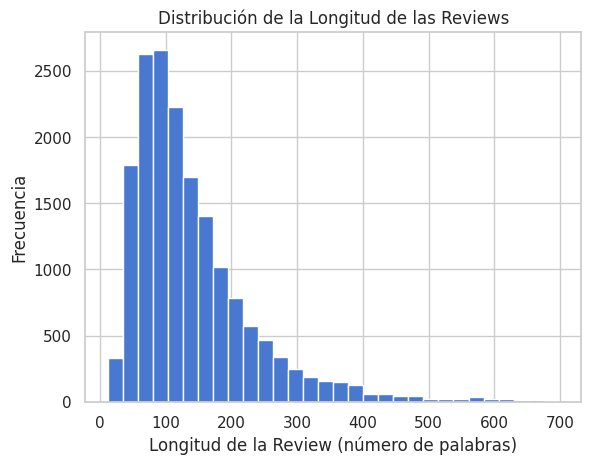

In [ ]:
df_balanced['review_length'] = df_balanced['customer_review'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
df_balanced['review_length'].hist(bins=30)
plt.xlabel('Longitud de la Review (número de palabras)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Longitud de las Reviews')
plt.show()

Frecuencia de Palabras:
Observa las palabras más frecuentes en las reviews para ver los temas comunes. Usa una nube de palabras o un gráfico de barras con las palabras más comunes.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Definir el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Ajustar el vectorizador y transformar la columna 'customer_review'
tfidf_matrix = tfidf_vectorizer.fit_transform(df_balanced['customer_review'].astype(str))

# Revisar las palabras con los valores más altos de TF-IDF para una review específica (ejemplo: la primera review)
review_index = 0  # Cambia el índice para ver diferentes reviews
top_n = 50  # Número de palabras más importantes a mostrar

# Obtener los valores de TF-IDF para la review
review_tfidf_values = tfidf_matrix[review_index].toarray().flatten()

# Combinar las palabras y sus valores de TF-IDF
tfidf_words = [(word, review_tfidf_values[idx]) for idx, word in enumerate(tfidf_vectorizer.get_feature_names_out())]
tfidf_words = sorted(tfidf_words, key=lambda x: x[1], reverse=True)[:top_n]

# Mostrar las palabras más importantes con sus valores de TF-IDF
for word, score in tfidf_words:
    print(f"{word}: {score}")


fort: 0.37310023219815147
lauderdale: 0.3490056333670021
told: 0.3403066377947379
departure: 0.21891569393380705
11am: 0.21636822750991858
costa: 0.1942078702073109
rica: 0.1942078702073109
10pm: 0.19007575064135696
shuttle: 0.17878477244473132
manager: 0.16582671004082364
live: 0.16283490890994626
30pm: 0.1618540921160243
talk: 0.15078339703978427
complain: 0.14993550227446126
showed: 0.14634838830891655
phoenix: 0.13723253786737363
prior: 0.13534119615069526
number: 0.13276188648076503
come: 0.12859248053371655
leave: 0.11881556751904704
came: 0.11585066727551983
problem: 0.11204518401470805
room: 0.10614576345624938
connecting: 0.10499176985353159
don: 0.09943465592343535
worst: 0.09895018149848964
left: 0.09884736928640372
went: 0.09768952702794394
said: 0.09449032718540547
day: 0.09001222137554024
spirit: 0.08914394656206451
customer: 0.08036830957347715
check: 0.07922162148931122
airport: 0.07885769172424358
hours: 0.07423628793824781
fly: 0.06804910922903365
service: 0.059575268

In [ ]:
pip install matplotlib wordcloud

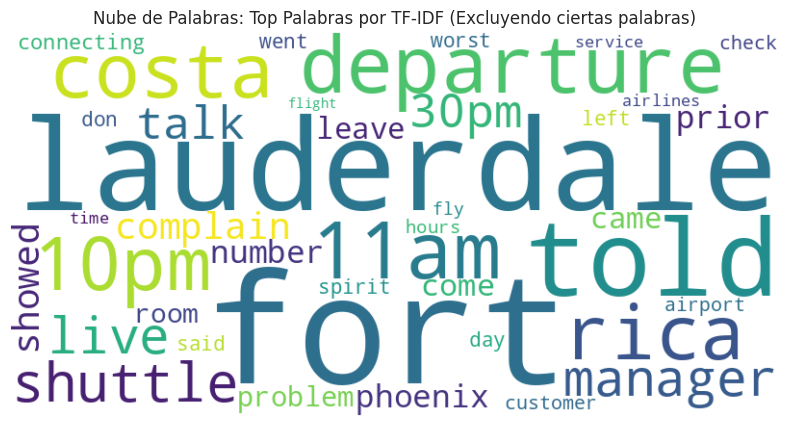

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Crear un diccionario con las palabras y sus puntajes de TF-IDF, excluyendo las palabras no deseadas
excluded_words = {"zealand", "indianapolis", "francisco"}
tfidf_dict_filtered = {word: score for word, score in tfidf_words if word.lower() not in excluded_words}

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_dict_filtered)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras: Top Palabras por TF-IDF (Excluyendo ciertas palabras)")
plt.show()



In [ ]:
df_balanced['airline'].unique()

array(['Spirit Airlines', 'American Airlines', 'Delta Air Lines',
       'United Airlines', 'Frontier Airlines', 'Virgin America',
       'Jetblue Airways', 'Alaska Airlines', 'Southwest Airlines'],
      dtype=object)

In [ ]:
aerolineas_no_low_cost = ['United Airlines', 'American Airlines', 'Delta Air Lines', 'Alaska Airlines']
aerolineas_low_cost = ['Southwest Airlines', 'Spirit Airlines', 'Frontier Airlines', 'Jetblue Airways', 'Virgin America']
orden_aerolineas = aerolineas_no_low_cost + aerolineas_low_cost


Las aerolíneas incluidas en la base de datos son todas de Estados Unidos, dado que el análisis principal se enfoca en United y su competencia. La competencia se divide en dos categorías: directa e indirecta.
Al ser United una aerolínea no low-cost, su competencia directa son otras aerolíneas no low-cost, como American Airlines, Delta Air Lines y Alaska Airlines. Sin embargo, también es necesario considerar a las aerolíneas low-cost, ya que se podría estar perdiendo cuota de mercado frente a ellas. Por lo tanto, es importante analizar en qué aspectos destacan estas aerolíneas y cómo se puede obtener ventaja mediante un análisis detallado.

In [ ]:
 # Definir columnas de calificaciones
rating_columns = ['overall', 'seat_comfort', 'cabin_service', 'ground_service', 'value_for_money']

# Calcular medianas de calificaciones por aerolínea
median_ratings = df_balanced.groupby('airline')[rating_columns].median().reset_index()

# Calcular moda de 'food_bev' por aerolínea
food_bev_mode = df_balanced.groupby('airline')['food_bev'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).reset_index()

# Combinar medianas y modas
airline_ratings = pd.merge(median_ratings, food_bev_mode, on='airline')

# Mostrar el DataFrame resultante
airline_ratings

airline  overall  seat_comfort  cabin_service  ground_service  \
0     Alaska Airlines      9.0           4.0            5.0             4.0   
1   American Airlines      2.0           3.0            2.0             1.0   
2     Delta Air Lines      8.0           4.0            4.0             3.0   
3   Frontier Airlines      1.0           2.0            1.0             1.0   
4     Jetblue Airways      9.0           4.0            4.0             2.0   
5  Southwest Airlines      8.0           4.0            4.0             2.0   
6     Spirit Airlines      1.0           2.0            1.0             1.0   
7     United Airlines      3.0           3.0            3.0             2.0   
8      Virgin America      9.0           4.0            4.0             3.0   

   value_for_money  food_bev  
0              4.0       5.0  
1              2.0       1.0  
2              4.0       4.0  
3              1.0       0.0  
4              4.0       5.0  
5              4.0       4.0  
6              1.0       0.0  
7              3.0       1.0  
8              4.0       4.0

<ipython-input-287-cb751de74cf7>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




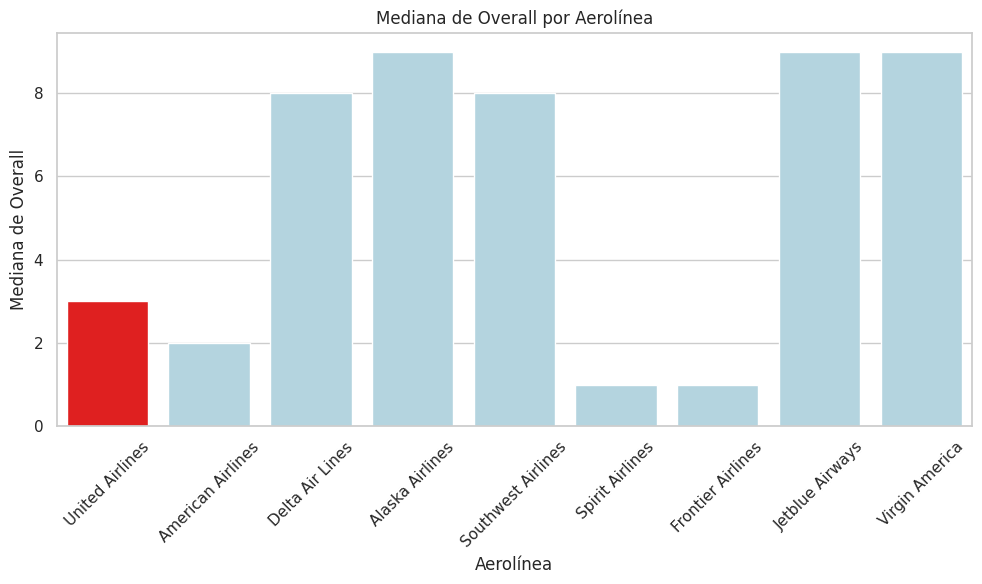

<ipython-input-287-cb751de74cf7>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




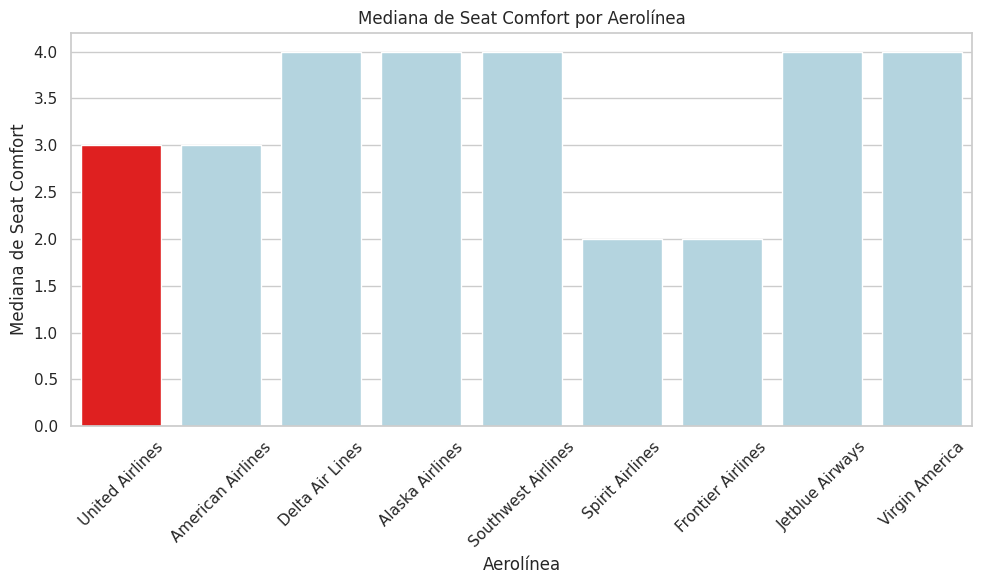

<ipython-input-287-cb751de74cf7>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




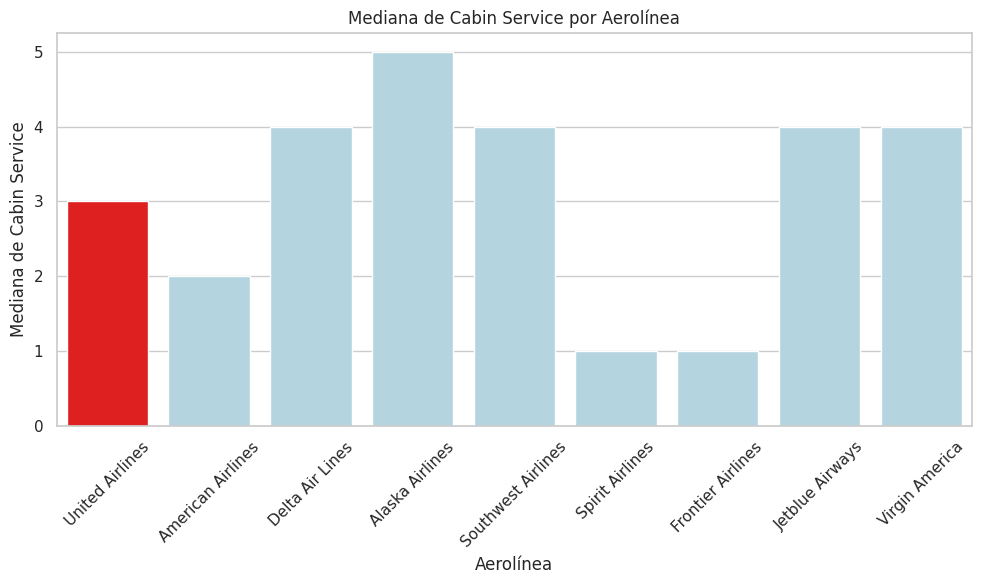

<ipython-input-287-cb751de74cf7>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




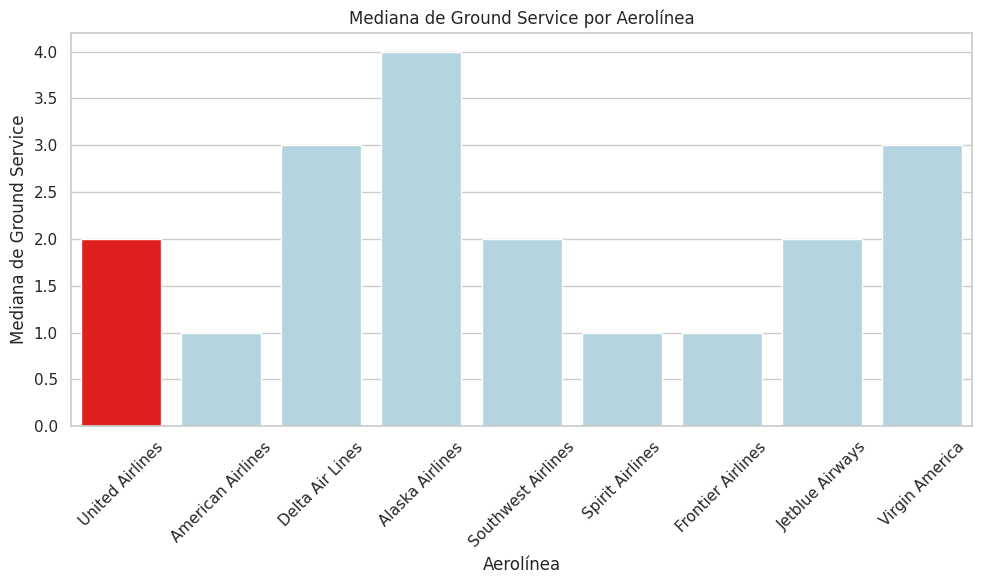

<ipython-input-287-cb751de74cf7>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




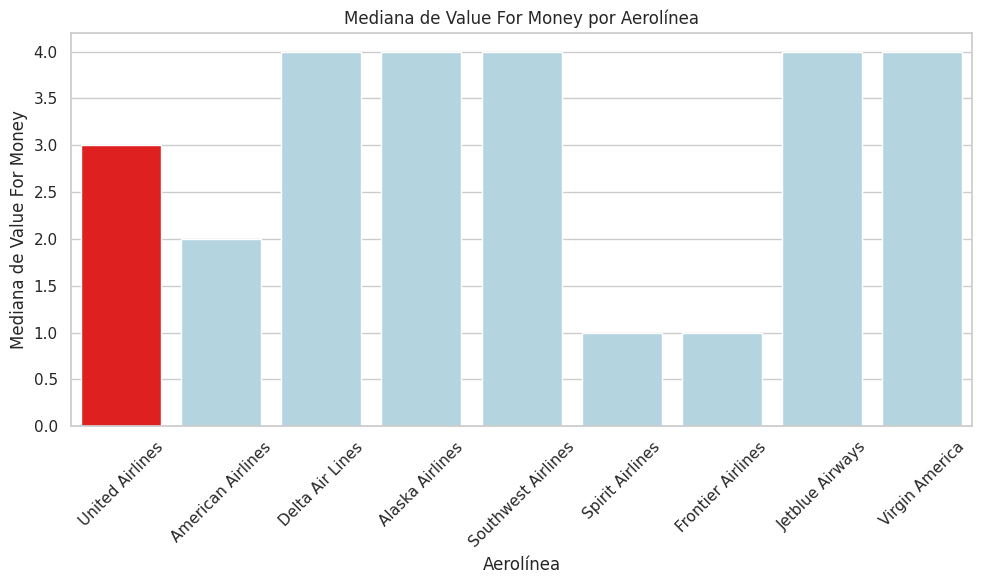

In [ ]:
# Lista de aerolíneas ordenadas
orden_aerolineas = aerolineas_no_low_cost + aerolineas_low_cost

import seaborn as sns
import matplotlib.pyplot as plt

# Define un color específico para United Airlines
highlight_color = 'red'  # Color para United Airlines
default_color = 'lightblue'  # Color para las demás aerolíneas

# Crear una lista de colores: resalta United, el resto en color claro
palette = [highlight_color if airline == 'United Airlines' else default_color for airline in orden_aerolineas]

# Graficar medianas de calificaciones
for category in rating_columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x='airline', y=category, data=airline_ratings,
        order=orden_aerolineas, palette=palette
    )
    plt.title(f'Mediana de {category.replace("_", " ").title()} por Aerolínea')
    plt.xlabel('Aerolínea')
    plt.ylabel(f'Mediana de {category.replace("_", " ").title()}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


A partir de estos gráficos, se decidió enfocar el informe principalmente en tres aspectos clave:

Calificación General (Overall): Este indicador es el más completo, ya que resume la experiencia total del pasajero. Las aerolíneas con mejor desempeño(tomando la mediana) fueron Alaska Airlines, JetBlue Airways y Virgin America, mientras que United y American Airlines mostraron resultados significativamente más bajos

Confort de Asientos (Seat Comfort): Se observó que el confort de asientos es una de las variables que más influye en la experiencia del pasajero. Alaska, Delta y Virgin America lideran en esta categoría, lo que indica que invertir en mejores asientos podría ser una estrategia efectiva para aumentar la satisfacción.

Relación Calidad-Precio (Value For Money): Este es un factor determinante para los pasajeros, especialmente en aerolíneas low-cost. Se destaca nuevamente Alaska Airlines junto con Southwest Airlines y Virgin America, mostrando que no solo ofrecen un buen servicio, sino que los pasajeros perciben valor en su compra.

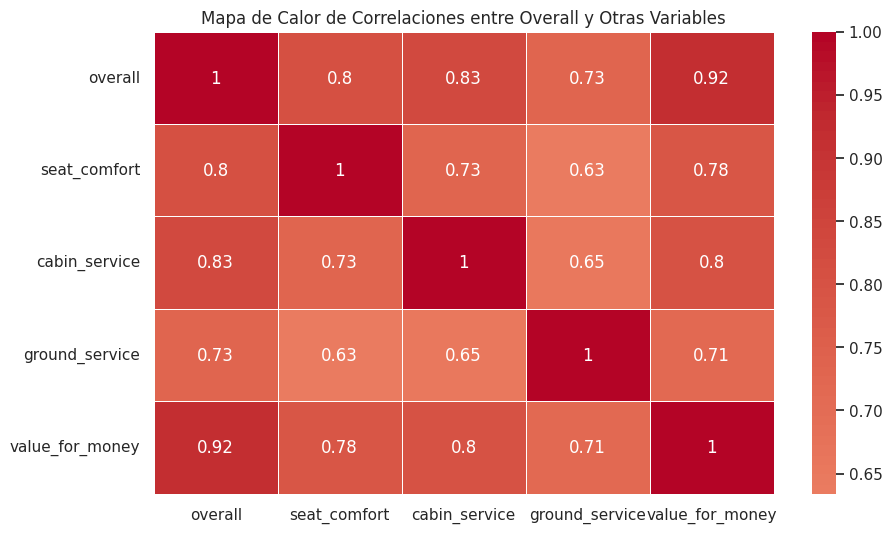

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Selecciona las columnas que quieres analizar
columns_of_interest = [
    "overall",
    "seat_comfort",
    "cabin_service",
    "ground_service",
    "value_for_money",
]

# Filtra tu DataFrame para incluir solo estas columnas
df_corr = df_balanced[columns_of_interest]

# Calcula la matriz de correlación
correlation_matrix = df_corr.corr()

# Crear un mapa de calor para visualizar las correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones entre Overall y Otras Variables")
plt.show()

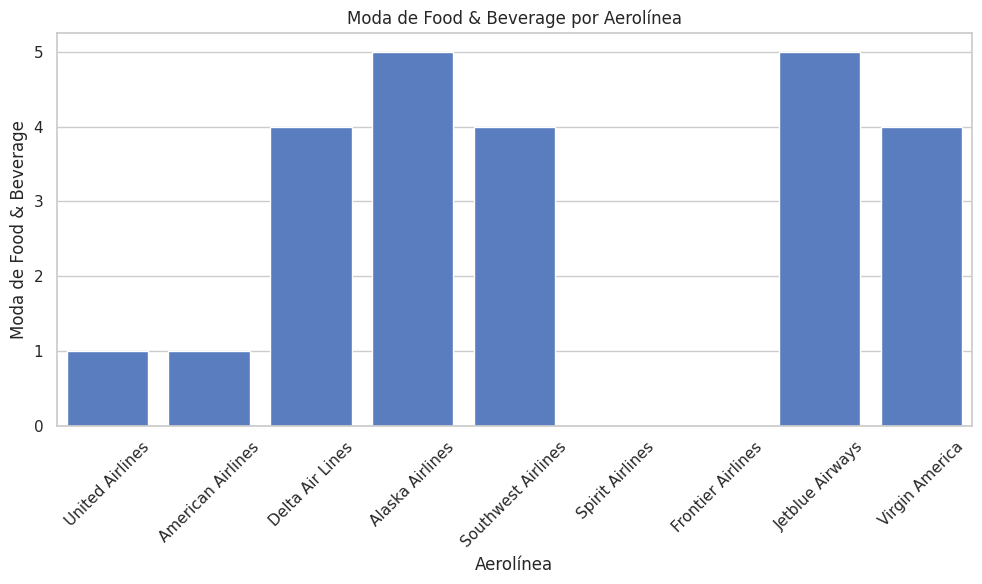

In [ ]:
# Verificar si 'food_bev' es numérica
if pd.api.types.is_numeric_dtype(df_balanced['food_bev']):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='airline', y='food_bev', data=airline_ratings, order=orden_aerolineas)
    plt.title('Moda de Food & Beverage por Aerolínea')
    plt.xlabel('Aerolínea')
    plt.ylabel('Moda de Food & Beverage')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    # Si es categórica, mostrar conteo de modas
    print(airline_ratings[['airline', 'food_bev']])

graficos de correlaciones

Análisis de Recomendaciones

In [ ]:
# Calcular porcentaje de recomendaciones por aerolínea
recommendations = df_balanced.groupby('airline')['recommended'].mean().reset_index()
recommendations['recommended']
recommendations.round(3)

airline  recommended
0     Alaska Airlines        0.733
1   American Airlines        0.412
2     Delta Air Lines        0.672
3   Frontier Airlines        0.297
4     Jetblue Airways        0.664
5  Southwest Airlines        0.693
6     Spirit Airlines        0.394
7     United Airlines        0.458
8      Virgin America        0.771

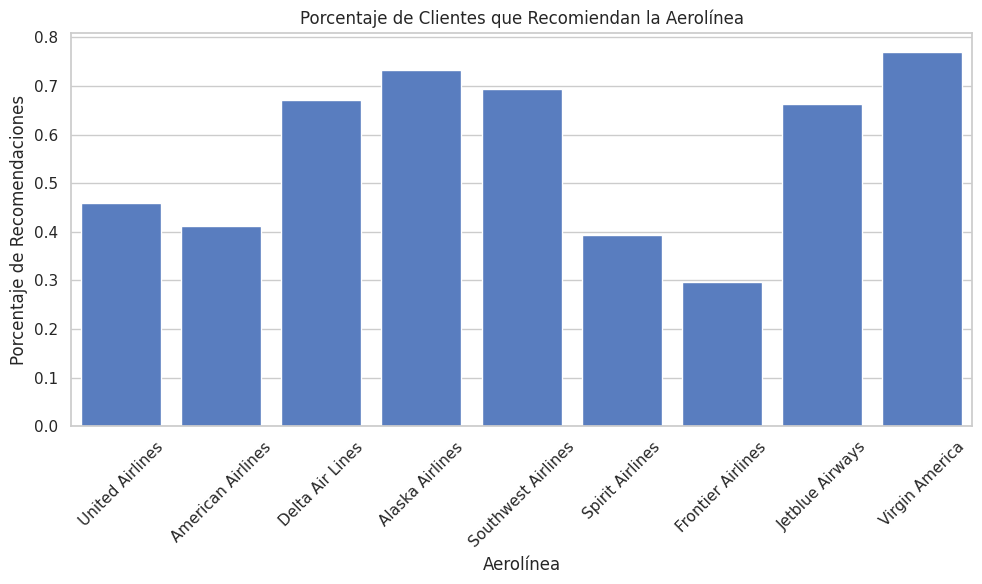

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='airline', y='recommended', data=recommendations, order=orden_aerolineas)
plt.title('Porcentaje de Clientes que Recomiendan la Aerolínea')
plt.xlabel('Aerolínea')
plt.ylabel('Porcentaje de Recomendaciones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5. Análisis de Sentimiento en Reseñas

a. Realizar análisis de sentimiento

In [ ]:
# Instalar NLTK si es necesario
# !pip install nltk

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

# Inicializar el analizador
sia = SentimentIntensityAnalyzer()

# Aplicar el análisis de sentimiento
df_balanced['sentiment'] = df_balanced['customer_review'].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df_balanced["sentiment"]

0       -0.8059
1        0.2120
2        0.5859
3       -0.8781
4       -0.6239
          ...  
17145    0.9893
17146    0.9465
17147    0.9596
17148    0.9538
17149    0.9876
Name: sentiment, Length: 17150, dtype: float64

In [ ]:
sentiment_scores = df_balanced.groupby('airline')['sentiment'].mean().reset_index()

# Mostrar resultados
sentiment_scores.round(3)

airline  sentiment
0     Alaska Airlines      0.447
1   American Airlines      0.061
2     Delta Air Lines      0.367
3   Frontier Airlines     -0.143
4     Jetblue Airways      0.372
5  Southwest Airlines      0.306
6     Spirit Airlines      0.042
7     United Airlines      0.260
8      Virgin America      0.592

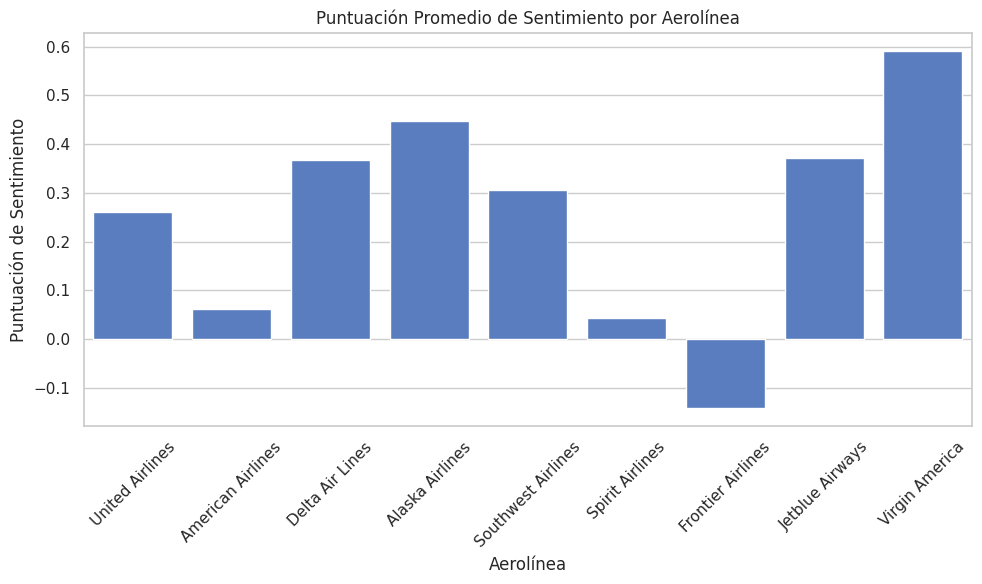

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='airline', y='sentiment', data=sentiment_scores, order=orden_aerolineas)
plt.title('Puntuación Promedio de Sentimiento por Aerolínea')
plt.xlabel('Aerolínea')
plt.ylabel('Puntuación de Sentimiento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



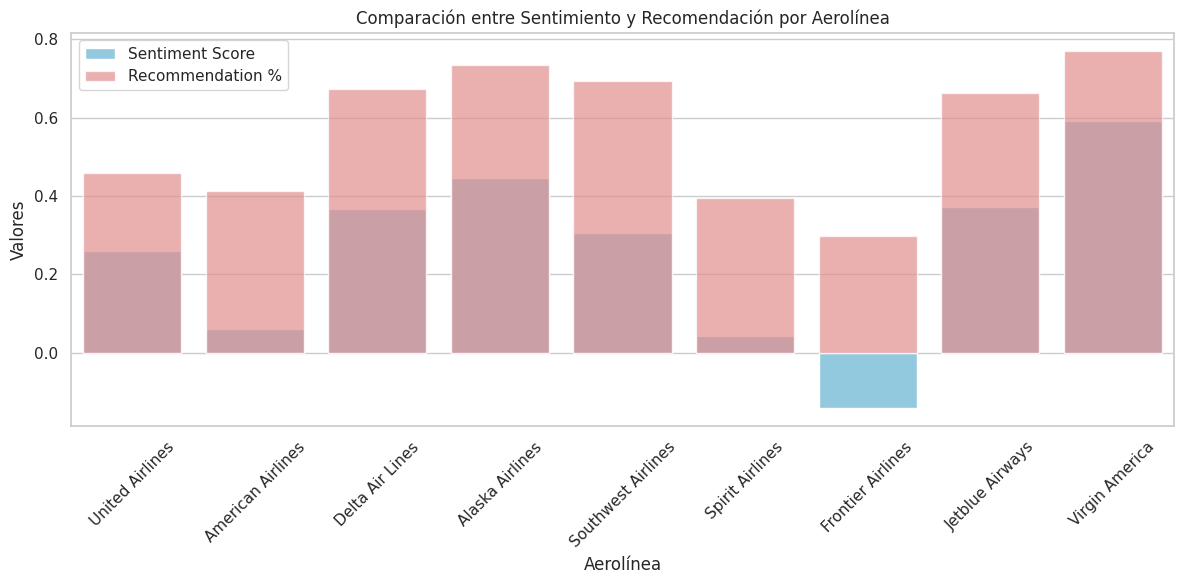

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear un DataFrame combinado para análisis conjunto
combined_df = pd.merge(sentiment_scores, recommendations, on='airline')

# Ordenar por el orden personalizado
combined_df['airline'] = pd.Categorical(combined_df['airline'], categories=orden_aerolineas, ordered=True)
combined_df = combined_df.sort_values(by='airline')

# Gráfico combinado
plt.figure(figsize=(12, 6))
sns.barplot(x='airline', y='sentiment', data=combined_df, color='skyblue', label='Sentiment Score')
sns.barplot(x='airline', y='recommended', data=combined_df, color='lightcoral', alpha=0.7, label='Recommendation %')

plt.title('Comparación entre Sentimiento y Recomendación por Aerolínea')
plt.xlabel('Aerolínea')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Calcular la correlación entre sentimiento y recomendación
correlation = combined_df[['sentiment', 'recommended']].corr().iloc[0, 1]
print(f"Correlación entre sentimiento y recomendación: {correlation:.2f}")

Correlación entre sentimiento y recomendación: 0.95


6. Análisis de Tipos de Viajeros

a. Distribución de tipos de viajeros por aerolínea

In [ ]:
traveller_types = df_balanced.groupby(['airline', 'traveller_type']).size().reset_index(name='counts')

In [ ]:
traveller_types

airline  traveller_type  counts
0      Alaska Airlines        Business      91
1      Alaska Airlines  Couple Leisure     104
2      Alaska Airlines  Family Leisure     139
3      Alaska Airlines    Solo Leisure     484
4    American Airlines        Business     670
5    American Airlines  Couple Leisure     701
6    American Airlines  Family Leisure     538
7    American Airlines    Solo Leisure    1497
8      Delta Air Lines        Business     375
9      Delta Air Lines  Couple Leisure     471
10     Delta Air Lines  Family Leisure     448
11     Delta Air Lines    Solo Leisure    1112
12   Frontier Airlines        Business     131
13   Frontier Airlines  Couple Leisure     390
14   Frontier Airlines  Family Leisure     440
15   Frontier Airlines    Solo Leisure     641
16     Jetblue Airways        Business      71
17     Jetblue Airways  Couple Leisure     169
18     Jetblue Airways  Family Leisure     224
19     Jetblue Airways    Solo Leisure     398
20  Southwest Airlines        Business     144
21  Southwest Airlines  Couple Leisure     222
22  Southwest Airlines  Family Leisure     263
23  Southwest Airlines    Solo Leisure     554
24     Spirit Airlines        Business     223
25     Spirit Airlines  Couple Leisure     747
26     Spirit Airlines  Family Leisure     881
27     Spirit Airlines    Solo Leisure    1191
28     United Airlines        Business     588
29     United Airlines  Couple Leisure     653
30     United Airlines  Family Leisure     574
31     United Airlines    Solo Leisure    1593
32      Virgin America        Business      31
33      Virgin America  Couple Leisure      26
34      Virgin America  Family Leisure      50
35      Virgin America    Solo Leisure     316

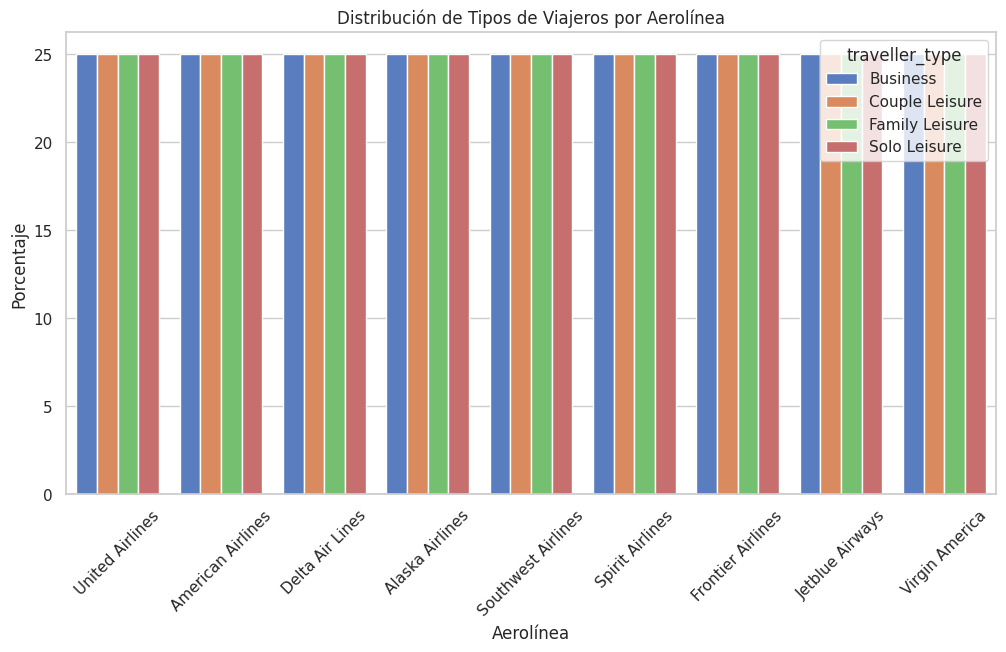

In [ ]:
# Calcular el porcentaje de tipos de viajeros por aerolínea
traveller_types['percentage'] = traveller_types.groupby(['airline', 'traveller_type'])['traveller_type'].transform('count') / traveller_types.groupby('airline')['traveller_type'].transform('count') * 100

import matplotlib.pyplot as plt
import seaborn as sns

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(x='airline', y='percentage', hue='traveller_type', data=traveller_types, order=orden_aerolineas)
plt.title('Distribución de Tipos de Viajeros por Aerolínea')
plt.xlabel('Aerolínea')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.show()



# Analisis exploratorio mas avanzado

In [ ]:
import nltk
from nltk.corpus import stopwords
import string

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:


# Descargar recursos de nltk si no están ya disponibles
nltk.download('stopwords')
nltk.download('punkt')

# Función para limpiar texto
def clean_text(text):
    if pd.isna(text):
        return ""
    stop_words = set(stopwords.words('english'))  # Cambiar a 'spanish' si el texto está en español
    text = text.lower()  # Convertir a minúsculas
    text = ''.join([char for char in text if char not in string.punctuation])  # Eliminar puntuación
    words = nltk.word_tokenize(text)  # Tokenizar palabras
    text = ' '.join([word for word in words if word not in stop_words])  # Eliminar stopwords
    return text

# Limpiar la columna de reseñas
df_balanced['clean_review'] = df_balanced['customer_review'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


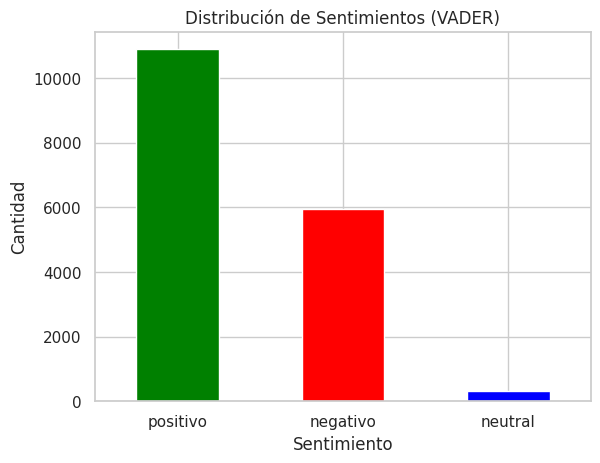

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Descargar el analizador VADER
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Función para análisis de sentimientos con VADER
def vader_sentiment(text):
    if pd.isna(text) or text == "":
        return 'neutral'
    scores = sia.polarity_scores(text)
    if scores['compound'] > 0.05:
        return 'positivo'
    elif scores['compound'] < -0.05:
        return 'negativo'
    else:
        return 'neutral'

# Aplicar análisis de sentimientos
df_balanced['sentiment'] = df_balanced['clean_review'].apply(vader_sentiment)

# Visualizar resultados
sentiment_counts = df_balanced['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', title='Distribución de Sentimientos (VADER)', color=['green', 'red', 'blue'], rot=0)
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad")
plt.show()

In [ ]:
pip install sentence-transformers

Paso 2: Código para Clustering de Temas

3. Visualización Interactiva de Resultados

Instalar Plotly para gráficos dinámicos

Combina sentimientos con temas



Podemos analizar cómo los sentimientos se distribuyen dentro de cada tema:




esultado Final:
Análisis Avanzado de Sentimientos: Utiliza BERT, un modelo de última generación.
Clustering Temático Moderno: Identifica temas clave mediante embeddings de texto.
Visualizaciones Profesionales: Gráficos interactivos que impresionan por su claridad y nivel técnico.
Insights Combinados: Relación de sentimientos con temas para una visión integral.
¿Quieres que ajuste este código a algún enfoque más específico? ¡Sigamos impresionando! 🚀

**Satisfacción General (Overall):**

Los clientes de la competencia parecen estar más satisfechos en promedio (5.16) que los de United (4.65). Esto podría indicar áreas de mejora en el servicio general de United.

**Comodidad del Asiento (Seat Comfort):**

Los puntajes son similares entre United (2.74) y la competencia (2.82). Esto muestra que United está alineado con la industria en esta métrica, pero aún hay margen de mejora.

**Servicio de Cabina (Cabin Service):**

La competencia tiene una ventaja significativa en el servicio de cabina (3.00 frente a 2.82 de United). Esto podría ser un enfoque prioritario para United para mejorar la experiencia del cliente.

Servicio de Comida y Bebida (Food_Bev):

United (2.29) está ligeramente por debajo de la competencia (2.39), lo que indica una posible área de mejora, especialmente si el servicio de comida y bebida es un diferenciador importante para los clientes.

Distancia y Tiempo de la Ruta (Route Distance & Route Time Minutes):
United parece operar rutas más largas en promedio (4519 km frente a 2790 km de la competencia). Esto podría impactar negativamente la satisfacción del cliente debido a vuelos más largos, pero también puede justificar la necesidad de mejoras en comodidad y servicio.
Recomendación (Recommended):
Aunque la diferencia es pequeña, los clientes de la competencia están ligeramente más inclinados a recomendar el servicio (0.51 frente a 0.45 de United). Esto refleja que los esfuerzos de United deben enfocarse en elevar la percepción de valor.

Valor por Dinero (Value for Money):

United (2.71) está casi al nivel de la competencia (2.93), pero aún por debajo. Dado que esta métrica afecta directamente la recomendación, podría ser un área estratégica para ofrecer mejores promociones o justificar el precio con un mejor servicio.

En resumen:

Áreas de mejora prioritarias para United: Servicio de cabina, comida y bebida, y percepción de valor por dinero.

Oportunidades para diferenciación: Comodidad en vuelos más largos, reforzando la experiencia de cabina para hacer que los clientes perciban un mejor servicio.
